In [14]:
""" All the program is inspired and taken from Tensorflow tutorials and DataCamp course link

https://www.datacamp.com/community/tutorials/cnn-tensorflow-python
https://www.tensorflow.org/alpha/tutorials/images/intro_to_cnns
https://www.tensorflow.org/guide/embedding
https://medium.com/@luckylwk/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b
https://github.com/zalandoresearch/fashion-mnist
https://www.tensorflow.org/tutorials/keras/basic_classification
"""

import tensorflow as tf
from tensorflow import keras
from tensorflow.contrib.tensorboard.plugins import projector

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import os

cwd = os.getcwd()
os.chdir(cwd)
from my_package.my_helper import fc_layer,weight_variable,bias_variable,write_sprite_image,write_metadata
import subprocess

ModuleNotFoundError: No module named 'my_package'


train_images.shape: (60000, 28, 28, 1), of uint8
test_images.shape: (10000, 28, 28, 1), of uint8


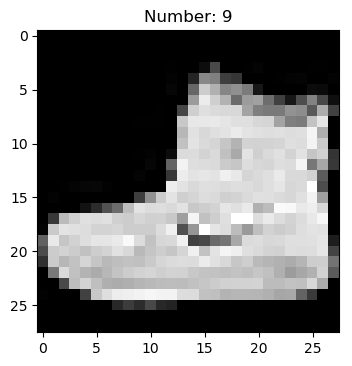

In [15]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

# reshape for feeding into the model
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print('\ntrain_images.shape: {}, of {}'.format(train_images.shape, train_images.dtype))
print('test_images.shape: {}, of {}'.format(test_images.shape, test_images.dtype))
plt.figure(dpi=100)
plt.imshow(np.squeeze(train_images[0]), cmap='gray')
plt.title('Number: {}'.format(train_labels[0]))
plt.show()

In [25]:
# hyper-parameters
logs_path = "C:/Users/yoyo/PycharmProjects/AIAssignment/logs/"  # path to the folder that we want to save the logs for Tensorboard
learning_rate = 0.001  # The optimization learning rate
epochs = 2  # Total number of training epochs
batch_size = 400  # Training batch size
display_freq = 100  # Frequency of displaying the training results

# Network Parameters
# We know that MNIST images are 28 pixels in each dimension.
img_h = img_w = 28

# Images are stored in one-dimensional arrays of this length.
img_size_flat = img_h * img_w

# Number of classes, one class for each of 10 digits.
n_classes = 10

# number of units in the first hidden layer
h1 = 200


In [6]:
# Create graph
# Placeholders for inputs (x), outputs(y)
with tf.variable_scope('Input'):
    x = tf.placeholder(tf.float32, shape=[None, img_size_flat], name='X')
    tf.summary.image('input_image', tf.reshape(x, (-1, img_w, img_h, 1)), max_outputs=5)
    y = tf.placeholder(tf.float32, shape=[None, n_classes], name='Y')
fc1 = fc_layer(x, h1, 'Hidden_layer', use_relu=True)
output_logits = fc_layer(fc1, n_classes, 'Output_layer', use_relu=False)

# Define the loss function, optimizer, and accuracy
with tf.variable_scope('Train'):
    with tf.variable_scope('Loss'):
        loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=output_logits), name='loss')
        tf.summary.scalar('loss', loss)
    with tf.variable_scope('Optimizer'):
        optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate, name='Adam-op').minimize(loss)
    with tf.variable_scope('Accuracy'):
        correct_prediction = tf.equal(tf.argmax(output_logits, 1), tf.argmax(y, 1), name='correct_pred')
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32), name='accuracy')
        tf.summary.scalar('accuracy', accuracy)
        # Network predictions
        cls_prediction = tf.argmax(output_logits, axis=1, name='predictions')


NameError: name 'fc_layer' is not defined

In [26]:
train_writer = tf.summary.FileWriter(logs_path, sess.graph)
num_tr_iter = int(train_images.shape[0] / batch_size)
global_step = 0

cnn = keras.models.Sequential()

cnn.add(keras.layers.InputLayer(input_shape=(28, 28, 1)))

# Normalization
cnn.add(keras.layers.BatchNormalization())

# Conv + Maxpooling
cnn.add(keras.layers.Convolution2D(64, (4, 4), padding='same', activation='relu'))
cnn.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Dropout
cnn.add(keras.layers.Dropout(0.1))

# Conv + Maxpooling
cnn.add(keras.layers.Convolution2D(64, (4, 4), activation='relu'))
cnn.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Dropout
cnn.add(keras.layers.Dropout(0.3))

# Converting 3D feature to 1D feature Vektor
cnn.add(keras.layers.Flatten())

# Fully Connected Layer
cnn.add(keras.layers.Dense(256, activation='relu'))

# Dropout
cnn.add(keras.layers.Dropout(0.5))

# Fully Connected Layer
cnn.add(keras.layers.Dense(64, activation='relu'))

# Normalization
cnn.add(keras.layers.BatchNormalization())

cnn.add(keras.layers.Dense(10, activation='softmax'))
cnn.compile(loss='sparse_categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

In [27]:
# Initializing the variables
init = tf.global_variables_initializer()
merged = tf.summary.merge_all()
saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(init)
    cnn.fit(train_images, train_labels, epochs=epochs)
    test_loss, test_acc = cnn.evaluate(test_images, test_labels)
    print('Test accuracy:', test_acc)
    save_path = saver.save(sess, os.path.join(logs_path, "model.ckpt"))
    print("Model saved in path: %s" % save_path)


Epoch 1/2


   32/60000 [..............................] - ETA: 44:02 - loss: 2.5335 - acc: 0.1875

   64/60000 [..............................] - ETA: 23:47 - loss: 2.4494 - acc: 0.1875

   96/60000 [..............................] - ETA: 17:04 - loss: 2.4206 - acc: 0.1875

  128/60000 [..............................] - ETA: 13:41 - loss: 2.3937 - acc: 0.1875

  160/60000 [..............................] - ETA: 11:41 - loss: 2.3638 - acc: 0.2125

  192/60000 [..............................] - ETA: 10:19 - loss: 2.3761 - acc: 0.2083

  224/60000 [..............................] - ETA: 9:21 - loss: 2.3567 - acc: 0.2009 

  256/60000 [..............................] - ETA: 8:38 - loss: 2.3863 - acc: 0.1992

  288/60000 [..............................] - ETA: 8:04 - loss: 2.3775 - acc: 0.1979

  320/60000 [..............................] - ETA: 7:37 - loss: 2.3501 - acc: 0.2062

  352/60000 [..............................] - ETA: 7:15 - loss: 2.3268 - acc: 0.2159

  384/60000 [..............................] - ETA: 6:57 - loss: 2.3009 - acc: 0.2370

  416/60000 [..............................] - ETA: 6:42 - loss: 2.2730 - acc: 0.2428

  448/60000 [..............................] - ETA: 6:28 - loss: 2.2487 - acc: 0.2500

  480/60000 [..............................] - ETA: 6:17 - loss: 2.2179 - acc: 0.2562

  512/60000 [..............................] - ETA: 6:07 - loss: 2.2038 - acc: 0.2598

  544/60000 [..............................] - ETA: 5:58 - loss: 2.2036 - acc: 0.2518

  576/60000 [..............................] - ETA: 5:50 - loss: 2.1838 - acc: 0.2587

  608/60000 [..............................] - ETA: 5:43 - loss: 2.1695 - acc: 0.2648

  640/60000 [..............................] - ETA: 5:37 - loss: 2.1559 - acc: 0.2703

  672/60000 [..............................] - ETA: 5:31 - loss: 2.1384 - acc: 0.2798

  704/60000 [..............................] - ETA: 5:26 - loss: 2.1252 - acc: 0.2812

  736/60000 [..............................] - ETA: 5:21 - loss: 2.1049 - acc: 0.2867

  768/60000 [..............................] - ETA: 5:17 - loss: 2.0937 - acc: 0.2891

  800/60000 [..............................] - ETA: 5:12 - loss: 2.0686 - acc: 0.2962

  832/60000 [..............................] - ETA: 5:09 - loss: 2.0512 - acc: 0.2981

  864/60000 [..............................] - ETA: 5:05 - loss: 2.0334 - acc: 0.3067

  896/60000 [..............................] - ETA: 5:02 - loss: 2.0225 - acc: 0.3080

  928/60000 [..............................] - ETA: 4:59 - loss: 2.0124 - acc: 0.3125

  960/60000 [..............................] - ETA: 4:55 - loss: 2.0126 - acc: 0.3135

  992/60000 [..............................] - ETA: 4:53 - loss: 1.9934 - acc: 0.3185

 1024/60000 [..............................] - ETA: 4:50 - loss: 1.9775 - acc: 0.3213

 1056/60000 [..............................] - ETA: 4:48 - loss: 1.9666 - acc: 0.3239

 1088/60000 [..............................] - ETA: 4:45 - loss: 1.9554 - acc: 0.3290

 1120/60000 [..............................] - ETA: 4:43 - loss: 1.9315 - acc: 0.3357

 1152/60000 [..............................] - ETA: 4:41 - loss: 1.9195 - acc: 0.3429

 1184/60000 [..............................] - ETA: 4:39 - loss: 1.9052 - acc: 0.3471

 1216/60000 [..............................] - ETA: 4:37 - loss: 1.8919 - acc: 0.3503

 1248/60000 [..............................] - ETA: 4:35 - loss: 1.8888 - acc: 0.3526

 1280/60000 [..............................] - ETA: 4:34 - loss: 1.8829 - acc: 0.3531

 1312/60000 [..............................] - ETA: 4:32 - loss: 1.8785 - acc: 0.3544

 1344/60000 [..............................] - ETA: 4:30 - loss: 1.8600 - acc: 0.3601

 1376/60000 [..............................] - ETA: 4:29 - loss: 1.8451 - acc: 0.3663

 1408/60000 [..............................] - ETA: 4:27 - loss: 1.8347 - acc: 0.3707

 1440/60000 [..............................] - ETA: 4:26 - loss: 1.8163 - acc: 0.3764

 1472/60000 [..............................] - ETA: 4:24 - loss: 1.8044 - acc: 0.3757

 1504/60000 [..............................] - ETA: 4:23 - loss: 1.7908 - acc: 0.3803

 1536/60000 [..............................] - ETA: 4:22 - loss: 1.7759 - acc: 0.3841

 1568/60000 [..............................] - ETA: 4:21 - loss: 1.7576 - acc: 0.3909

 1600/60000 [..............................] - ETA: 4:20 - loss: 1.7474 - acc: 0.3919

 1632/60000 [..............................] - ETA: 4:19 - loss: 1.7377 - acc: 0.3934

 1664/60000 [..............................] - ETA: 4:18 - loss: 1.7280 - acc: 0.3948

 1696/60000 [..............................] - ETA: 4:17 - loss: 1.7134 - acc: 0.3986

 1728/60000 [..............................] - ETA: 4:16 - loss: 1.7011 - acc: 0.4034

 1760/60000 [..............................] - ETA: 4:15 - loss: 1.6833 - acc: 0.4102

 1792/60000 [..............................] - ETA: 4:14 - loss: 1.6694 - acc: 0.4163

 1824/60000 [..............................] - ETA: 4:13 - loss: 1.6594 - acc: 0.4194

 1856/60000 [..............................] - ETA: 4:12 - loss: 1.6448 - acc: 0.4256

 1888/60000 [..............................] - ETA: 4:11 - loss: 1.6366 - acc: 0.4301

 1920/60000 [..............................] - ETA: 4:11 - loss: 1.6263 - acc: 0.4333

 1952/60000 [..............................] - ETA: 4:10 - loss: 1.6159 - acc: 0.4365

 1984/60000 [..............................] - ETA: 4:09 - loss: 1.6044 - acc: 0.4390

 2016/60000 [>.............................] - ETA: 4:08 - loss: 1.5951 - acc: 0.4439

 2048/60000 [>.............................] - ETA: 4:08 - loss: 1.5904 - acc: 0.4448

 2080/60000 [>.............................] - ETA: 4:07 - loss: 1.5846 - acc: 0.4462

 2112/60000 [>.............................] - ETA: 4:07 - loss: 1.5754 - acc: 0.4493

 2144/60000 [>.............................] - ETA: 4:06 - loss: 1.5654 - acc: 0.4529

 2176/60000 [>.............................] - ETA: 4:05 - loss: 1.5613 - acc: 0.4536

 2208/60000 [>.............................] - ETA: 4:05 - loss: 1.5508 - acc: 0.4579

 2240/60000 [>.............................] - ETA: 4:04 - loss: 1.5419 - acc: 0.4603

 2272/60000 [>.............................] - ETA: 4:03 - loss: 1.5333 - acc: 0.4635

 2304/60000 [>.............................] - ETA: 4:03 - loss: 1.5274 - acc: 0.4648

 2336/60000 [>.............................] - ETA: 4:02 - loss: 1.5223 - acc: 0.4662

 2368/60000 [>.............................] - ETA: 4:01 - loss: 1.5156 - acc: 0.4683

 2400/60000 [>.............................] - ETA: 4:01 - loss: 1.5066 - acc: 0.4712

 2432/60000 [>.............................] - ETA: 4:00 - loss: 1.5019 - acc: 0.4729

 2464/60000 [>.............................] - ETA: 4:00 - loss: 1.4922 - acc: 0.4773

 2496/60000 [>.............................] - ETA: 4:00 - loss: 1.4846 - acc: 0.4804

 2528/60000 [>.............................] - ETA: 3:59 - loss: 1.4788 - acc: 0.4822

 2560/60000 [>.............................] - ETA: 3:59 - loss: 1.4716 - acc: 0.4859

 2592/60000 [>.............................] - ETA: 3:58 - loss: 1.4644 - acc: 0.4892

 2624/60000 [>.............................] - ETA: 3:58 - loss: 1.4572 - acc: 0.4928

 2656/60000 [>.............................] - ETA: 3:57 - loss: 1.4537 - acc: 0.4936

 2688/60000 [>.............................] - ETA: 3:57 - loss: 1.4478 - acc: 0.4963

 2720/60000 [>.............................] - ETA: 3:56 - loss: 1.4408 - acc: 0.4985

 2752/60000 [>.............................] - ETA: 3:56 - loss: 1.4403 - acc: 0.4993

 2784/60000 [>.............................] - ETA: 3:55 - loss: 1.4313 - acc: 0.5029

 2816/60000 [>.............................] - ETA: 3:55 - loss: 1.4243 - acc: 0.5067

 2848/60000 [>.............................] - ETA: 3:54 - loss: 1.4180 - acc: 0.5084

 2880/60000 [>.............................] - ETA: 3:54 - loss: 1.4109 - acc: 0.5104

 2912/60000 [>.............................] - ETA: 3:54 - loss: 1.4061 - acc: 0.5120

 2944/60000 [>.............................] - ETA: 3:53 - loss: 1.4000 - acc: 0.5143

 2976/60000 [>.............................] - ETA: 3:53 - loss: 1.3956 - acc: 0.5155

 3008/60000 [>.............................] - ETA: 3:52 - loss: 1.3901 - acc: 0.5173

 3040/60000 [>.............................] - ETA: 3:52 - loss: 1.3838 - acc: 0.5197

 3072/60000 [>.............................] - ETA: 3:52 - loss: 1.3797 - acc: 0.5212

 3104/60000 [>.............................] - ETA: 3:51 - loss: 1.3706 - acc: 0.5251

 3136/60000 [>.............................] - ETA: 3:51 - loss: 1.3627 - acc: 0.5274

 3168/60000 [>.............................] - ETA: 3:51 - loss: 1.3571 - acc: 0.5290

 3200/60000 [>.............................] - ETA: 3:50 - loss: 1.3528 - acc: 0.5300

 3232/60000 [>.............................] - ETA: 3:50 - loss: 1.3465 - acc: 0.5316

 3264/60000 [>.............................] - ETA: 3:50 - loss: 1.3422 - acc: 0.5331

 3296/60000 [>.............................] - ETA: 3:49 - loss: 1.3353 - acc: 0.5352

 3328/60000 [>.............................] - ETA: 3:49 - loss: 1.3313 - acc: 0.5367

 3360/60000 [>.............................] - ETA: 3:49 - loss: 1.3278 - acc: 0.5378

 3392/60000 [>.............................] - ETA: 3:48 - loss: 1.3223 - acc: 0.5398

 3424/60000 [>.............................] - ETA: 3:48 - loss: 1.3204 - acc: 0.5409

 3456/60000 [>.............................] - ETA: 3:48 - loss: 1.3174 - acc: 0.5422

 3488/60000 [>.............................] - ETA: 3:47 - loss: 1.3142 - acc: 0.5442

 3520/60000 [>.............................] - ETA: 3:47 - loss: 1.3088 - acc: 0.5452

 3552/60000 [>.............................] - ETA: 3:47 - loss: 1.3038 - acc: 0.5459

 3584/60000 [>.............................] - ETA: 3:46 - loss: 1.3009 - acc: 0.5466

 3616/60000 [>.............................] - ETA: 3:46 - loss: 1.2977 - acc: 0.5467

 3648/60000 [>.............................] - ETA: 3:46 - loss: 1.2941 - acc: 0.5482

 3680/60000 [>.............................] - ETA: 3:46 - loss: 1.2890 - acc: 0.5500

 3712/60000 [>.............................] - ETA: 3:45 - loss: 1.2837 - acc: 0.5517

 3744/60000 [>.............................] - ETA: 3:45 - loss: 1.2794 - acc: 0.5540

 3776/60000 [>.............................] - ETA: 3:45 - loss: 1.2760 - acc: 0.5546

 3808/60000 [>.............................] - ETA: 3:44 - loss: 1.2718 - acc: 0.5562

 3840/60000 [>.............................] - ETA: 3:44 - loss: 1.2657 - acc: 0.5583

 3872/60000 [>.............................] - ETA: 3:44 - loss: 1.2616 - acc: 0.5597

 3904/60000 [>.............................] - ETA: 3:44 - loss: 1.2579 - acc: 0.5607

 3936/60000 [>.............................] - ETA: 3:43 - loss: 1.2534 - acc: 0.5628

 3968/60000 [>.............................] - ETA: 3:43 - loss: 1.2507 - acc: 0.5635

 4000/60000 [=>............................] - ETA: 3:43 - loss: 1.2469 - acc: 0.5645

 4032/60000 [=>............................] - ETA: 3:43 - loss: 1.2452 - acc: 0.5655

 4064/60000 [=>............................] - ETA: 3:42 - loss: 1.2434 - acc: 0.5657

 4096/60000 [=>............................] - ETA: 3:42 - loss: 1.2379 - acc: 0.5684

 4128/60000 [=>............................] - ETA: 3:42 - loss: 1.2373 - acc: 0.5681

 4160/60000 [=>............................] - ETA: 3:42 - loss: 1.2320 - acc: 0.5697

 4192/60000 [=>............................] - ETA: 3:41 - loss: 1.2291 - acc: 0.5708

 4224/60000 [=>............................] - ETA: 3:41 - loss: 1.2251 - acc: 0.5724

 4256/60000 [=>............................] - ETA: 3:41 - loss: 1.2222 - acc: 0.5735

 4288/60000 [=>............................] - ETA: 3:41 - loss: 1.2185 - acc: 0.5744

 4320/60000 [=>............................] - ETA: 3:41 - loss: 1.2147 - acc: 0.5757

 4352/60000 [=>............................] - ETA: 3:40 - loss: 1.2109 - acc: 0.5772

 4384/60000 [=>............................] - ETA: 3:40 - loss: 1.2088 - acc: 0.5780

 4416/60000 [=>............................] - ETA: 3:40 - loss: 1.2043 - acc: 0.5797

 4448/60000 [=>............................] - ETA: 3:40 - loss: 1.2026 - acc: 0.5805

 4480/60000 [=>............................] - ETA: 3:39 - loss: 1.1994 - acc: 0.5815

 4512/60000 [=>............................] - ETA: 3:39 - loss: 1.1960 - acc: 0.5822

 4544/60000 [=>............................] - ETA: 3:39 - loss: 1.1923 - acc: 0.5836

 4576/60000 [=>............................] - ETA: 3:39 - loss: 1.1892 - acc: 0.5841

 4608/60000 [=>............................] - ETA: 3:38 - loss: 1.1866 - acc: 0.5851

 4640/60000 [=>............................] - ETA: 3:38 - loss: 1.1823 - acc: 0.5869

 4672/60000 [=>............................] - ETA: 3:38 - loss: 1.1818 - acc: 0.5863

 4704/60000 [=>............................] - ETA: 3:38 - loss: 1.1763 - acc: 0.5886

 4736/60000 [=>............................] - ETA: 3:37 - loss: 1.1731 - acc: 0.5897

 4768/60000 [=>............................] - ETA: 3:37 - loss: 1.1695 - acc: 0.5908

 4800/60000 [=>............................] - ETA: 3:37 - loss: 1.1668 - acc: 0.5921

 4832/60000 [=>............................] - ETA: 3:37 - loss: 1.1653 - acc: 0.5921

 4864/60000 [=>............................] - ETA: 3:37 - loss: 1.1647 - acc: 0.5931

 4896/60000 [=>............................] - ETA: 3:36 - loss: 1.1616 - acc: 0.5935

 4928/60000 [=>............................] - ETA: 3:36 - loss: 1.1577 - acc: 0.5954

 4960/60000 [=>............................] - ETA: 3:36 - loss: 1.1559 - acc: 0.5958

 4992/60000 [=>............................] - ETA: 3:36 - loss: 1.1545 - acc: 0.5964

 5024/60000 [=>............................] - ETA: 3:35 - loss: 1.1519 - acc: 0.5971

 5056/60000 [=>............................] - ETA: 3:35 - loss: 1.1479 - acc: 0.5985

 5088/60000 [=>............................] - ETA: 3:35 - loss: 1.1489 - acc: 0.5983

 5120/60000 [=>............................] - ETA: 3:35 - loss: 1.1465 - acc: 0.5986

 5152/60000 [=>............................] - ETA: 3:35 - loss: 1.1436 - acc: 0.5996

 5184/60000 [=>............................] - ETA: 3:34 - loss: 1.1431 - acc: 0.5999

 5216/60000 [=>............................] - ETA: 3:34 - loss: 1.1412 - acc: 0.6008

 5248/60000 [=>............................] - ETA: 3:34 - loss: 1.1378 - acc: 0.6019

 5280/60000 [=>............................] - ETA: 3:34 - loss: 1.1355 - acc: 0.6028

 5312/60000 [=>............................] - ETA: 3:33 - loss: 1.1332 - acc: 0.6039

 5344/60000 [=>............................] - ETA: 3:33 - loss: 1.1326 - acc: 0.6044

 5376/60000 [=>............................] - ETA: 3:33 - loss: 1.1324 - acc: 0.6044

 5408/60000 [=>............................] - ETA: 3:33 - loss: 1.1292 - acc: 0.6058

 5440/60000 [=>............................] - ETA: 3:33 - loss: 1.1254 - acc: 0.6066

 5472/60000 [=>............................] - ETA: 3:32 - loss: 1.1249 - acc: 0.6067

 5504/60000 [=>............................] - ETA: 3:32 - loss: 1.1231 - acc: 0.6077

 5536/60000 [=>............................] - ETA: 3:32 - loss: 1.1204 - acc: 0.6086

 5568/60000 [=>............................] - ETA: 3:32 - loss: 1.1175 - acc: 0.6092

 5600/60000 [=>............................] - ETA: 3:32 - loss: 1.1184 - acc: 0.6082

 5632/60000 [=>............................] - ETA: 3:31 - loss: 1.1146 - acc: 0.6096

 5664/60000 [=>............................] - ETA: 3:31 - loss: 1.1130 - acc: 0.6102

 5696/60000 [=>............................] - ETA: 3:31 - loss: 1.1108 - acc: 0.6113

 5728/60000 [=>............................] - ETA: 3:31 - loss: 1.1094 - acc: 0.6119

 5760/60000 [=>............................] - ETA: 3:31 - loss: 1.1077 - acc: 0.6127

 5792/60000 [=>............................] - ETA: 3:30 - loss: 1.1055 - acc: 0.6138

 5824/60000 [=>............................] - ETA: 3:30 - loss: 1.1039 - acc: 0.6144

 5856/60000 [=>............................] - ETA: 3:30 - loss: 1.1028 - acc: 0.6153

 5888/60000 [=>............................] - ETA: 3:30 - loss: 1.1012 - acc: 0.6153

 5920/60000 [=>............................] - ETA: 3:30 - loss: 1.0991 - acc: 0.6157

 5952/60000 [=>............................] - ETA: 3:29 - loss: 1.0955 - acc: 0.6171

 5984/60000 [=>............................] - ETA: 3:29 - loss: 1.0943 - acc: 0.6176

 6016/60000 [==>...........................] - ETA: 3:29 - loss: 1.0907 - acc: 0.6190

 6048/60000 [==>...........................] - ETA: 3:29 - loss: 1.0884 - acc: 0.6204

 6080/60000 [==>...........................] - ETA: 3:29 - loss: 1.0856 - acc: 0.6215

 6112/60000 [==>...........................] - ETA: 3:28 - loss: 1.0841 - acc: 0.6222

 6144/60000 [==>...........................] - ETA: 3:28 - loss: 1.0818 - acc: 0.6229

 6176/60000 [==>...........................] - ETA: 3:28 - loss: 1.0797 - acc: 0.6231

 6208/60000 [==>...........................] - ETA: 3:28 - loss: 1.0771 - acc: 0.6240

 6240/60000 [==>...........................] - ETA: 3:28 - loss: 1.0752 - acc: 0.6245

 6272/60000 [==>...........................] - ETA: 3:28 - loss: 1.0732 - acc: 0.6253

 6304/60000 [==>...........................] - ETA: 3:27 - loss: 1.0700 - acc: 0.6264

 6336/60000 [==>...........................] - ETA: 3:27 - loss: 1.0684 - acc: 0.6269

 6368/60000 [==>...........................] - ETA: 3:27 - loss: 1.0659 - acc: 0.6277

 6400/60000 [==>...........................] - ETA: 3:27 - loss: 1.0637 - acc: 0.6286

 6432/60000 [==>...........................] - ETA: 3:27 - loss: 1.0605 - acc: 0.6298

 6464/60000 [==>...........................] - ETA: 3:26 - loss: 1.0601 - acc: 0.6296

 6496/60000 [==>...........................] - ETA: 3:26 - loss: 1.0596 - acc: 0.6298

 6528/60000 [==>...........................] - ETA: 3:26 - loss: 1.0584 - acc: 0.6304

 6560/60000 [==>...........................] - ETA: 3:26 - loss: 1.0561 - acc: 0.6308

 6592/60000 [==>...........................] - ETA: 3:26 - loss: 1.0534 - acc: 0.6315

 6624/60000 [==>...........................] - ETA: 3:26 - loss: 1.0521 - acc: 0.6318

 6656/60000 [==>...........................] - ETA: 3:25 - loss: 1.0502 - acc: 0.6322

 6688/60000 [==>...........................] - ETA: 3:25 - loss: 1.0484 - acc: 0.6328

 6720/60000 [==>...........................] - ETA: 3:25 - loss: 1.0467 - acc: 0.6335

 6752/60000 [==>...........................] - ETA: 3:25 - loss: 1.0449 - acc: 0.6340

 6784/60000 [==>...........................] - ETA: 3:25 - loss: 1.0432 - acc: 0.6341

 6816/60000 [==>...........................] - ETA: 3:25 - loss: 1.0408 - acc: 0.6347

 6848/60000 [==>...........................] - ETA: 3:24 - loss: 1.0383 - acc: 0.6355

 6880/60000 [==>...........................] - ETA: 3:24 - loss: 1.0357 - acc: 0.6363

 6912/60000 [==>...........................] - ETA: 3:24 - loss: 1.0338 - acc: 0.6372

 6944/60000 [==>...........................] - ETA: 3:24 - loss: 1.0323 - acc: 0.6372

 6976/60000 [==>...........................] - ETA: 3:24 - loss: 1.0328 - acc: 0.6370

 7008/60000 [==>...........................] - ETA: 3:24 - loss: 1.0317 - acc: 0.6373

 7040/60000 [==>...........................] - ETA: 3:23 - loss: 1.0306 - acc: 0.6375

 7072/60000 [==>...........................] - ETA: 3:23 - loss: 1.0284 - acc: 0.6380

 7104/60000 [==>...........................] - ETA: 3:23 - loss: 1.0259 - acc: 0.6388

 7136/60000 [==>...........................] - ETA: 3:23 - loss: 1.0259 - acc: 0.6387

 7168/60000 [==>...........................] - ETA: 3:23 - loss: 1.0240 - acc: 0.6394

 7200/60000 [==>...........................] - ETA: 3:23 - loss: 1.0227 - acc: 0.6400

 7232/60000 [==>...........................] - ETA: 3:22 - loss: 1.0202 - acc: 0.6408

 7264/60000 [==>...........................] - ETA: 3:22 - loss: 1.0181 - acc: 0.6415

 7296/60000 [==>...........................] - ETA: 3:22 - loss: 1.0173 - acc: 0.6419

 7328/60000 [==>...........................] - ETA: 3:22 - loss: 1.0169 - acc: 0.6419

 7360/60000 [==>...........................] - ETA: 3:22 - loss: 1.0158 - acc: 0.6424

 7392/60000 [==>...........................] - ETA: 3:22 - loss: 1.0143 - acc: 0.6431

 7424/60000 [==>...........................] - ETA: 3:21 - loss: 1.0123 - acc: 0.6436

 7456/60000 [==>...........................] - ETA: 3:21 - loss: 1.0123 - acc: 0.6432

 7488/60000 [==>...........................] - ETA: 3:21 - loss: 1.0102 - acc: 0.6440

 7520/60000 [==>...........................] - ETA: 3:21 - loss: 1.0085 - acc: 0.6445

 7552/60000 [==>...........................] - ETA: 3:21 - loss: 1.0070 - acc: 0.6451

 7584/60000 [==>...........................] - ETA: 3:21 - loss: 1.0053 - acc: 0.6458

 7616/60000 [==>...........................] - ETA: 3:21 - loss: 1.0037 - acc: 0.6465

 7648/60000 [==>...........................] - ETA: 3:20 - loss: 1.0025 - acc: 0.6470

 7680/60000 [==>...........................] - ETA: 3:20 - loss: 1.0003 - acc: 0.6478

 7712/60000 [==>...........................] - ETA: 3:20 - loss: 0.9990 - acc: 0.6483

 7744/60000 [==>...........................] - ETA: 3:20 - loss: 0.9973 - acc: 0.6489

 7776/60000 [==>...........................] - ETA: 3:20 - loss: 0.9956 - acc: 0.6496

 7808/60000 [==>...........................] - ETA: 3:19 - loss: 0.9940 - acc: 0.6501

 7840/60000 [==>...........................] - ETA: 3:19 - loss: 0.9919 - acc: 0.6509

 7872/60000 [==>...........................] - ETA: 3:19 - loss: 0.9898 - acc: 0.6518

 7904/60000 [==>...........................] - ETA: 3:19 - loss: 0.9887 - acc: 0.6518

 7936/60000 [==>...........................] - ETA: 3:19 - loss: 0.9877 - acc: 0.6520

 7968/60000 [==>...........................] - ETA: 3:19 - loss: 0.9868 - acc: 0.6525

 8000/60000 [===>..........................] - ETA: 3:19 - loss: 0.9850 - acc: 0.6532

 8032/60000 [===>..........................] - ETA: 3:18 - loss: 0.9842 - acc: 0.6534

 8064/60000 [===>..........................] - ETA: 3:18 - loss: 0.9822 - acc: 0.6543

 8096/60000 [===>..........................] - ETA: 3:18 - loss: 0.9811 - acc: 0.6545

 8128/60000 [===>..........................] - ETA: 3:18 - loss: 0.9800 - acc: 0.6549

 8160/60000 [===>..........................] - ETA: 3:18 - loss: 0.9785 - acc: 0.6553

 8192/60000 [===>..........................] - ETA: 3:18 - loss: 0.9778 - acc: 0.6555

 8224/60000 [===>..........................] - ETA: 3:17 - loss: 0.9765 - acc: 0.6560

 8256/60000 [===>..........................] - ETA: 3:17 - loss: 0.9763 - acc: 0.6560

 8288/60000 [===>..........................] - ETA: 3:17 - loss: 0.9762 - acc: 0.6559

 8320/60000 [===>..........................] - ETA: 3:17 - loss: 0.9756 - acc: 0.6562

 8352/60000 [===>..........................] - ETA: 3:17 - loss: 0.9738 - acc: 0.6570

 8384/60000 [===>..........................] - ETA: 3:17 - loss: 0.9728 - acc: 0.6574

 8416/60000 [===>..........................] - ETA: 3:16 - loss: 0.9719 - acc: 0.6577

 8448/60000 [===>..........................] - ETA: 3:16 - loss: 0.9704 - acc: 0.6583

 8480/60000 [===>..........................] - ETA: 3:16 - loss: 0.9681 - acc: 0.6592

 8512/60000 [===>..........................] - ETA: 3:16 - loss: 0.9661 - acc: 0.6601

 8544/60000 [===>..........................] - ETA: 3:16 - loss: 0.9649 - acc: 0.6605

 8576/60000 [===>..........................] - ETA: 3:16 - loss: 0.9644 - acc: 0.6606

 8608/60000 [===>..........................] - ETA: 3:16 - loss: 0.9627 - acc: 0.6615

 8640/60000 [===>..........................] - ETA: 3:15 - loss: 0.9637 - acc: 0.6612

 8672/60000 [===>..........................] - ETA: 3:15 - loss: 0.9624 - acc: 0.6616

 8704/60000 [===>..........................] - ETA: 3:15 - loss: 0.9608 - acc: 0.6621

 8736/60000 [===>..........................] - ETA: 3:15 - loss: 0.9603 - acc: 0.6627

 8768/60000 [===>..........................] - ETA: 3:15 - loss: 0.9586 - acc: 0.6635

 8800/60000 [===>..........................] - ETA: 3:15 - loss: 0.9570 - acc: 0.6641

 8832/60000 [===>..........................] - ETA: 3:15 - loss: 0.9571 - acc: 0.6641

 8864/60000 [===>..........................] - ETA: 3:14 - loss: 0.9567 - acc: 0.6641

 8896/60000 [===>..........................] - ETA: 3:14 - loss: 0.9552 - acc: 0.6647

 8928/60000 [===>..........................] - ETA: 3:14 - loss: 0.9555 - acc: 0.6642

 8960/60000 [===>..........................] - ETA: 3:14 - loss: 0.9544 - acc: 0.6646

 8992/60000 [===>..........................] - ETA: 3:14 - loss: 0.9526 - acc: 0.6653

 9024/60000 [===>..........................] - ETA: 3:14 - loss: 0.9521 - acc: 0.6654

 9056/60000 [===>..........................] - ETA: 3:13 - loss: 0.9503 - acc: 0.6659

 9088/60000 [===>..........................] - ETA: 3:13 - loss: 0.9486 - acc: 0.6666

 9120/60000 [===>..........................] - ETA: 3:13 - loss: 0.9467 - acc: 0.6673

 9152/60000 [===>..........................] - ETA: 3:13 - loss: 0.9462 - acc: 0.6679

 9184/60000 [===>..........................] - ETA: 3:13 - loss: 0.9449 - acc: 0.6684

 9216/60000 [===>..........................] - ETA: 3:13 - loss: 0.9439 - acc: 0.6687

 9248/60000 [===>..........................] - ETA: 3:13 - loss: 0.9424 - acc: 0.6692

 9280/60000 [===>..........................] - ETA: 3:12 - loss: 0.9408 - acc: 0.6696

 9312/60000 [===>..........................] - ETA: 3:12 - loss: 0.9405 - acc: 0.6700

 9344/60000 [===>..........................] - ETA: 3:12 - loss: 0.9396 - acc: 0.6701

 9376/60000 [===>..........................] - ETA: 3:12 - loss: 0.9385 - acc: 0.6700

 9408/60000 [===>..........................] - ETA: 3:12 - loss: 0.9375 - acc: 0.6705

 9440/60000 [===>..........................] - ETA: 3:12 - loss: 0.9367 - acc: 0.6704

 9472/60000 [===>..........................] - ETA: 3:12 - loss: 0.9357 - acc: 0.6707

 9504/60000 [===>..........................] - ETA: 3:11 - loss: 0.9350 - acc: 0.6710

 9536/60000 [===>..........................] - ETA: 3:11 - loss: 0.9340 - acc: 0.6716

 9568/60000 [===>..........................] - ETA: 3:11 - loss: 0.9333 - acc: 0.6717

 9600/60000 [===>..........................] - ETA: 3:11 - loss: 0.9323 - acc: 0.6722

 9632/60000 [===>..........................] - ETA: 3:11 - loss: 0.9310 - acc: 0.6727

 9664/60000 [===>..........................] - ETA: 3:11 - loss: 0.9296 - acc: 0.6733

 9696/60000 [===>..........................] - ETA: 3:11 - loss: 0.9289 - acc: 0.6734

 9728/60000 [===>..........................] - ETA: 3:10 - loss: 0.9272 - acc: 0.6739

 9760/60000 [===>..........................] - ETA: 3:10 - loss: 0.9257 - acc: 0.6744

 9792/60000 [===>..........................] - ETA: 3:10 - loss: 0.9251 - acc: 0.6747

 9824/60000 [===>..........................] - ETA: 3:10 - loss: 0.9236 - acc: 0.6754

 9856/60000 [===>..........................] - ETA: 3:10 - loss: 0.9224 - acc: 0.6757

 9888/60000 [===>..........................] - ETA: 3:10 - loss: 0.9214 - acc: 0.6761

 9920/60000 [===>..........................] - ETA: 3:10 - loss: 0.9202 - acc: 0.6765

 9952/60000 [===>..........................] - ETA: 3:09 - loss: 0.9193 - acc: 0.6768

 9984/60000 [===>..........................] - ETA: 3:09 - loss: 0.9179 - acc: 0.6773

10016/60000 [====>.........................] - ETA: 3:09 - loss: 0.9169 - acc: 0.6778

10048/60000 [====>.........................] - ETA: 3:09 - loss: 0.9150 - acc: 0.6785

10080/60000 [====>.........................] - ETA: 3:09 - loss: 0.9147 - acc: 0.6789

10112/60000 [====>.........................] - ETA: 3:09 - loss: 0.9132 - acc: 0.6794

10144/60000 [====>.........................] - ETA: 3:09 - loss: 0.9136 - acc: 0.6796

10176/60000 [====>.........................] - ETA: 3:08 - loss: 0.9124 - acc: 0.6802

10208/60000 [====>.........................] - ETA: 3:08 - loss: 0.9120 - acc: 0.6803

10240/60000 [====>.........................] - ETA: 3:08 - loss: 0.9113 - acc: 0.6805

10272/60000 [====>.........................] - ETA: 3:08 - loss: 0.9098 - acc: 0.6811

10304/60000 [====>.........................] - ETA: 3:08 - loss: 0.9094 - acc: 0.6811

10336/60000 [====>.........................] - ETA: 3:08 - loss: 0.9084 - acc: 0.6813

10368/60000 [====>.........................] - ETA: 3:08 - loss: 0.9077 - acc: 0.6814

10400/60000 [====>.........................] - ETA: 3:07 - loss: 0.9071 - acc: 0.6818

10432/60000 [====>.........................] - ETA: 3:07 - loss: 0.9059 - acc: 0.6821

10464/60000 [====>.........................] - ETA: 3:07 - loss: 0.9062 - acc: 0.6820

10496/60000 [====>.........................] - ETA: 3:07 - loss: 0.9044 - acc: 0.6825

10528/60000 [====>.........................] - ETA: 3:07 - loss: 0.9031 - acc: 0.6830

10560/60000 [====>.........................] - ETA: 3:07 - loss: 0.9027 - acc: 0.6835

10592/60000 [====>.........................] - ETA: 3:07 - loss: 0.9016 - acc: 0.6838

10624/60000 [====>.........................] - ETA: 3:06 - loss: 0.9000 - acc: 0.6843

10656/60000 [====>.........................] - ETA: 3:06 - loss: 0.8998 - acc: 0.6842

10688/60000 [====>.........................] - ETA: 3:06 - loss: 0.8988 - acc: 0.6847

10720/60000 [====>.........................] - ETA: 3:06 - loss: 0.8976 - acc: 0.6853

10752/60000 [====>.........................] - ETA: 3:06 - loss: 0.8964 - acc: 0.6856

10784/60000 [====>.........................] - ETA: 3:06 - loss: 0.8948 - acc: 0.6862

10816/60000 [====>.........................] - ETA: 3:06 - loss: 0.8936 - acc: 0.6865

10848/60000 [====>.........................] - ETA: 3:05 - loss: 0.8918 - acc: 0.6872

10880/60000 [====>.........................] - ETA: 3:05 - loss: 0.8908 - acc: 0.6876

10912/60000 [====>.........................] - ETA: 3:05 - loss: 0.8899 - acc: 0.6877

10944/60000 [====>.........................] - ETA: 3:05 - loss: 0.8893 - acc: 0.6880

10976/60000 [====>.........................] - ETA: 3:05 - loss: 0.8887 - acc: 0.6882

11008/60000 [====>.........................] - ETA: 3:05 - loss: 0.8879 - acc: 0.6882

11040/60000 [====>.........................] - ETA: 3:05 - loss: 0.8867 - acc: 0.6885

11072/60000 [====>.........................] - ETA: 3:05 - loss: 0.8865 - acc: 0.6884

11104/60000 [====>.........................] - ETA: 3:04 - loss: 0.8860 - acc: 0.6887

11136/60000 [====>.........................] - ETA: 3:04 - loss: 0.8865 - acc: 0.6886

11168/60000 [====>.........................] - ETA: 3:04 - loss: 0.8854 - acc: 0.6888

11200/60000 [====>.........................] - ETA: 3:04 - loss: 0.8846 - acc: 0.6889

11232/60000 [====>.........................] - ETA: 3:04 - loss: 0.8843 - acc: 0.6890

11264/60000 [====>.........................] - ETA: 3:04 - loss: 0.8831 - acc: 0.6894

11296/60000 [====>.........................] - ETA: 3:04 - loss: 0.8824 - acc: 0.6898

11328/60000 [====>.........................] - ETA: 3:03 - loss: 0.8822 - acc: 0.6899

11360/60000 [====>.........................] - ETA: 3:03 - loss: 0.8815 - acc: 0.6900

11392/60000 [====>.........................] - ETA: 3:03 - loss: 0.8804 - acc: 0.6904

11424/60000 [====>.........................] - ETA: 3:03 - loss: 0.8798 - acc: 0.6908

11456/60000 [====>.........................] - ETA: 3:03 - loss: 0.8785 - acc: 0.6912

11488/60000 [====>.........................] - ETA: 3:03 - loss: 0.8775 - acc: 0.6917

11520/60000 [====>.........................] - ETA: 3:03 - loss: 0.8768 - acc: 0.6919

11552/60000 [====>.........................] - ETA: 3:03 - loss: 0.8760 - acc: 0.6920

11584/60000 [====>.........................] - ETA: 3:02 - loss: 0.8749 - acc: 0.6922

11616/60000 [====>.........................] - ETA: 3:02 - loss: 0.8742 - acc: 0.6925

11648/60000 [====>.........................] - ETA: 3:02 - loss: 0.8733 - acc: 0.6928

11680/60000 [====>.........................] - ETA: 3:02 - loss: 0.8730 - acc: 0.6930

11712/60000 [====>.........................] - ETA: 3:02 - loss: 0.8717 - acc: 0.6934

11744/60000 [====>.........................] - ETA: 3:02 - loss: 0.8717 - acc: 0.6935

11776/60000 [====>.........................] - ETA: 3:02 - loss: 0.8708 - acc: 0.6939

11808/60000 [====>.........................] - ETA: 3:01 - loss: 0.8697 - acc: 0.6941

11840/60000 [====>.........................] - ETA: 3:01 - loss: 0.8689 - acc: 0.6946

11872/60000 [====>.........................] - ETA: 3:01 - loss: 0.8679 - acc: 0.6948

11904/60000 [====>.........................] - ETA: 3:01 - loss: 0.8671 - acc: 0.6951

11936/60000 [====>.........................] - ETA: 3:01 - loss: 0.8666 - acc: 0.6955

11968/60000 [====>.........................] - ETA: 3:01 - loss: 0.8661 - acc: 0.6956

12000/60000 [=====>........................] - ETA: 3:01 - loss: 0.8654 - acc: 0.6957

12032/60000 [=====>........................] - ETA: 3:01 - loss: 0.8645 - acc: 0.6959

12064/60000 [=====>........................] - ETA: 3:00 - loss: 0.8639 - acc: 0.6961

12096/60000 [=====>........................] - ETA: 3:00 - loss: 0.8633 - acc: 0.6961

12128/60000 [=====>........................] - ETA: 3:00 - loss: 0.8624 - acc: 0.6963

12160/60000 [=====>........................] - ETA: 3:00 - loss: 0.8616 - acc: 0.6965

12192/60000 [=====>........................] - ETA: 3:00 - loss: 0.8607 - acc: 0.6968

12224/60000 [=====>........................] - ETA: 3:00 - loss: 0.8603 - acc: 0.6969

12256/60000 [=====>........................] - ETA: 3:00 - loss: 0.8594 - acc: 0.6973

12288/60000 [=====>........................] - ETA: 2:59 - loss: 0.8591 - acc: 0.6973

12320/60000 [=====>........................] - ETA: 2:59 - loss: 0.8591 - acc: 0.6973

12352/60000 [=====>........................] - ETA: 2:59 - loss: 0.8579 - acc: 0.6977

12384/60000 [=====>........................] - ETA: 2:59 - loss: 0.8569 - acc: 0.6982

12416/60000 [=====>........................] - ETA: 2:59 - loss: 0.8564 - acc: 0.6984

12448/60000 [=====>........................] - ETA: 2:59 - loss: 0.8552 - acc: 0.6987

12480/60000 [=====>........................] - ETA: 2:59 - loss: 0.8547 - acc: 0.6988

12512/60000 [=====>........................] - ETA: 2:59 - loss: 0.8540 - acc: 0.6990

12544/60000 [=====>........................] - ETA: 2:58 - loss: 0.8537 - acc: 0.6990

12576/60000 [=====>........................] - ETA: 2:58 - loss: 0.8525 - acc: 0.6993

12608/60000 [=====>........................] - ETA: 2:58 - loss: 0.8517 - acc: 0.6995

12640/60000 [=====>........................] - ETA: 2:58 - loss: 0.8510 - acc: 0.6995

12672/60000 [=====>........................] - ETA: 2:58 - loss: 0.8500 - acc: 0.7000

12704/60000 [=====>........................] - ETA: 2:58 - loss: 0.8494 - acc: 0.7002

12736/60000 [=====>........................] - ETA: 2:58 - loss: 0.8489 - acc: 0.7004

12768/60000 [=====>........................] - ETA: 2:58 - loss: 0.8479 - acc: 0.7007

12800/60000 [=====>........................] - ETA: 2:57 - loss: 0.8478 - acc: 0.7006

12832/60000 [=====>........................] - ETA: 2:57 - loss: 0.8472 - acc: 0.7008

12864/60000 [=====>........................] - ETA: 2:57 - loss: 0.8466 - acc: 0.7012

12896/60000 [=====>........................] - ETA: 2:57 - loss: 0.8456 - acc: 0.7015

12928/60000 [=====>........................] - ETA: 2:57 - loss: 0.8460 - acc: 0.7014

12960/60000 [=====>........................] - ETA: 2:57 - loss: 0.8454 - acc: 0.7015

12992/60000 [=====>........................] - ETA: 2:57 - loss: 0.8442 - acc: 0.7021

13024/60000 [=====>........................] - ETA: 2:56 - loss: 0.8443 - acc: 0.7021

13056/60000 [=====>........................] - ETA: 2:56 - loss: 0.8433 - acc: 0.7022

13088/60000 [=====>........................] - ETA: 2:56 - loss: 0.8428 - acc: 0.7022

13120/60000 [=====>........................] - ETA: 2:56 - loss: 0.8415 - acc: 0.7027

13152/60000 [=====>........................] - ETA: 2:56 - loss: 0.8415 - acc: 0.7027

13184/60000 [=====>........................] - ETA: 2:56 - loss: 0.8407 - acc: 0.7029

13216/60000 [=====>........................] - ETA: 2:56 - loss: 0.8405 - acc: 0.7030

13248/60000 [=====>........................] - ETA: 2:56 - loss: 0.8400 - acc: 0.7031

13280/60000 [=====>........................] - ETA: 2:55 - loss: 0.8390 - acc: 0.7034

13312/60000 [=====>........................] - ETA: 2:55 - loss: 0.8384 - acc: 0.7036

13344/60000 [=====>........................] - ETA: 2:55 - loss: 0.8385 - acc: 0.7035

13376/60000 [=====>........................] - ETA: 2:55 - loss: 0.8380 - acc: 0.7036

13408/60000 [=====>........................] - ETA: 2:55 - loss: 0.8373 - acc: 0.7038

13440/60000 [=====>........................] - ETA: 2:55 - loss: 0.8366 - acc: 0.7041

13472/60000 [=====>........................] - ETA: 2:55 - loss: 0.8361 - acc: 0.7040

13504/60000 [=====>........................] - ETA: 2:54 - loss: 0.8356 - acc: 0.7043

13536/60000 [=====>........................] - ETA: 2:54 - loss: 0.8347 - acc: 0.7046

13568/60000 [=====>........................] - ETA: 2:54 - loss: 0.8340 - acc: 0.7050

13600/60000 [=====>........................] - ETA: 2:54 - loss: 0.8336 - acc: 0.7052

13632/60000 [=====>........................] - ETA: 2:54 - loss: 0.8327 - acc: 0.7055

13664/60000 [=====>........................] - ETA: 2:54 - loss: 0.8323 - acc: 0.7056

13696/60000 [=====>........................] - ETA: 2:54 - loss: 0.8323 - acc: 0.7056

13728/60000 [=====>........................] - ETA: 2:54 - loss: 0.8315 - acc: 0.7059

13760/60000 [=====>........................] - ETA: 2:53 - loss: 0.8305 - acc: 0.7064

13792/60000 [=====>........................] - ETA: 2:53 - loss: 0.8295 - acc: 0.7067

13824/60000 [=====>........................] - ETA: 2:53 - loss: 0.8284 - acc: 0.7072

13856/60000 [=====>........................] - ETA: 2:53 - loss: 0.8275 - acc: 0.7076

13888/60000 [=====>........................] - ETA: 2:53 - loss: 0.8273 - acc: 0.7076

13920/60000 [=====>........................] - ETA: 2:53 - loss: 0.8263 - acc: 0.7078

13952/60000 [=====>........................] - ETA: 2:53 - loss: 0.8259 - acc: 0.7081

13984/60000 [=====>........................] - ETA: 2:53 - loss: 0.8250 - acc: 0.7085

14016/60000 [======>.......................] - ETA: 2:52 - loss: 0.8247 - acc: 0.7084

14048/60000 [======>.......................] - ETA: 2:52 - loss: 0.8245 - acc: 0.7085

14080/60000 [======>.......................] - ETA: 2:52 - loss: 0.8241 - acc: 0.7087

14112/60000 [======>.......................] - ETA: 2:52 - loss: 0.8232 - acc: 0.7090

14144/60000 [======>.......................] - ETA: 2:52 - loss: 0.8229 - acc: 0.7091

14176/60000 [======>.......................] - ETA: 2:52 - loss: 0.8222 - acc: 0.7093

14208/60000 [======>.......................] - ETA: 2:52 - loss: 0.8211 - acc: 0.7096

14240/60000 [======>.......................] - ETA: 2:51 - loss: 0.8208 - acc: 0.7098

14272/60000 [======>.......................] - ETA: 2:51 - loss: 0.8205 - acc: 0.7098

14304/60000 [======>.......................] - ETA: 2:51 - loss: 0.8208 - acc: 0.7098

14336/60000 [======>.......................] - ETA: 2:51 - loss: 0.8200 - acc: 0.7102

14368/60000 [======>.......................] - ETA: 2:51 - loss: 0.8195 - acc: 0.7103

14400/60000 [======>.......................] - ETA: 2:51 - loss: 0.8187 - acc: 0.7106

14432/60000 [======>.......................] - ETA: 2:51 - loss: 0.8178 - acc: 0.7110

14464/60000 [======>.......................] - ETA: 2:51 - loss: 0.8174 - acc: 0.7111

14496/60000 [======>.......................] - ETA: 2:50 - loss: 0.8164 - acc: 0.7114

14528/60000 [======>.......................] - ETA: 2:50 - loss: 0.8159 - acc: 0.7116

14560/60000 [======>.......................] - ETA: 2:50 - loss: 0.8151 - acc: 0.7120

14592/60000 [======>.......................] - ETA: 2:50 - loss: 0.8153 - acc: 0.7118

14624/60000 [======>.......................] - ETA: 2:50 - loss: 0.8149 - acc: 0.7120

14656/60000 [======>.......................] - ETA: 2:50 - loss: 0.8144 - acc: 0.7120

14688/60000 [======>.......................] - ETA: 2:50 - loss: 0.8137 - acc: 0.7123

14720/60000 [======>.......................] - ETA: 2:50 - loss: 0.8128 - acc: 0.7126

14752/60000 [======>.......................] - ETA: 2:49 - loss: 0.8123 - acc: 0.7127

14784/60000 [======>.......................] - ETA: 2:49 - loss: 0.8121 - acc: 0.7129

14816/60000 [======>.......................] - ETA: 2:49 - loss: 0.8111 - acc: 0.7133

14848/60000 [======>.......................] - ETA: 2:49 - loss: 0.8115 - acc: 0.7134

14880/60000 [======>.......................] - ETA: 2:49 - loss: 0.8107 - acc: 0.7136

14912/60000 [======>.......................] - ETA: 2:49 - loss: 0.8099 - acc: 0.7139

14944/60000 [======>.......................] - ETA: 2:49 - loss: 0.8090 - acc: 0.7140

14976/60000 [======>.......................] - ETA: 2:49 - loss: 0.8083 - acc: 0.7143

15008/60000 [======>.......................] - ETA: 2:48 - loss: 0.8078 - acc: 0.7144

15040/60000 [======>.......................] - ETA: 2:48 - loss: 0.8073 - acc: 0.7147

15072/60000 [======>.......................] - ETA: 2:48 - loss: 0.8072 - acc: 0.7148

15104/60000 [======>.......................] - ETA: 2:48 - loss: 0.8069 - acc: 0.7149

15136/60000 [======>.......................] - ETA: 2:48 - loss: 0.8068 - acc: 0.7152

15168/60000 [======>.......................] - ETA: 2:48 - loss: 0.8059 - acc: 0.7154

15200/60000 [======>.......................] - ETA: 2:48 - loss: 0.8059 - acc: 0.7153

15232/60000 [======>.......................] - ETA: 2:48 - loss: 0.8053 - acc: 0.7156

15264/60000 [======>.......................] - ETA: 2:47 - loss: 0.8045 - acc: 0.7160

15296/60000 [======>.......................] - ETA: 2:47 - loss: 0.8042 - acc: 0.7160

15328/60000 [======>.......................] - ETA: 2:47 - loss: 0.8045 - acc: 0.7159

15360/60000 [======>.......................] - ETA: 2:47 - loss: 0.8040 - acc: 0.7160

15392/60000 [======>.......................] - ETA: 2:47 - loss: 0.8036 - acc: 0.7162

15424/60000 [======>.......................] - ETA: 2:47 - loss: 0.8031 - acc: 0.7163

15456/60000 [======>.......................] - ETA: 2:47 - loss: 0.8022 - acc: 0.7167

15488/60000 [======>.......................] - ETA: 2:47 - loss: 0.8016 - acc: 0.7169

15520/60000 [======>.......................] - ETA: 2:46 - loss: 0.8012 - acc: 0.7169

15552/60000 [======>.......................] - ETA: 2:46 - loss: 0.8005 - acc: 0.7172

15584/60000 [======>.......................] - ETA: 2:46 - loss: 0.8004 - acc: 0.7171

15616/60000 [======>.......................] - ETA: 2:46 - loss: 0.7997 - acc: 0.7174

15648/60000 [======>.......................] - ETA: 2:46 - loss: 0.7988 - acc: 0.7177

15680/60000 [======>.......................] - ETA: 2:46 - loss: 0.7982 - acc: 0.7180

15712/60000 [======>.......................] - ETA: 2:46 - loss: 0.7982 - acc: 0.7181

15744/60000 [======>.......................] - ETA: 2:46 - loss: 0.7981 - acc: 0.7181

15776/60000 [======>.......................] - ETA: 2:45 - loss: 0.7978 - acc: 0.7182

15808/60000 [======>.......................] - ETA: 2:45 - loss: 0.7971 - acc: 0.7184

15840/60000 [======>.......................] - ETA: 2:45 - loss: 0.7962 - acc: 0.7188

15872/60000 [======>.......................] - ETA: 2:45 - loss: 0.7957 - acc: 0.7190

15904/60000 [======>.......................] - ETA: 2:45 - loss: 0.7949 - acc: 0.7193

15936/60000 [======>.......................] - ETA: 2:45 - loss: 0.7942 - acc: 0.7194

15968/60000 [======>.......................] - ETA: 2:45 - loss: 0.7933 - acc: 0.7198

16000/60000 [=======>......................] - ETA: 2:45 - loss: 0.7926 - acc: 0.7201

16032/60000 [=======>......................] - ETA: 2:44 - loss: 0.7920 - acc: 0.7204

16064/60000 [=======>......................] - ETA: 2:44 - loss: 0.7913 - acc: 0.7207

16096/60000 [=======>......................] - ETA: 2:44 - loss: 0.7909 - acc: 0.7209

16128/60000 [=======>......................] - ETA: 2:44 - loss: 0.7907 - acc: 0.7210

16160/60000 [=======>......................] - ETA: 2:44 - loss: 0.7902 - acc: 0.7211

16192/60000 [=======>......................] - ETA: 2:44 - loss: 0.7898 - acc: 0.7212

16224/60000 [=======>......................] - ETA: 2:44 - loss: 0.7893 - acc: 0.7213

16256/60000 [=======>......................] - ETA: 2:44 - loss: 0.7883 - acc: 0.7216

16288/60000 [=======>......................] - ETA: 2:43 - loss: 0.7887 - acc: 0.7215

16320/60000 [=======>......................] - ETA: 2:43 - loss: 0.7877 - acc: 0.7218

16352/60000 [=======>......................] - ETA: 2:43 - loss: 0.7872 - acc: 0.7221

16384/60000 [=======>......................] - ETA: 2:43 - loss: 0.7866 - acc: 0.7222

16416/60000 [=======>......................] - ETA: 2:43 - loss: 0.7866 - acc: 0.7221

16448/60000 [=======>......................] - ETA: 2:43 - loss: 0.7860 - acc: 0.7223

16480/60000 [=======>......................] - ETA: 2:43 - loss: 0.7850 - acc: 0.7228

16512/60000 [=======>......................] - ETA: 2:43 - loss: 0.7849 - acc: 0.7228

16544/60000 [=======>......................] - ETA: 2:42 - loss: 0.7841 - acc: 0.7231

16576/60000 [=======>......................] - ETA: 2:42 - loss: 0.7835 - acc: 0.7234

16608/60000 [=======>......................] - ETA: 2:42 - loss: 0.7830 - acc: 0.7235

16640/60000 [=======>......................] - ETA: 2:42 - loss: 0.7824 - acc: 0.7236

16672/60000 [=======>......................] - ETA: 2:42 - loss: 0.7819 - acc: 0.7238

16704/60000 [=======>......................] - ETA: 2:42 - loss: 0.7813 - acc: 0.7240

16736/60000 [=======>......................] - ETA: 2:42 - loss: 0.7809 - acc: 0.7239

16768/60000 [=======>......................] - ETA: 2:42 - loss: 0.7803 - acc: 0.7240

16800/60000 [=======>......................] - ETA: 2:41 - loss: 0.7796 - acc: 0.7242

16832/60000 [=======>......................] - ETA: 2:41 - loss: 0.7791 - acc: 0.7243

16864/60000 [=======>......................] - ETA: 2:41 - loss: 0.7786 - acc: 0.7246

16896/60000 [=======>......................] - ETA: 2:41 - loss: 0.7788 - acc: 0.7244

16928/60000 [=======>......................] - ETA: 2:41 - loss: 0.7782 - acc: 0.7247

16960/60000 [=======>......................] - ETA: 2:41 - loss: 0.7775 - acc: 0.7249

16992/60000 [=======>......................] - ETA: 2:41 - loss: 0.7773 - acc: 0.7249

17024/60000 [=======>......................] - ETA: 2:41 - loss: 0.7769 - acc: 0.7250

17056/60000 [=======>......................] - ETA: 2:40 - loss: 0.7768 - acc: 0.7250

17088/60000 [=======>......................] - ETA: 2:40 - loss: 0.7762 - acc: 0.7252

17120/60000 [=======>......................] - ETA: 2:40 - loss: 0.7755 - acc: 0.7254

17152/60000 [=======>......................] - ETA: 2:40 - loss: 0.7750 - acc: 0.7256

17184/60000 [=======>......................] - ETA: 2:40 - loss: 0.7745 - acc: 0.7258

17216/60000 [=======>......................] - ETA: 2:40 - loss: 0.7743 - acc: 0.7258

17248/60000 [=======>......................] - ETA: 2:40 - loss: 0.7734 - acc: 0.7261

17280/60000 [=======>......................] - ETA: 2:39 - loss: 0.7728 - acc: 0.7261

17312/60000 [=======>......................] - ETA: 2:39 - loss: 0.7722 - acc: 0.7262

17344/60000 [=======>......................] - ETA: 2:39 - loss: 0.7723 - acc: 0.7261

17376/60000 [=======>......................] - ETA: 2:39 - loss: 0.7719 - acc: 0.7262

17408/60000 [=======>......................] - ETA: 2:39 - loss: 0.7710 - acc: 0.7266

17440/60000 [=======>......................] - ETA: 2:39 - loss: 0.7703 - acc: 0.7270

17472/60000 [=======>......................] - ETA: 2:39 - loss: 0.7697 - acc: 0.7273

17504/60000 [=======>......................] - ETA: 2:39 - loss: 0.7693 - acc: 0.7274

17536/60000 [=======>......................] - ETA: 2:38 - loss: 0.7691 - acc: 0.7274

17568/60000 [=======>......................] - ETA: 2:38 - loss: 0.7684 - acc: 0.7276

17600/60000 [=======>......................] - ETA: 2:38 - loss: 0.7682 - acc: 0.7277

17632/60000 [=======>......................] - ETA: 2:38 - loss: 0.7674 - acc: 0.7281

17664/60000 [=======>......................] - ETA: 2:38 - loss: 0.7672 - acc: 0.7280

17696/60000 [=======>......................] - ETA: 2:38 - loss: 0.7666 - acc: 0.7282

17728/60000 [=======>......................] - ETA: 2:38 - loss: 0.7664 - acc: 0.7283

17760/60000 [=======>......................] - ETA: 2:38 - loss: 0.7661 - acc: 0.7285

17792/60000 [=======>......................] - ETA: 2:37 - loss: 0.7655 - acc: 0.7286

17824/60000 [=======>......................] - ETA: 2:37 - loss: 0.7657 - acc: 0.7286

17856/60000 [=======>......................] - ETA: 2:37 - loss: 0.7649 - acc: 0.7289

17888/60000 [=======>......................] - ETA: 2:37 - loss: 0.7644 - acc: 0.7290

17920/60000 [=======>......................] - ETA: 2:37 - loss: 0.7639 - acc: 0.7292

17952/60000 [=======>......................] - ETA: 2:37 - loss: 0.7637 - acc: 0.7293

17984/60000 [=======>......................] - ETA: 2:37 - loss: 0.7629 - acc: 0.7296

18016/60000 [========>.....................] - ETA: 2:37 - loss: 0.7624 - acc: 0.7297

18048/60000 [========>.....................] - ETA: 2:36 - loss: 0.7623 - acc: 0.7298

18080/60000 [========>.....................] - ETA: 2:36 - loss: 0.7621 - acc: 0.7297

18112/60000 [========>.....................] - ETA: 2:36 - loss: 0.7617 - acc: 0.7298

18144/60000 [========>.....................] - ETA: 2:36 - loss: 0.7615 - acc: 0.7299

18176/60000 [========>.....................] - ETA: 2:36 - loss: 0.7611 - acc: 0.7300

18208/60000 [========>.....................] - ETA: 2:36 - loss: 0.7609 - acc: 0.7300

18240/60000 [========>.....................] - ETA: 2:36 - loss: 0.7603 - acc: 0.7302

18272/60000 [========>.....................] - ETA: 2:36 - loss: 0.7598 - acc: 0.7304

18304/60000 [========>.....................] - ETA: 2:35 - loss: 0.7595 - acc: 0.7306

18336/60000 [========>.....................] - ETA: 2:35 - loss: 0.7590 - acc: 0.7307

18368/60000 [========>.....................] - ETA: 2:35 - loss: 0.7584 - acc: 0.7311

18400/60000 [========>.....................] - ETA: 2:35 - loss: 0.7580 - acc: 0.7312

18432/60000 [========>.....................] - ETA: 2:35 - loss: 0.7578 - acc: 0.7312

18464/60000 [========>.....................] - ETA: 2:35 - loss: 0.7572 - acc: 0.7313

18496/60000 [========>.....................] - ETA: 2:35 - loss: 0.7566 - acc: 0.7315

18528/60000 [========>.....................] - ETA: 2:35 - loss: 0.7562 - acc: 0.7317

18560/60000 [========>.....................] - ETA: 2:34 - loss: 0.7557 - acc: 0.7318

18592/60000 [========>.....................] - ETA: 2:34 - loss: 0.7551 - acc: 0.7321

18624/60000 [========>.....................] - ETA: 2:34 - loss: 0.7547 - acc: 0.7322

18656/60000 [========>.....................] - ETA: 2:34 - loss: 0.7543 - acc: 0.7323

18688/60000 [========>.....................] - ETA: 2:34 - loss: 0.7540 - acc: 0.7323

18720/60000 [========>.....................] - ETA: 2:34 - loss: 0.7538 - acc: 0.7324

18752/60000 [========>.....................] - ETA: 2:34 - loss: 0.7532 - acc: 0.7327

18784/60000 [========>.....................] - ETA: 2:34 - loss: 0.7529 - acc: 0.7328

18816/60000 [========>.....................] - ETA: 2:33 - loss: 0.7529 - acc: 0.7328

18848/60000 [========>.....................] - ETA: 2:33 - loss: 0.7522 - acc: 0.7331

18880/60000 [========>.....................] - ETA: 2:33 - loss: 0.7516 - acc: 0.7333

18912/60000 [========>.....................] - ETA: 2:33 - loss: 0.7516 - acc: 0.7332

18944/60000 [========>.....................] - ETA: 2:33 - loss: 0.7510 - acc: 0.7334

18976/60000 [========>.....................] - ETA: 2:33 - loss: 0.7518 - acc: 0.7333

19008/60000 [========>.....................] - ETA: 2:33 - loss: 0.7514 - acc: 0.7335

19040/60000 [========>.....................] - ETA: 2:33 - loss: 0.7512 - acc: 0.7335

19072/60000 [========>.....................] - ETA: 2:32 - loss: 0.7505 - acc: 0.7339

19104/60000 [========>.....................] - ETA: 2:32 - loss: 0.7502 - acc: 0.7339

19136/60000 [========>.....................] - ETA: 2:32 - loss: 0.7498 - acc: 0.7340

19168/60000 [========>.....................] - ETA: 2:32 - loss: 0.7496 - acc: 0.7340

19200/60000 [========>.....................] - ETA: 2:32 - loss: 0.7489 - acc: 0.7343

19232/60000 [========>.....................] - ETA: 2:32 - loss: 0.7487 - acc: 0.7342

19264/60000 [========>.....................] - ETA: 2:32 - loss: 0.7481 - acc: 0.7344

19296/60000 [========>.....................] - ETA: 2:32 - loss: 0.7481 - acc: 0.7346

19328/60000 [========>.....................] - ETA: 2:31 - loss: 0.7482 - acc: 0.7345

19360/60000 [========>.....................] - ETA: 2:31 - loss: 0.7476 - acc: 0.7347

19392/60000 [========>.....................] - ETA: 2:31 - loss: 0.7469 - acc: 0.7350

19424/60000 [========>.....................] - ETA: 2:31 - loss: 0.7461 - acc: 0.7353

19456/60000 [========>.....................] - ETA: 2:31 - loss: 0.7453 - acc: 0.7357

19488/60000 [========>.....................] - ETA: 2:31 - loss: 0.7449 - acc: 0.7356

19520/60000 [========>.....................] - ETA: 2:31 - loss: 0.7446 - acc: 0.7356

19552/60000 [========>.....................] - ETA: 2:31 - loss: 0.7441 - acc: 0.7357

19584/60000 [========>.....................] - ETA: 2:30 - loss: 0.7437 - acc: 0.7358

19616/60000 [========>.....................] - ETA: 2:30 - loss: 0.7432 - acc: 0.7360

19648/60000 [========>.....................] - ETA: 2:30 - loss: 0.7429 - acc: 0.7361

19680/60000 [========>.....................] - ETA: 2:30 - loss: 0.7421 - acc: 0.7364

19712/60000 [========>.....................] - ETA: 2:30 - loss: 0.7419 - acc: 0.7365

19744/60000 [========>.....................] - ETA: 2:30 - loss: 0.7413 - acc: 0.7367

19776/60000 [========>.....................] - ETA: 2:30 - loss: 0.7410 - acc: 0.7369

19808/60000 [========>.....................] - ETA: 2:30 - loss: 0.7406 - acc: 0.7369

19840/60000 [========>.....................] - ETA: 2:29 - loss: 0.7405 - acc: 0.7370

19872/60000 [========>.....................] - ETA: 2:29 - loss: 0.7405 - acc: 0.7371

19904/60000 [========>.....................] - ETA: 2:29 - loss: 0.7401 - acc: 0.7372

19936/60000 [========>.....................] - ETA: 2:29 - loss: 0.7404 - acc: 0.7372

19968/60000 [========>.....................] - ETA: 2:29 - loss: 0.7399 - acc: 0.7374

20000/60000 [=========>....................] - ETA: 2:29 - loss: 0.7397 - acc: 0.7374

20032/60000 [=========>....................] - ETA: 2:29 - loss: 0.7396 - acc: 0.7376

20064/60000 [=========>....................] - ETA: 2:29 - loss: 0.7393 - acc: 0.7376

20096/60000 [=========>....................] - ETA: 2:28 - loss: 0.7386 - acc: 0.7379

20128/60000 [=========>....................] - ETA: 2:28 - loss: 0.7385 - acc: 0.7379

20160/60000 [=========>....................] - ETA: 2:28 - loss: 0.7377 - acc: 0.7381

20192/60000 [=========>....................] - ETA: 2:28 - loss: 0.7377 - acc: 0.7383

20224/60000 [=========>....................] - ETA: 2:28 - loss: 0.7372 - acc: 0.7384

20256/60000 [=========>....................] - ETA: 2:28 - loss: 0.7367 - acc: 0.7386

20288/60000 [=========>....................] - ETA: 2:28 - loss: 0.7369 - acc: 0.7384

20320/60000 [=========>....................] - ETA: 2:28 - loss: 0.7365 - acc: 0.7386

20352/60000 [=========>....................] - ETA: 2:27 - loss: 0.7360 - acc: 0.7387

20384/60000 [=========>....................] - ETA: 2:27 - loss: 0.7353 - acc: 0.7390

20416/60000 [=========>....................] - ETA: 2:27 - loss: 0.7351 - acc: 0.7391

20448/60000 [=========>....................] - ETA: 2:27 - loss: 0.7348 - acc: 0.7392

20480/60000 [=========>....................] - ETA: 2:27 - loss: 0.7346 - acc: 0.7393

20512/60000 [=========>....................] - ETA: 2:27 - loss: 0.7343 - acc: 0.7394

20544/60000 [=========>....................] - ETA: 2:27 - loss: 0.7338 - acc: 0.7396

20576/60000 [=========>....................] - ETA: 2:27 - loss: 0.7336 - acc: 0.7395

20608/60000 [=========>....................] - ETA: 2:26 - loss: 0.7333 - acc: 0.7397

20640/60000 [=========>....................] - ETA: 2:26 - loss: 0.7332 - acc: 0.7397

20672/60000 [=========>....................] - ETA: 2:26 - loss: 0.7329 - acc: 0.7398

20704/60000 [=========>....................] - ETA: 2:26 - loss: 0.7326 - acc: 0.7399

20736/60000 [=========>....................] - ETA: 2:26 - loss: 0.7321 - acc: 0.7401

20768/60000 [=========>....................] - ETA: 2:26 - loss: 0.7317 - acc: 0.7403

20800/60000 [=========>....................] - ETA: 2:26 - loss: 0.7319 - acc: 0.7401

20832/60000 [=========>....................] - ETA: 2:26 - loss: 0.7317 - acc: 0.7402

20864/60000 [=========>....................] - ETA: 2:25 - loss: 0.7315 - acc: 0.7403

20896/60000 [=========>....................] - ETA: 2:25 - loss: 0.7310 - acc: 0.7404

20928/60000 [=========>....................] - ETA: 2:25 - loss: 0.7306 - acc: 0.7406

20960/60000 [=========>....................] - ETA: 2:25 - loss: 0.7301 - acc: 0.7407

20992/60000 [=========>....................] - ETA: 2:25 - loss: 0.7295 - acc: 0.7409

21024/60000 [=========>....................] - ETA: 2:25 - loss: 0.7296 - acc: 0.7408

21056/60000 [=========>....................] - ETA: 2:25 - loss: 0.7291 - acc: 0.7410

21088/60000 [=========>....................] - ETA: 2:25 - loss: 0.7286 - acc: 0.7412

21120/60000 [=========>....................] - ETA: 2:25 - loss: 0.7281 - acc: 0.7413

21152/60000 [=========>....................] - ETA: 2:24 - loss: 0.7279 - acc: 0.7413

21184/60000 [=========>....................] - ETA: 2:24 - loss: 0.7276 - acc: 0.7414

21216/60000 [=========>....................] - ETA: 2:24 - loss: 0.7274 - acc: 0.7415

21248/60000 [=========>....................] - ETA: 2:24 - loss: 0.7272 - acc: 0.7416

21280/60000 [=========>....................] - ETA: 2:24 - loss: 0.7272 - acc: 0.7415

21312/60000 [=========>....................] - ETA: 2:24 - loss: 0.7271 - acc: 0.7416

21344/60000 [=========>....................] - ETA: 2:24 - loss: 0.7268 - acc: 0.7417

21376/60000 [=========>....................] - ETA: 2:24 - loss: 0.7270 - acc: 0.7416

21408/60000 [=========>....................] - ETA: 2:23 - loss: 0.7271 - acc: 0.7416

21440/60000 [=========>....................] - ETA: 2:23 - loss: 0.7264 - acc: 0.7418

21472/60000 [=========>....................] - ETA: 2:23 - loss: 0.7260 - acc: 0.7420

21504/60000 [=========>....................] - ETA: 2:23 - loss: 0.7260 - acc: 0.7420

21536/60000 [=========>....................] - ETA: 2:23 - loss: 0.7256 - acc: 0.7422

21568/60000 [=========>....................] - ETA: 2:23 - loss: 0.7251 - acc: 0.7423

21600/60000 [=========>....................] - ETA: 2:23 - loss: 0.7249 - acc: 0.7425

21632/60000 [=========>....................] - ETA: 2:23 - loss: 0.7247 - acc: 0.7425

21664/60000 [=========>....................] - ETA: 2:22 - loss: 0.7243 - acc: 0.7427

21696/60000 [=========>....................] - ETA: 2:22 - loss: 0.7240 - acc: 0.7428

21728/60000 [=========>....................] - ETA: 2:22 - loss: 0.7237 - acc: 0.7428

21760/60000 [=========>....................] - ETA: 2:22 - loss: 0.7240 - acc: 0.7427

21792/60000 [=========>....................] - ETA: 2:22 - loss: 0.7240 - acc: 0.7428

21824/60000 [=========>....................] - ETA: 2:22 - loss: 0.7234 - acc: 0.7430

21856/60000 [=========>....................] - ETA: 2:22 - loss: 0.7233 - acc: 0.7430

21888/60000 [=========>....................] - ETA: 2:22 - loss: 0.7230 - acc: 0.7431

21920/60000 [=========>....................] - ETA: 2:21 - loss: 0.7228 - acc: 0.7430

21952/60000 [=========>....................] - ETA: 2:21 - loss: 0.7227 - acc: 0.7430

21984/60000 [=========>....................] - ETA: 2:21 - loss: 0.7220 - acc: 0.7432

22016/60000 [==========>...................] - ETA: 2:21 - loss: 0.7216 - acc: 0.7434

22048/60000 [==========>...................] - ETA: 2:21 - loss: 0.7214 - acc: 0.7433

22080/60000 [==========>...................] - ETA: 2:21 - loss: 0.7215 - acc: 0.7432

22112/60000 [==========>...................] - ETA: 2:21 - loss: 0.7213 - acc: 0.7433

22144/60000 [==========>...................] - ETA: 2:21 - loss: 0.7206 - acc: 0.7435

22176/60000 [==========>...................] - ETA: 2:20 - loss: 0.7205 - acc: 0.7435

22208/60000 [==========>...................] - ETA: 2:20 - loss: 0.7201 - acc: 0.7437

22240/60000 [==========>...................] - ETA: 2:20 - loss: 0.7199 - acc: 0.7436

22272/60000 [==========>...................] - ETA: 2:20 - loss: 0.7201 - acc: 0.7434

22304/60000 [==========>...................] - ETA: 2:20 - loss: 0.7199 - acc: 0.7435

22336/60000 [==========>...................] - ETA: 2:20 - loss: 0.7193 - acc: 0.7436

22368/60000 [==========>...................] - ETA: 2:20 - loss: 0.7192 - acc: 0.7437

22400/60000 [==========>...................] - ETA: 2:20 - loss: 0.7188 - acc: 0.7438

22432/60000 [==========>...................] - ETA: 2:19 - loss: 0.7189 - acc: 0.7439

22464/60000 [==========>...................] - ETA: 2:19 - loss: 0.7186 - acc: 0.7439

22496/60000 [==========>...................] - ETA: 2:19 - loss: 0.7181 - acc: 0.7440

22528/60000 [==========>...................] - ETA: 2:19 - loss: 0.7180 - acc: 0.7441

22560/60000 [==========>...................] - ETA: 2:19 - loss: 0.7177 - acc: 0.7443

22592/60000 [==========>...................] - ETA: 2:19 - loss: 0.7177 - acc: 0.7443

22624/60000 [==========>...................] - ETA: 2:19 - loss: 0.7173 - acc: 0.7445

22656/60000 [==========>...................] - ETA: 2:19 - loss: 0.7171 - acc: 0.7446

22688/60000 [==========>...................] - ETA: 2:19 - loss: 0.7169 - acc: 0.7448

22720/60000 [==========>...................] - ETA: 2:18 - loss: 0.7166 - acc: 0.7449

22752/60000 [==========>...................] - ETA: 2:18 - loss: 0.7161 - acc: 0.7451

22784/60000 [==========>...................] - ETA: 2:18 - loss: 0.7158 - acc: 0.7453

22816/60000 [==========>...................] - ETA: 2:18 - loss: 0.7157 - acc: 0.7453

22848/60000 [==========>...................] - ETA: 2:18 - loss: 0.7153 - acc: 0.7454

22880/60000 [==========>...................] - ETA: 2:18 - loss: 0.7148 - acc: 0.7456

22912/60000 [==========>...................] - ETA: 2:18 - loss: 0.7145 - acc: 0.7457

22944/60000 [==========>...................] - ETA: 2:18 - loss: 0.7140 - acc: 0.7459

22976/60000 [==========>...................] - ETA: 2:17 - loss: 0.7138 - acc: 0.7460

23008/60000 [==========>...................] - ETA: 2:17 - loss: 0.7137 - acc: 0.7459

23040/60000 [==========>...................] - ETA: 2:17 - loss: 0.7137 - acc: 0.7459

23072/60000 [==========>...................] - ETA: 2:17 - loss: 0.7133 - acc: 0.7459

23104/60000 [==========>...................] - ETA: 2:17 - loss: 0.7130 - acc: 0.7460

23136/60000 [==========>...................] - ETA: 2:17 - loss: 0.7126 - acc: 0.7461

23168/60000 [==========>...................] - ETA: 2:17 - loss: 0.7126 - acc: 0.7461

23200/60000 [==========>...................] - ETA: 2:17 - loss: 0.7123 - acc: 0.7462

23232/60000 [==========>...................] - ETA: 2:16 - loss: 0.7118 - acc: 0.7463

23264/60000 [==========>...................] - ETA: 2:16 - loss: 0.7114 - acc: 0.7465

23296/60000 [==========>...................] - ETA: 2:16 - loss: 0.7111 - acc: 0.7467

23328/60000 [==========>...................] - ETA: 2:16 - loss: 0.7109 - acc: 0.7467

23360/60000 [==========>...................] - ETA: 2:16 - loss: 0.7108 - acc: 0.7466

23392/60000 [==========>...................] - ETA: 2:16 - loss: 0.7102 - acc: 0.7469

23424/60000 [==========>...................] - ETA: 2:16 - loss: 0.7101 - acc: 0.7469

23456/60000 [==========>...................] - ETA: 2:16 - loss: 0.7098 - acc: 0.7469

23488/60000 [==========>...................] - ETA: 2:15 - loss: 0.7095 - acc: 0.7470

23520/60000 [==========>...................] - ETA: 2:15 - loss: 0.7091 - acc: 0.7471

23552/60000 [==========>...................] - ETA: 2:15 - loss: 0.7085 - acc: 0.7474

23584/60000 [==========>...................] - ETA: 2:15 - loss: 0.7082 - acc: 0.7475

23616/60000 [==========>...................] - ETA: 2:15 - loss: 0.7080 - acc: 0.7476

23648/60000 [==========>...................] - ETA: 2:15 - loss: 0.7077 - acc: 0.7477

23680/60000 [==========>...................] - ETA: 2:15 - loss: 0.7073 - acc: 0.7478

23712/60000 [==========>...................] - ETA: 2:15 - loss: 0.7069 - acc: 0.7479

23744/60000 [==========>...................] - ETA: 2:14 - loss: 0.7069 - acc: 0.7479

23776/60000 [==========>...................] - ETA: 2:14 - loss: 0.7068 - acc: 0.7479

23808/60000 [==========>...................] - ETA: 2:14 - loss: 0.7064 - acc: 0.7481

23840/60000 [==========>...................] - ETA: 2:14 - loss: 0.7061 - acc: 0.7482

23872/60000 [==========>...................] - ETA: 2:14 - loss: 0.7059 - acc: 0.7482

23904/60000 [==========>...................] - ETA: 2:14 - loss: 0.7058 - acc: 0.7482

23936/60000 [==========>...................] - ETA: 2:14 - loss: 0.7052 - acc: 0.7484

23968/60000 [==========>...................] - ETA: 2:14 - loss: 0.7048 - acc: 0.7486

24000/60000 [===========>..................] - ETA: 2:13 - loss: 0.7043 - acc: 0.7488

24032/60000 [===========>..................] - ETA: 2:13 - loss: 0.7040 - acc: 0.7490

24064/60000 [===========>..................] - ETA: 2:13 - loss: 0.7041 - acc: 0.7489

24096/60000 [===========>..................] - ETA: 2:13 - loss: 0.7038 - acc: 0.7490

24128/60000 [===========>..................] - ETA: 2:13 - loss: 0.7034 - acc: 0.7490

24160/60000 [===========>..................] - ETA: 2:13 - loss: 0.7031 - acc: 0.7491

24192/60000 [===========>..................] - ETA: 2:13 - loss: 0.7028 - acc: 0.7492

24224/60000 [===========>..................] - ETA: 2:13 - loss: 0.7027 - acc: 0.7493

24256/60000 [===========>..................] - ETA: 2:13 - loss: 0.7028 - acc: 0.7493

24288/60000 [===========>..................] - ETA: 2:12 - loss: 0.7025 - acc: 0.7493

24320/60000 [===========>..................] - ETA: 2:12 - loss: 0.7022 - acc: 0.7494

24352/60000 [===========>..................] - ETA: 2:12 - loss: 0.7018 - acc: 0.7495

24384/60000 [===========>..................] - ETA: 2:12 - loss: 0.7017 - acc: 0.7496

24416/60000 [===========>..................] - ETA: 2:12 - loss: 0.7016 - acc: 0.7496

24448/60000 [===========>..................] - ETA: 2:12 - loss: 0.7013 - acc: 0.7496

24480/60000 [===========>..................] - ETA: 2:12 - loss: 0.7007 - acc: 0.7498

24512/60000 [===========>..................] - ETA: 2:12 - loss: 0.7006 - acc: 0.7499

24544/60000 [===========>..................] - ETA: 2:11 - loss: 0.7005 - acc: 0.7499

24576/60000 [===========>..................] - ETA: 2:11 - loss: 0.7001 - acc: 0.7500

24608/60000 [===========>..................] - ETA: 2:11 - loss: 0.6997 - acc: 0.7502

24640/60000 [===========>..................] - ETA: 2:11 - loss: 0.6992 - acc: 0.7504

24672/60000 [===========>..................] - ETA: 2:11 - loss: 0.6987 - acc: 0.7506

24704/60000 [===========>..................] - ETA: 2:11 - loss: 0.6988 - acc: 0.7505

24736/60000 [===========>..................] - ETA: 2:11 - loss: 0.6987 - acc: 0.7505

24768/60000 [===========>..................] - ETA: 2:11 - loss: 0.6982 - acc: 0.7506

24800/60000 [===========>..................] - ETA: 2:10 - loss: 0.6981 - acc: 0.7507

24832/60000 [===========>..................] - ETA: 2:10 - loss: 0.6979 - acc: 0.7508

24864/60000 [===========>..................] - ETA: 2:10 - loss: 0.6974 - acc: 0.7509

24896/60000 [===========>..................] - ETA: 2:10 - loss: 0.6972 - acc: 0.7510

24928/60000 [===========>..................] - ETA: 2:10 - loss: 0.6969 - acc: 0.7511

24960/60000 [===========>..................] - ETA: 2:10 - loss: 0.6968 - acc: 0.7511

24992/60000 [===========>..................] - ETA: 2:10 - loss: 0.6963 - acc: 0.7512

25024/60000 [===========>..................] - ETA: 2:10 - loss: 0.6960 - acc: 0.7514

25056/60000 [===========>..................] - ETA: 2:09 - loss: 0.6960 - acc: 0.7515

25088/60000 [===========>..................] - ETA: 2:09 - loss: 0.6957 - acc: 0.7517

25120/60000 [===========>..................] - ETA: 2:09 - loss: 0.6954 - acc: 0.7518

25152/60000 [===========>..................] - ETA: 2:09 - loss: 0.6951 - acc: 0.7519

25184/60000 [===========>..................] - ETA: 2:09 - loss: 0.6948 - acc: 0.7521

25216/60000 [===========>..................] - ETA: 2:09 - loss: 0.6945 - acc: 0.7522

25248/60000 [===========>..................] - ETA: 2:09 - loss: 0.6941 - acc: 0.7523

25280/60000 [===========>..................] - ETA: 2:09 - loss: 0.6941 - acc: 0.7523

25312/60000 [===========>..................] - ETA: 2:09 - loss: 0.6938 - acc: 0.7524

25344/60000 [===========>..................] - ETA: 2:08 - loss: 0.6937 - acc: 0.7524

25376/60000 [===========>..................] - ETA: 2:08 - loss: 0.6932 - acc: 0.7527

25408/60000 [===========>..................] - ETA: 2:08 - loss: 0.6927 - acc: 0.7528

25440/60000 [===========>..................] - ETA: 2:08 - loss: 0.6926 - acc: 0.7528

25472/60000 [===========>..................] - ETA: 2:08 - loss: 0.6922 - acc: 0.7529

25504/60000 [===========>..................] - ETA: 2:08 - loss: 0.6920 - acc: 0.7529

25536/60000 [===========>..................] - ETA: 2:08 - loss: 0.6916 - acc: 0.7531

25568/60000 [===========>..................] - ETA: 2:08 - loss: 0.6915 - acc: 0.7530

25600/60000 [===========>..................] - ETA: 2:07 - loss: 0.6909 - acc: 0.7532

25632/60000 [===========>..................] - ETA: 2:07 - loss: 0.6910 - acc: 0.7531

25664/60000 [===========>..................] - ETA: 2:07 - loss: 0.6908 - acc: 0.7532

25696/60000 [===========>..................] - ETA: 2:07 - loss: 0.6908 - acc: 0.7532

25728/60000 [===========>..................] - ETA: 2:07 - loss: 0.6906 - acc: 0.7532

25760/60000 [===========>..................] - ETA: 2:07 - loss: 0.6909 - acc: 0.7531

25792/60000 [===========>..................] - ETA: 2:07 - loss: 0.6905 - acc: 0.7532

25824/60000 [===========>..................] - ETA: 2:07 - loss: 0.6903 - acc: 0.7532

25856/60000 [===========>..................] - ETA: 2:06 - loss: 0.6900 - acc: 0.7533

25888/60000 [===========>..................] - ETA: 2:06 - loss: 0.6897 - acc: 0.7533

25920/60000 [===========>..................] - ETA: 2:06 - loss: 0.6896 - acc: 0.7534

25952/60000 [===========>..................] - ETA: 2:06 - loss: 0.6892 - acc: 0.7536

25984/60000 [===========>..................] - ETA: 2:06 - loss: 0.6888 - acc: 0.7536

26016/60000 [============>.................] - ETA: 2:06 - loss: 0.6885 - acc: 0.7537

26048/60000 [============>.................] - ETA: 2:06 - loss: 0.6883 - acc: 0.7538

26080/60000 [============>.................] - ETA: 2:06 - loss: 0.6878 - acc: 0.7539

26112/60000 [============>.................] - ETA: 2:06 - loss: 0.6874 - acc: 0.7541

26144/60000 [============>.................] - ETA: 2:05 - loss: 0.6874 - acc: 0.7540

26176/60000 [============>.................] - ETA: 2:05 - loss: 0.6872 - acc: 0.7541

26208/60000 [============>.................] - ETA: 2:05 - loss: 0.6868 - acc: 0.7543

26240/60000 [============>.................] - ETA: 2:05 - loss: 0.6868 - acc: 0.7543

26272/60000 [============>.................] - ETA: 2:05 - loss: 0.6867 - acc: 0.7543

26304/60000 [============>.................] - ETA: 2:05 - loss: 0.6863 - acc: 0.7544

26336/60000 [============>.................] - ETA: 2:05 - loss: 0.6861 - acc: 0.7545

26368/60000 [============>.................] - ETA: 2:05 - loss: 0.6858 - acc: 0.7546

26400/60000 [============>.................] - ETA: 2:04 - loss: 0.6853 - acc: 0.7548

26432/60000 [============>.................] - ETA: 2:04 - loss: 0.6849 - acc: 0.7550

26464/60000 [============>.................] - ETA: 2:04 - loss: 0.6845 - acc: 0.7552

26496/60000 [============>.................] - ETA: 2:04 - loss: 0.6843 - acc: 0.7553

26528/60000 [============>.................] - ETA: 2:04 - loss: 0.6841 - acc: 0.7554

26560/60000 [============>.................] - ETA: 2:04 - loss: 0.6840 - acc: 0.7554

26592/60000 [============>.................] - ETA: 2:04 - loss: 0.6836 - acc: 0.7555

26624/60000 [============>.................] - ETA: 2:04 - loss: 0.6836 - acc: 0.7555

26656/60000 [============>.................] - ETA: 2:03 - loss: 0.6836 - acc: 0.7555

26688/60000 [============>.................] - ETA: 2:03 - loss: 0.6834 - acc: 0.7556

26720/60000 [============>.................] - ETA: 2:03 - loss: 0.6830 - acc: 0.7557

26752/60000 [============>.................] - ETA: 2:03 - loss: 0.6827 - acc: 0.7558

26784/60000 [============>.................] - ETA: 2:03 - loss: 0.6824 - acc: 0.7560

26816/60000 [============>.................] - ETA: 2:03 - loss: 0.6824 - acc: 0.7560

26848/60000 [============>.................] - ETA: 2:03 - loss: 0.6823 - acc: 0.7561

26880/60000 [============>.................] - ETA: 2:03 - loss: 0.6819 - acc: 0.7561

26912/60000 [============>.................] - ETA: 2:02 - loss: 0.6817 - acc: 0.7562

26944/60000 [============>.................] - ETA: 2:02 - loss: 0.6818 - acc: 0.7562

26976/60000 [============>.................] - ETA: 2:02 - loss: 0.6815 - acc: 0.7563

27008/60000 [============>.................] - ETA: 2:02 - loss: 0.6814 - acc: 0.7563

27040/60000 [============>.................] - ETA: 2:02 - loss: 0.6813 - acc: 0.7563

27072/60000 [============>.................] - ETA: 2:02 - loss: 0.6813 - acc: 0.7563

27104/60000 [============>.................] - ETA: 2:02 - loss: 0.6811 - acc: 0.7563

27136/60000 [============>.................] - ETA: 2:02 - loss: 0.6809 - acc: 0.7564

27168/60000 [============>.................] - ETA: 2:02 - loss: 0.6805 - acc: 0.7566

27200/60000 [============>.................] - ETA: 2:01 - loss: 0.6804 - acc: 0.7567

27232/60000 [============>.................] - ETA: 2:01 - loss: 0.6805 - acc: 0.7565

27264/60000 [============>.................] - ETA: 2:01 - loss: 0.6801 - acc: 0.7567

27296/60000 [============>.................] - ETA: 2:01 - loss: 0.6802 - acc: 0.7566

27328/60000 [============>.................] - ETA: 2:01 - loss: 0.6799 - acc: 0.7567

27360/60000 [============>.................] - ETA: 2:01 - loss: 0.6799 - acc: 0.7567

27392/60000 [============>.................] - ETA: 2:01 - loss: 0.6796 - acc: 0.7568

27424/60000 [============>.................] - ETA: 2:01 - loss: 0.6793 - acc: 0.7569

27456/60000 [============>.................] - ETA: 2:00 - loss: 0.6791 - acc: 0.7569

27488/60000 [============>.................] - ETA: 2:00 - loss: 0.6787 - acc: 0.7571

27520/60000 [============>.................] - ETA: 2:00 - loss: 0.6785 - acc: 0.7572

27552/60000 [============>.................] - ETA: 2:00 - loss: 0.6782 - acc: 0.7573

27584/60000 [============>.................] - ETA: 2:00 - loss: 0.6779 - acc: 0.7573

27616/60000 [============>.................] - ETA: 2:00 - loss: 0.6776 - acc: 0.7574

27648/60000 [============>.................] - ETA: 2:00 - loss: 0.6773 - acc: 0.7573

27680/60000 [============>.................] - ETA: 2:00 - loss: 0.6769 - acc: 0.7575

27712/60000 [============>.................] - ETA: 1:59 - loss: 0.6766 - acc: 0.7576

27744/60000 [============>.................] - ETA: 1:59 - loss: 0.6764 - acc: 0.7576

27776/60000 [============>.................] - ETA: 1:59 - loss: 0.6761 - acc: 0.7577

27808/60000 [============>.................] - ETA: 1:59 - loss: 0.6760 - acc: 0.7577

27840/60000 [============>.................] - ETA: 1:59 - loss: 0.6756 - acc: 0.7578

27872/60000 [============>.................] - ETA: 1:59 - loss: 0.6755 - acc: 0.7577

27904/60000 [============>.................] - ETA: 1:59 - loss: 0.6754 - acc: 0.7578

27936/60000 [============>.................] - ETA: 1:59 - loss: 0.6749 - acc: 0.7580

27968/60000 [============>.................] - ETA: 1:59 - loss: 0.6747 - acc: 0.7581

28000/60000 [=============>................] - ETA: 1:58 - loss: 0.6745 - acc: 0.7581

28032/60000 [=============>................] - ETA: 1:58 - loss: 0.6743 - acc: 0.7582

28064/60000 [=============>................] - ETA: 1:58 - loss: 0.6739 - acc: 0.7583

28096/60000 [=============>................] - ETA: 1:58 - loss: 0.6736 - acc: 0.7584

28128/60000 [=============>................] - ETA: 1:58 - loss: 0.6735 - acc: 0.7585

28160/60000 [=============>................] - ETA: 1:58 - loss: 0.6734 - acc: 0.7586

28192/60000 [=============>................] - ETA: 1:58 - loss: 0.6731 - acc: 0.7586

28224/60000 [=============>................] - ETA: 1:58 - loss: 0.6727 - acc: 0.7587

28256/60000 [=============>................] - ETA: 1:57 - loss: 0.6725 - acc: 0.7588

28288/60000 [=============>................] - ETA: 1:57 - loss: 0.6722 - acc: 0.7589

28320/60000 [=============>................] - ETA: 1:57 - loss: 0.6718 - acc: 0.7590

28352/60000 [=============>................] - ETA: 1:57 - loss: 0.6714 - acc: 0.7592

28384/60000 [=============>................] - ETA: 1:57 - loss: 0.6710 - acc: 0.7593

28416/60000 [=============>................] - ETA: 1:57 - loss: 0.6705 - acc: 0.7595

28448/60000 [=============>................] - ETA: 1:57 - loss: 0.6704 - acc: 0.7595

28480/60000 [=============>................] - ETA: 1:57 - loss: 0.6700 - acc: 0.7596

28512/60000 [=============>................] - ETA: 1:56 - loss: 0.6699 - acc: 0.7596

28544/60000 [=============>................] - ETA: 1:56 - loss: 0.6699 - acc: 0.7595

28576/60000 [=============>................] - ETA: 1:56 - loss: 0.6697 - acc: 0.7595

28608/60000 [=============>................] - ETA: 1:56 - loss: 0.6693 - acc: 0.7597

28640/60000 [=============>................] - ETA: 1:56 - loss: 0.6690 - acc: 0.7598

28672/60000 [=============>................] - ETA: 1:56 - loss: 0.6688 - acc: 0.7599

28704/60000 [=============>................] - ETA: 1:56 - loss: 0.6686 - acc: 0.7600

28736/60000 [=============>................] - ETA: 1:56 - loss: 0.6684 - acc: 0.7601

28768/60000 [=============>................] - ETA: 1:56 - loss: 0.6680 - acc: 0.7603

28800/60000 [=============>................] - ETA: 1:55 - loss: 0.6677 - acc: 0.7603

28832/60000 [=============>................] - ETA: 1:55 - loss: 0.6676 - acc: 0.7604

28864/60000 [=============>................] - ETA: 1:55 - loss: 0.6673 - acc: 0.7605

28896/60000 [=============>................] - ETA: 1:55 - loss: 0.6672 - acc: 0.7607

28928/60000 [=============>................] - ETA: 1:55 - loss: 0.6668 - acc: 0.7608

28960/60000 [=============>................] - ETA: 1:55 - loss: 0.6664 - acc: 0.7610

28992/60000 [=============>................] - ETA: 1:55 - loss: 0.6663 - acc: 0.7610

29024/60000 [=============>................] - ETA: 1:55 - loss: 0.6660 - acc: 0.7612

29056/60000 [=============>................] - ETA: 1:54 - loss: 0.6658 - acc: 0.7613

29088/60000 [=============>................] - ETA: 1:54 - loss: 0.6656 - acc: 0.7612

29120/60000 [=============>................] - ETA: 1:54 - loss: 0.6653 - acc: 0.7614

29152/60000 [=============>................] - ETA: 1:54 - loss: 0.6650 - acc: 0.7615

29184/60000 [=============>................] - ETA: 1:54 - loss: 0.6651 - acc: 0.7615

29216/60000 [=============>................] - ETA: 1:54 - loss: 0.6647 - acc: 0.7617

29248/60000 [=============>................] - ETA: 1:54 - loss: 0.6644 - acc: 0.7618

29280/60000 [=============>................] - ETA: 1:54 - loss: 0.6641 - acc: 0.7619

29312/60000 [=============>................] - ETA: 1:53 - loss: 0.6641 - acc: 0.7619

29344/60000 [=============>................] - ETA: 1:53 - loss: 0.6638 - acc: 0.7619

29376/60000 [=============>................] - ETA: 1:53 - loss: 0.6634 - acc: 0.7621

29408/60000 [=============>................] - ETA: 1:53 - loss: 0.6633 - acc: 0.7622

29440/60000 [=============>................] - ETA: 1:53 - loss: 0.6632 - acc: 0.7622

29472/60000 [=============>................] - ETA: 1:53 - loss: 0.6628 - acc: 0.7624

29504/60000 [=============>................] - ETA: 1:53 - loss: 0.6625 - acc: 0.7624

29536/60000 [=============>................] - ETA: 1:53 - loss: 0.6623 - acc: 0.7625

29568/60000 [=============>................] - ETA: 1:53 - loss: 0.6621 - acc: 0.7625

29600/60000 [=============>................] - ETA: 1:52 - loss: 0.6619 - acc: 0.7625

29632/60000 [=============>................] - ETA: 1:52 - loss: 0.6616 - acc: 0.7626

29664/60000 [=============>................] - ETA: 1:52 - loss: 0.6612 - acc: 0.7627

29696/60000 [=============>................] - ETA: 1:52 - loss: 0.6610 - acc: 0.7628

29728/60000 [=============>................] - ETA: 1:52 - loss: 0.6607 - acc: 0.7629

29760/60000 [=============>................] - ETA: 1:52 - loss: 0.6606 - acc: 0.7630

29792/60000 [=============>................] - ETA: 1:52 - loss: 0.6603 - acc: 0.7631

29824/60000 [=============>................] - ETA: 1:52 - loss: 0.6601 - acc: 0.7631

29856/60000 [=============>................] - ETA: 1:51 - loss: 0.6598 - acc: 0.7632

29888/60000 [=============>................] - ETA: 1:51 - loss: 0.6596 - acc: 0.7633

29920/60000 [=============>................] - ETA: 1:51 - loss: 0.6595 - acc: 0.7633

29952/60000 [=============>................] - ETA: 1:51 - loss: 0.6592 - acc: 0.7634

29984/60000 [=============>................] - ETA: 1:51 - loss: 0.6587 - acc: 0.7636

30016/60000 [==============>...............] - ETA: 1:51 - loss: 0.6584 - acc: 0.7637

30048/60000 [==============>...............] - ETA: 1:51 - loss: 0.6583 - acc: 0.7638

30080/60000 [==============>...............] - ETA: 1:51 - loss: 0.6580 - acc: 0.7639

30112/60000 [==============>...............] - ETA: 1:50 - loss: 0.6578 - acc: 0.7640

30144/60000 [==============>...............] - ETA: 1:50 - loss: 0.6576 - acc: 0.7640

30176/60000 [==============>...............] - ETA: 1:50 - loss: 0.6573 - acc: 0.7642

30208/60000 [==============>...............] - ETA: 1:50 - loss: 0.6573 - acc: 0.7641

30240/60000 [==============>...............] - ETA: 1:50 - loss: 0.6569 - acc: 0.7643

30272/60000 [==============>...............] - ETA: 1:50 - loss: 0.6567 - acc: 0.7643

30304/60000 [==============>...............] - ETA: 1:50 - loss: 0.6565 - acc: 0.7644

30336/60000 [==============>...............] - ETA: 1:50 - loss: 0.6561 - acc: 0.7646

30368/60000 [==============>...............] - ETA: 1:50 - loss: 0.6560 - acc: 0.7646

30400/60000 [==============>...............] - ETA: 1:49 - loss: 0.6555 - acc: 0.7648

30432/60000 [==============>...............] - ETA: 1:49 - loss: 0.6555 - acc: 0.7649

30464/60000 [==============>...............] - ETA: 1:49 - loss: 0.6554 - acc: 0.7649

30496/60000 [==============>...............] - ETA: 1:49 - loss: 0.6555 - acc: 0.7649

30528/60000 [==============>...............] - ETA: 1:49 - loss: 0.6554 - acc: 0.7650

30560/60000 [==============>...............] - ETA: 1:49 - loss: 0.6551 - acc: 0.7651

30592/60000 [==============>...............] - ETA: 1:49 - loss: 0.6548 - acc: 0.7652

30624/60000 [==============>...............] - ETA: 1:49 - loss: 0.6545 - acc: 0.7652

30656/60000 [==============>...............] - ETA: 1:48 - loss: 0.6541 - acc: 0.7654

30688/60000 [==============>...............] - ETA: 1:48 - loss: 0.6538 - acc: 0.7655

30720/60000 [==============>...............] - ETA: 1:48 - loss: 0.6539 - acc: 0.7655

30752/60000 [==============>...............] - ETA: 1:48 - loss: 0.6537 - acc: 0.7657

30784/60000 [==============>...............] - ETA: 1:48 - loss: 0.6535 - acc: 0.7657

30816/60000 [==============>...............] - ETA: 1:48 - loss: 0.6533 - acc: 0.7658

30848/60000 [==============>...............] - ETA: 1:48 - loss: 0.6532 - acc: 0.7658

30880/60000 [==============>...............] - ETA: 1:48 - loss: 0.6530 - acc: 0.7660

30912/60000 [==============>...............] - ETA: 1:47 - loss: 0.6530 - acc: 0.7659

30944/60000 [==============>...............] - ETA: 1:47 - loss: 0.6526 - acc: 0.7661

30976/60000 [==============>...............] - ETA: 1:47 - loss: 0.6522 - acc: 0.7662

31008/60000 [==============>...............] - ETA: 1:47 - loss: 0.6521 - acc: 0.7664

31040/60000 [==============>...............] - ETA: 1:47 - loss: 0.6521 - acc: 0.7663

31072/60000 [==============>...............] - ETA: 1:47 - loss: 0.6518 - acc: 0.7663

31104/60000 [==============>...............] - ETA: 1:47 - loss: 0.6516 - acc: 0.7665

31136/60000 [==============>...............] - ETA: 1:47 - loss: 0.6514 - acc: 0.7666

31168/60000 [==============>...............] - ETA: 1:47 - loss: 0.6513 - acc: 0.7667

31200/60000 [==============>...............] - ETA: 1:46 - loss: 0.6511 - acc: 0.7668

31232/60000 [==============>...............] - ETA: 1:46 - loss: 0.6512 - acc: 0.7668

31264/60000 [==============>...............] - ETA: 1:46 - loss: 0.6508 - acc: 0.7670

31296/60000 [==============>...............] - ETA: 1:46 - loss: 0.6504 - acc: 0.7671

31328/60000 [==============>...............] - ETA: 1:46 - loss: 0.6503 - acc: 0.7671

31360/60000 [==============>...............] - ETA: 1:46 - loss: 0.6499 - acc: 0.7673

31392/60000 [==============>...............] - ETA: 1:46 - loss: 0.6495 - acc: 0.7674

31424/60000 [==============>...............] - ETA: 1:46 - loss: 0.6495 - acc: 0.7673

31456/60000 [==============>...............] - ETA: 1:45 - loss: 0.6494 - acc: 0.7673

31488/60000 [==============>...............] - ETA: 1:45 - loss: 0.6491 - acc: 0.7674

31520/60000 [==============>...............] - ETA: 1:45 - loss: 0.6488 - acc: 0.7675

31552/60000 [==============>...............] - ETA: 1:45 - loss: 0.6486 - acc: 0.7676

31584/60000 [==============>...............] - ETA: 1:45 - loss: 0.6484 - acc: 0.7677

31616/60000 [==============>...............] - ETA: 1:45 - loss: 0.6483 - acc: 0.7677

31648/60000 [==============>...............] - ETA: 1:45 - loss: 0.6483 - acc: 0.7677

31680/60000 [==============>...............] - ETA: 1:45 - loss: 0.6481 - acc: 0.7677

31712/60000 [==============>...............] - ETA: 1:44 - loss: 0.6478 - acc: 0.7678

31744/60000 [==============>...............] - ETA: 1:44 - loss: 0.6475 - acc: 0.7679

31776/60000 [==============>...............] - ETA: 1:44 - loss: 0.6472 - acc: 0.7681

31808/60000 [==============>...............] - ETA: 1:44 - loss: 0.6470 - acc: 0.7682

31840/60000 [==============>...............] - ETA: 1:44 - loss: 0.6468 - acc: 0.7682

31872/60000 [==============>...............] - ETA: 1:44 - loss: 0.6465 - acc: 0.7683

31904/60000 [==============>...............] - ETA: 1:44 - loss: 0.6464 - acc: 0.7683

31936/60000 [==============>...............] - ETA: 1:44 - loss: 0.6464 - acc: 0.7684

31968/60000 [==============>...............] - ETA: 1:43 - loss: 0.6460 - acc: 0.7685

32000/60000 [===============>..............] - ETA: 1:43 - loss: 0.6459 - acc: 0.7686

32032/60000 [===============>..............] - ETA: 1:43 - loss: 0.6455 - acc: 0.7687

32064/60000 [===============>..............] - ETA: 1:43 - loss: 0.6452 - acc: 0.7688

32096/60000 [===============>..............] - ETA: 1:43 - loss: 0.6452 - acc: 0.7688

32128/60000 [===============>..............] - ETA: 1:43 - loss: 0.6449 - acc: 0.7689

32160/60000 [===============>..............] - ETA: 1:43 - loss: 0.6448 - acc: 0.7689

32192/60000 [===============>..............] - ETA: 1:43 - loss: 0.6448 - acc: 0.7690

32224/60000 [===============>..............] - ETA: 1:43 - loss: 0.6449 - acc: 0.7690

32256/60000 [===============>..............] - ETA: 1:42 - loss: 0.6446 - acc: 0.7691

32288/60000 [===============>..............] - ETA: 1:42 - loss: 0.6444 - acc: 0.7692

32320/60000 [===============>..............] - ETA: 1:42 - loss: 0.6442 - acc: 0.7692

32352/60000 [===============>..............] - ETA: 1:42 - loss: 0.6442 - acc: 0.7693

32384/60000 [===============>..............] - ETA: 1:42 - loss: 0.6440 - acc: 0.7694

32416/60000 [===============>..............] - ETA: 1:42 - loss: 0.6436 - acc: 0.7695

32448/60000 [===============>..............] - ETA: 1:42 - loss: 0.6432 - acc: 0.7697

32480/60000 [===============>..............] - ETA: 1:42 - loss: 0.6431 - acc: 0.7697

32512/60000 [===============>..............] - ETA: 1:41 - loss: 0.6429 - acc: 0.7698

32544/60000 [===============>..............] - ETA: 1:41 - loss: 0.6427 - acc: 0.7699

32576/60000 [===============>..............] - ETA: 1:41 - loss: 0.6426 - acc: 0.7700

32608/60000 [===============>..............] - ETA: 1:41 - loss: 0.6426 - acc: 0.7700

32640/60000 [===============>..............] - ETA: 1:41 - loss: 0.6427 - acc: 0.7701

32672/60000 [===============>..............] - ETA: 1:41 - loss: 0.6427 - acc: 0.7701

32704/60000 [===============>..............] - ETA: 1:41 - loss: 0.6427 - acc: 0.7701

32736/60000 [===============>..............] - ETA: 1:41 - loss: 0.6424 - acc: 0.7703

32768/60000 [===============>..............] - ETA: 1:40 - loss: 0.6420 - acc: 0.7704

32800/60000 [===============>..............] - ETA: 1:40 - loss: 0.6416 - acc: 0.7705

32832/60000 [===============>..............] - ETA: 1:40 - loss: 0.6415 - acc: 0.7705

32864/60000 [===============>..............] - ETA: 1:40 - loss: 0.6414 - acc: 0.7705

32896/60000 [===============>..............] - ETA: 1:40 - loss: 0.6414 - acc: 0.7705

32928/60000 [===============>..............] - ETA: 1:40 - loss: 0.6411 - acc: 0.7706

32960/60000 [===============>..............] - ETA: 1:40 - loss: 0.6410 - acc: 0.7707

32992/60000 [===============>..............] - ETA: 1:40 - loss: 0.6409 - acc: 0.7707

33024/60000 [===============>..............] - ETA: 1:40 - loss: 0.6407 - acc: 0.7708

33056/60000 [===============>..............] - ETA: 1:39 - loss: 0.6406 - acc: 0.7709

33088/60000 [===============>..............] - ETA: 1:39 - loss: 0.6404 - acc: 0.7710

33120/60000 [===============>..............] - ETA: 1:39 - loss: 0.6404 - acc: 0.7710

33152/60000 [===============>..............] - ETA: 1:39 - loss: 0.6401 - acc: 0.7711

33184/60000 [===============>..............] - ETA: 1:39 - loss: 0.6401 - acc: 0.7712

33216/60000 [===============>..............] - ETA: 1:39 - loss: 0.6399 - acc: 0.7712

33248/60000 [===============>..............] - ETA: 1:39 - loss: 0.6395 - acc: 0.7714

33280/60000 [===============>..............] - ETA: 1:39 - loss: 0.6392 - acc: 0.7715

33312/60000 [===============>..............] - ETA: 1:38 - loss: 0.6389 - acc: 0.7716

33344/60000 [===============>..............] - ETA: 1:38 - loss: 0.6385 - acc: 0.7718

33376/60000 [===============>..............] - ETA: 1:38 - loss: 0.6384 - acc: 0.7718

33408/60000 [===============>..............] - ETA: 1:38 - loss: 0.6379 - acc: 0.7721

33440/60000 [===============>..............] - ETA: 1:38 - loss: 0.6377 - acc: 0.7721

33472/60000 [===============>..............] - ETA: 1:38 - loss: 0.6377 - acc: 0.7722

33504/60000 [===============>..............] - ETA: 1:38 - loss: 0.6376 - acc: 0.7722

33536/60000 [===============>..............] - ETA: 1:38 - loss: 0.6373 - acc: 0.7722

33568/60000 [===============>..............] - ETA: 1:38 - loss: 0.6370 - acc: 0.7723

33600/60000 [===============>..............] - ETA: 1:37 - loss: 0.6367 - acc: 0.7725

33632/60000 [===============>..............] - ETA: 1:37 - loss: 0.6364 - acc: 0.7726

33664/60000 [===============>..............] - ETA: 1:37 - loss: 0.6364 - acc: 0.7727

33696/60000 [===============>..............] - ETA: 1:37 - loss: 0.6361 - acc: 0.7728

33728/60000 [===============>..............] - ETA: 1:37 - loss: 0.6361 - acc: 0.7728

33760/60000 [===============>..............] - ETA: 1:37 - loss: 0.6360 - acc: 0.7729

33792/60000 [===============>..............] - ETA: 1:37 - loss: 0.6358 - acc: 0.7729

33824/60000 [===============>..............] - ETA: 1:37 - loss: 0.6355 - acc: 0.7730

33856/60000 [===============>..............] - ETA: 1:36 - loss: 0.6353 - acc: 0.7730

33888/60000 [===============>..............] - ETA: 1:36 - loss: 0.6352 - acc: 0.7730

33920/60000 [===============>..............] - ETA: 1:36 - loss: 0.6350 - acc: 0.7731

33952/60000 [===============>..............] - ETA: 1:36 - loss: 0.6348 - acc: 0.7732

33984/60000 [===============>..............] - ETA: 1:36 - loss: 0.6345 - acc: 0.7732

34016/60000 [================>.............] - ETA: 1:36 - loss: 0.6345 - acc: 0.7733

34048/60000 [================>.............] - ETA: 1:36 - loss: 0.6345 - acc: 0.7734

34080/60000 [================>.............] - ETA: 1:36 - loss: 0.6342 - acc: 0.7734

34112/60000 [================>.............] - ETA: 1:35 - loss: 0.6339 - acc: 0.7736

34144/60000 [================>.............] - ETA: 1:35 - loss: 0.6337 - acc: 0.7736

34176/60000 [================>.............] - ETA: 1:35 - loss: 0.6336 - acc: 0.7736

34208/60000 [================>.............] - ETA: 1:35 - loss: 0.6332 - acc: 0.7738

34240/60000 [================>.............] - ETA: 1:35 - loss: 0.6330 - acc: 0.7739

34272/60000 [================>.............] - ETA: 1:35 - loss: 0.6329 - acc: 0.7739

34304/60000 [================>.............] - ETA: 1:35 - loss: 0.6327 - acc: 0.7740

34336/60000 [================>.............] - ETA: 1:35 - loss: 0.6326 - acc: 0.7740

34368/60000 [================>.............] - ETA: 1:35 - loss: 0.6323 - acc: 0.7741

34400/60000 [================>.............] - ETA: 1:34 - loss: 0.6323 - acc: 0.7741

34432/60000 [================>.............] - ETA: 1:34 - loss: 0.6320 - acc: 0.7743

34464/60000 [================>.............] - ETA: 1:34 - loss: 0.6320 - acc: 0.7743

34496/60000 [================>.............] - ETA: 1:34 - loss: 0.6318 - acc: 0.7744

34528/60000 [================>.............] - ETA: 1:34 - loss: 0.6316 - acc: 0.7744

34560/60000 [================>.............] - ETA: 1:34 - loss: 0.6312 - acc: 0.7746

34592/60000 [================>.............] - ETA: 1:34 - loss: 0.6311 - acc: 0.7745

34624/60000 [================>.............] - ETA: 1:34 - loss: 0.6306 - acc: 0.7748

34656/60000 [================>.............] - ETA: 1:33 - loss: 0.6303 - acc: 0.7748

34688/60000 [================>.............] - ETA: 1:33 - loss: 0.6302 - acc: 0.7749

34720/60000 [================>.............] - ETA: 1:33 - loss: 0.6300 - acc: 0.7750

34752/60000 [================>.............] - ETA: 1:33 - loss: 0.6298 - acc: 0.7751

34784/60000 [================>.............] - ETA: 1:33 - loss: 0.6296 - acc: 0.7752

34816/60000 [================>.............] - ETA: 1:33 - loss: 0.6296 - acc: 0.7751

34848/60000 [================>.............] - ETA: 1:33 - loss: 0.6293 - acc: 0.7752

34880/60000 [================>.............] - ETA: 1:33 - loss: 0.6291 - acc: 0.7753

34912/60000 [================>.............] - ETA: 1:32 - loss: 0.6289 - acc: 0.7753

34944/60000 [================>.............] - ETA: 1:32 - loss: 0.6288 - acc: 0.7753

34976/60000 [================>.............] - ETA: 1:32 - loss: 0.6286 - acc: 0.7753

35008/60000 [================>.............] - ETA: 1:32 - loss: 0.6285 - acc: 0.7753

35040/60000 [================>.............] - ETA: 1:32 - loss: 0.6285 - acc: 0.7753

35072/60000 [================>.............] - ETA: 1:32 - loss: 0.6282 - acc: 0.7754

35104/60000 [================>.............] - ETA: 1:32 - loss: 0.6280 - acc: 0.7755

35136/60000 [================>.............] - ETA: 1:32 - loss: 0.6277 - acc: 0.7756

35168/60000 [================>.............] - ETA: 1:32 - loss: 0.6274 - acc: 0.7757

35200/60000 [================>.............] - ETA: 1:31 - loss: 0.6274 - acc: 0.7757

35232/60000 [================>.............] - ETA: 1:31 - loss: 0.6272 - acc: 0.7758

35264/60000 [================>.............] - ETA: 1:31 - loss: 0.6269 - acc: 0.7759

35296/60000 [================>.............] - ETA: 1:31 - loss: 0.6265 - acc: 0.7760

35328/60000 [================>.............] - ETA: 1:31 - loss: 0.6266 - acc: 0.7760

35360/60000 [================>.............] - ETA: 1:31 - loss: 0.6263 - acc: 0.7761

35392/60000 [================>.............] - ETA: 1:31 - loss: 0.6265 - acc: 0.7761

35424/60000 [================>.............] - ETA: 1:31 - loss: 0.6265 - acc: 0.7761

35456/60000 [================>.............] - ETA: 1:30 - loss: 0.6264 - acc: 0.7761

35488/60000 [================>.............] - ETA: 1:30 - loss: 0.6265 - acc: 0.7760

35520/60000 [================>.............] - ETA: 1:30 - loss: 0.6263 - acc: 0.7761

35552/60000 [================>.............] - ETA: 1:30 - loss: 0.6261 - acc: 0.7762

35584/60000 [================>.............] - ETA: 1:30 - loss: 0.6264 - acc: 0.7762

35616/60000 [================>.............] - ETA: 1:30 - loss: 0.6262 - acc: 0.7763

35648/60000 [================>.............] - ETA: 1:30 - loss: 0.6258 - acc: 0.7765

35680/60000 [================>.............] - ETA: 1:30 - loss: 0.6258 - acc: 0.7765

35712/60000 [================>.............] - ETA: 1:29 - loss: 0.6255 - acc: 0.7766

35744/60000 [================>.............] - ETA: 1:29 - loss: 0.6254 - acc: 0.7766

35776/60000 [================>.............] - ETA: 1:29 - loss: 0.6254 - acc: 0.7766

35808/60000 [================>.............] - ETA: 1:29 - loss: 0.6252 - acc: 0.7767

35840/60000 [================>.............] - ETA: 1:29 - loss: 0.6252 - acc: 0.7766

35872/60000 [================>.............] - ETA: 1:29 - loss: 0.6250 - acc: 0.7767

35904/60000 [================>.............] - ETA: 1:29 - loss: 0.6248 - acc: 0.7768

35936/60000 [================>.............] - ETA: 1:29 - loss: 0.6248 - acc: 0.7768

35968/60000 [================>.............] - ETA: 1:29 - loss: 0.6245 - acc: 0.7769

36000/60000 [=================>............] - ETA: 1:28 - loss: 0.6243 - acc: 0.7769

36032/60000 [=================>............] - ETA: 1:28 - loss: 0.6243 - acc: 0.7769

36064/60000 [=================>............] - ETA: 1:28 - loss: 0.6239 - acc: 0.7771

36096/60000 [=================>............] - ETA: 1:28 - loss: 0.6239 - acc: 0.7771

36128/60000 [=================>............] - ETA: 1:28 - loss: 0.6239 - acc: 0.7771

36160/60000 [=================>............] - ETA: 1:28 - loss: 0.6236 - acc: 0.7772

36192/60000 [=================>............] - ETA: 1:28 - loss: 0.6234 - acc: 0.7773

36224/60000 [=================>............] - ETA: 1:28 - loss: 0.6231 - acc: 0.7773

36256/60000 [=================>............] - ETA: 1:27 - loss: 0.6230 - acc: 0.7774

36288/60000 [=================>............] - ETA: 1:27 - loss: 0.6229 - acc: 0.7773

36320/60000 [=================>............] - ETA: 1:27 - loss: 0.6227 - acc: 0.7774

36352/60000 [=================>............] - ETA: 1:27 - loss: 0.6227 - acc: 0.7774

36384/60000 [=================>............] - ETA: 1:27 - loss: 0.6225 - acc: 0.7775

36416/60000 [=================>............] - ETA: 1:27 - loss: 0.6224 - acc: 0.7775

36448/60000 [=================>............] - ETA: 1:27 - loss: 0.6225 - acc: 0.7775

36480/60000 [=================>............] - ETA: 1:27 - loss: 0.6224 - acc: 0.7774

36512/60000 [=================>............] - ETA: 1:26 - loss: 0.6223 - acc: 0.7775

36544/60000 [=================>............] - ETA: 1:26 - loss: 0.6222 - acc: 0.7776

36576/60000 [=================>............] - ETA: 1:26 - loss: 0.6219 - acc: 0.7777

36608/60000 [=================>............] - ETA: 1:26 - loss: 0.6218 - acc: 0.7777

36640/60000 [=================>............] - ETA: 1:26 - loss: 0.6215 - acc: 0.7777

36672/60000 [=================>............] - ETA: 1:26 - loss: 0.6212 - acc: 0.7778

36704/60000 [=================>............] - ETA: 1:26 - loss: 0.6211 - acc: 0.7778

36736/60000 [=================>............] - ETA: 1:26 - loss: 0.6210 - acc: 0.7779

36768/60000 [=================>............] - ETA: 1:26 - loss: 0.6213 - acc: 0.7778

36800/60000 [=================>............] - ETA: 1:25 - loss: 0.6213 - acc: 0.7777

36832/60000 [=================>............] - ETA: 1:25 - loss: 0.6211 - acc: 0.7778

36864/60000 [=================>............] - ETA: 1:25 - loss: 0.6210 - acc: 0.7778

36896/60000 [=================>............] - ETA: 1:25 - loss: 0.6208 - acc: 0.7779

36928/60000 [=================>............] - ETA: 1:25 - loss: 0.6208 - acc: 0.7778

36960/60000 [=================>............] - ETA: 1:25 - loss: 0.6208 - acc: 0.7779

36992/60000 [=================>............] - ETA: 1:25 - loss: 0.6207 - acc: 0.7780

37024/60000 [=================>............] - ETA: 1:25 - loss: 0.6205 - acc: 0.7780

37056/60000 [=================>............] - ETA: 1:24 - loss: 0.6203 - acc: 0.7781

37088/60000 [=================>............] - ETA: 1:24 - loss: 0.6201 - acc: 0.7781

37120/60000 [=================>............] - ETA: 1:24 - loss: 0.6200 - acc: 0.7781

37152/60000 [=================>............] - ETA: 1:24 - loss: 0.6199 - acc: 0.7782

37184/60000 [=================>............] - ETA: 1:24 - loss: 0.6197 - acc: 0.7783

37216/60000 [=================>............] - ETA: 1:24 - loss: 0.6195 - acc: 0.7784

37248/60000 [=================>............] - ETA: 1:24 - loss: 0.6195 - acc: 0.7784

37280/60000 [=================>............] - ETA: 1:24 - loss: 0.6193 - acc: 0.7784

37312/60000 [=================>............] - ETA: 1:24 - loss: 0.6190 - acc: 0.7785

37344/60000 [=================>............] - ETA: 1:23 - loss: 0.6187 - acc: 0.7786

37376/60000 [=================>............] - ETA: 1:23 - loss: 0.6188 - acc: 0.7786

37408/60000 [=================>............] - ETA: 1:23 - loss: 0.6188 - acc: 0.7786

37440/60000 [=================>............] - ETA: 1:23 - loss: 0.6184 - acc: 0.7788

37472/60000 [=================>............] - ETA: 1:23 - loss: 0.6183 - acc: 0.7789

37504/60000 [=================>............] - ETA: 1:23 - loss: 0.6182 - acc: 0.7789

37536/60000 [=================>............] - ETA: 1:23 - loss: 0.6182 - acc: 0.7788

37568/60000 [=================>............] - ETA: 1:23 - loss: 0.6181 - acc: 0.7789

37600/60000 [=================>............] - ETA: 1:22 - loss: 0.6180 - acc: 0.7789

37632/60000 [=================>............] - ETA: 1:22 - loss: 0.6180 - acc: 0.7789

37664/60000 [=================>............] - ETA: 1:22 - loss: 0.6182 - acc: 0.7787

37696/60000 [=================>............] - ETA: 1:22 - loss: 0.6180 - acc: 0.7788

37728/60000 [=================>............] - ETA: 1:22 - loss: 0.6178 - acc: 0.7789

37760/60000 [=================>............] - ETA: 1:22 - loss: 0.6176 - acc: 0.7789

37792/60000 [=================>............] - ETA: 1:22 - loss: 0.6175 - acc: 0.7790

37824/60000 [=================>............] - ETA: 1:22 - loss: 0.6173 - acc: 0.7790

37856/60000 [=================>............] - ETA: 1:21 - loss: 0.6175 - acc: 0.7790

37888/60000 [=================>............] - ETA: 1:21 - loss: 0.6173 - acc: 0.7791

37920/60000 [=================>............] - ETA: 1:21 - loss: 0.6172 - acc: 0.7791

37952/60000 [=================>............] - ETA: 1:21 - loss: 0.6170 - acc: 0.7791

37984/60000 [=================>............] - ETA: 1:21 - loss: 0.6168 - acc: 0.7792

38016/60000 [==================>...........] - ETA: 1:21 - loss: 0.6167 - acc: 0.7792

38048/60000 [==================>...........] - ETA: 1:21 - loss: 0.6165 - acc: 0.7793

38080/60000 [==================>...........] - ETA: 1:21 - loss: 0.6164 - acc: 0.7794

38112/60000 [==================>...........] - ETA: 1:21 - loss: 0.6162 - acc: 0.7795

38144/60000 [==================>...........] - ETA: 1:20 - loss: 0.6159 - acc: 0.7797

38176/60000 [==================>...........] - ETA: 1:20 - loss: 0.6156 - acc: 0.7798

38208/60000 [==================>...........] - ETA: 1:20 - loss: 0.6156 - acc: 0.7798

38240/60000 [==================>...........] - ETA: 1:20 - loss: 0.6153 - acc: 0.7799

38272/60000 [==================>...........] - ETA: 1:20 - loss: 0.6152 - acc: 0.7798

38304/60000 [==================>...........] - ETA: 1:20 - loss: 0.6153 - acc: 0.7798

38336/60000 [==================>...........] - ETA: 1:20 - loss: 0.6152 - acc: 0.7798

38368/60000 [==================>...........] - ETA: 1:20 - loss: 0.6149 - acc: 0.7800

38400/60000 [==================>...........] - ETA: 1:19 - loss: 0.6148 - acc: 0.7800

38432/60000 [==================>...........] - ETA: 1:19 - loss: 0.6146 - acc: 0.7800

38464/60000 [==================>...........] - ETA: 1:19 - loss: 0.6145 - acc: 0.7800

38496/60000 [==================>...........] - ETA: 1:19 - loss: 0.6146 - acc: 0.7800

38528/60000 [==================>...........] - ETA: 1:19 - loss: 0.6144 - acc: 0.7800

38560/60000 [==================>...........] - ETA: 1:19 - loss: 0.6143 - acc: 0.7800

38592/60000 [==================>...........] - ETA: 1:19 - loss: 0.6144 - acc: 0.7801

38624/60000 [==================>...........] - ETA: 1:19 - loss: 0.6142 - acc: 0.7801

38656/60000 [==================>...........] - ETA: 1:18 - loss: 0.6140 - acc: 0.7802

38688/60000 [==================>...........] - ETA: 1:18 - loss: 0.6139 - acc: 0.7802

38720/60000 [==================>...........] - ETA: 1:18 - loss: 0.6137 - acc: 0.7803

38752/60000 [==================>...........] - ETA: 1:18 - loss: 0.6138 - acc: 0.7803

38784/60000 [==================>...........] - ETA: 1:18 - loss: 0.6139 - acc: 0.7803

38816/60000 [==================>...........] - ETA: 1:18 - loss: 0.6139 - acc: 0.7804

38848/60000 [==================>...........] - ETA: 1:18 - loss: 0.6138 - acc: 0.7804

38880/60000 [==================>...........] - ETA: 1:18 - loss: 0.6136 - acc: 0.7805

38912/60000 [==================>...........] - ETA: 1:18 - loss: 0.6133 - acc: 0.7806

38944/60000 [==================>...........] - ETA: 1:17 - loss: 0.6132 - acc: 0.7806

38976/60000 [==================>...........] - ETA: 1:17 - loss: 0.6132 - acc: 0.7806

39008/60000 [==================>...........] - ETA: 1:17 - loss: 0.6130 - acc: 0.7807

39040/60000 [==================>...........] - ETA: 1:17 - loss: 0.6127 - acc: 0.7808

39072/60000 [==================>...........] - ETA: 1:17 - loss: 0.6126 - acc: 0.7808

39104/60000 [==================>...........] - ETA: 1:17 - loss: 0.6123 - acc: 0.7809

39136/60000 [==================>...........] - ETA: 1:17 - loss: 0.6122 - acc: 0.7809

39168/60000 [==================>...........] - ETA: 1:17 - loss: 0.6122 - acc: 0.7809

39200/60000 [==================>...........] - ETA: 1:16 - loss: 0.6122 - acc: 0.7809

39232/60000 [==================>...........] - ETA: 1:16 - loss: 0.6122 - acc: 0.7810

39264/60000 [==================>...........] - ETA: 1:16 - loss: 0.6121 - acc: 0.7811

39296/60000 [==================>...........] - ETA: 1:16 - loss: 0.6119 - acc: 0.7811

39328/60000 [==================>...........] - ETA: 1:16 - loss: 0.6118 - acc: 0.7811

39360/60000 [==================>...........] - ETA: 1:16 - loss: 0.6116 - acc: 0.7812

39392/60000 [==================>...........] - ETA: 1:16 - loss: 0.6115 - acc: 0.7812

39424/60000 [==================>...........] - ETA: 1:16 - loss: 0.6115 - acc: 0.7812

39456/60000 [==================>...........] - ETA: 1:16 - loss: 0.6114 - acc: 0.7812

39488/60000 [==================>...........] - ETA: 1:15 - loss: 0.6111 - acc: 0.7813

39520/60000 [==================>...........] - ETA: 1:15 - loss: 0.6111 - acc: 0.7813

39552/60000 [==================>...........] - ETA: 1:15 - loss: 0.6108 - acc: 0.7814

39584/60000 [==================>...........] - ETA: 1:15 - loss: 0.6110 - acc: 0.7813

39616/60000 [==================>...........] - ETA: 1:15 - loss: 0.6108 - acc: 0.7814

39648/60000 [==================>...........] - ETA: 1:15 - loss: 0.6106 - acc: 0.7815

39680/60000 [==================>...........] - ETA: 1:15 - loss: 0.6109 - acc: 0.7814

39712/60000 [==================>...........] - ETA: 1:15 - loss: 0.6108 - acc: 0.7814

39744/60000 [==================>...........] - ETA: 1:14 - loss: 0.6105 - acc: 0.7814

39776/60000 [==================>...........] - ETA: 1:14 - loss: 0.6103 - acc: 0.7815

39808/60000 [==================>...........] - ETA: 1:14 - loss: 0.6101 - acc: 0.7815

39840/60000 [==================>...........] - ETA: 1:14 - loss: 0.6102 - acc: 0.7815

39872/60000 [==================>...........] - ETA: 1:14 - loss: 0.6103 - acc: 0.7815

39904/60000 [==================>...........] - ETA: 1:14 - loss: 0.6103 - acc: 0.7814

39936/60000 [==================>...........] - ETA: 1:14 - loss: 0.6100 - acc: 0.7815

39968/60000 [==================>...........] - ETA: 1:14 - loss: 0.6100 - acc: 0.7816

40000/60000 [===================>..........] - ETA: 1:13 - loss: 0.6098 - acc: 0.7816

40032/60000 [===================>..........] - ETA: 1:13 - loss: 0.6098 - acc: 0.7816

40064/60000 [===================>..........] - ETA: 1:13 - loss: 0.6096 - acc: 0.7816

40096/60000 [===================>..........] - ETA: 1:13 - loss: 0.6095 - acc: 0.7816

40128/60000 [===================>..........] - ETA: 1:13 - loss: 0.6093 - acc: 0.7818

40160/60000 [===================>..........] - ETA: 1:13 - loss: 0.6091 - acc: 0.7818

40192/60000 [===================>..........] - ETA: 1:13 - loss: 0.6089 - acc: 0.7819

40224/60000 [===================>..........] - ETA: 1:13 - loss: 0.6086 - acc: 0.7820

40256/60000 [===================>..........] - ETA: 1:13 - loss: 0.6085 - acc: 0.7820

40288/60000 [===================>..........] - ETA: 1:12 - loss: 0.6084 - acc: 0.7820

40320/60000 [===================>..........] - ETA: 1:12 - loss: 0.6082 - acc: 0.7821

40352/60000 [===================>..........] - ETA: 1:12 - loss: 0.6079 - acc: 0.7822

40384/60000 [===================>..........] - ETA: 1:12 - loss: 0.6078 - acc: 0.7823

40416/60000 [===================>..........] - ETA: 1:12 - loss: 0.6076 - acc: 0.7824

40448/60000 [===================>..........] - ETA: 1:12 - loss: 0.6075 - acc: 0.7823

40480/60000 [===================>..........] - ETA: 1:12 - loss: 0.6074 - acc: 0.7824

40512/60000 [===================>..........] - ETA: 1:12 - loss: 0.6073 - acc: 0.7824

40544/60000 [===================>..........] - ETA: 1:11 - loss: 0.6074 - acc: 0.7825

40576/60000 [===================>..........] - ETA: 1:11 - loss: 0.6072 - acc: 0.7825

40608/60000 [===================>..........] - ETA: 1:11 - loss: 0.6072 - acc: 0.7825

40640/60000 [===================>..........] - ETA: 1:11 - loss: 0.6070 - acc: 0.7825

40672/60000 [===================>..........] - ETA: 1:11 - loss: 0.6069 - acc: 0.7826

40704/60000 [===================>..........] - ETA: 1:11 - loss: 0.6067 - acc: 0.7827

40736/60000 [===================>..........] - ETA: 1:11 - loss: 0.6067 - acc: 0.7827

40768/60000 [===================>..........] - ETA: 1:11 - loss: 0.6067 - acc: 0.7827

40800/60000 [===================>..........] - ETA: 1:11 - loss: 0.6064 - acc: 0.7828

40832/60000 [===================>..........] - ETA: 1:10 - loss: 0.6061 - acc: 0.7830

40864/60000 [===================>..........] - ETA: 1:10 - loss: 0.6060 - acc: 0.7830

40896/60000 [===================>..........] - ETA: 1:10 - loss: 0.6060 - acc: 0.7830

40928/60000 [===================>..........] - ETA: 1:10 - loss: 0.6060 - acc: 0.7830

40960/60000 [===================>..........] - ETA: 1:10 - loss: 0.6057 - acc: 0.7830

40992/60000 [===================>..........] - ETA: 1:10 - loss: 0.6056 - acc: 0.7831

41024/60000 [===================>..........] - ETA: 1:10 - loss: 0.6054 - acc: 0.7831

41056/60000 [===================>..........] - ETA: 1:10 - loss: 0.6053 - acc: 0.7832

41088/60000 [===================>..........] - ETA: 1:09 - loss: 0.6052 - acc: 0.7832

41120/60000 [===================>..........] - ETA: 1:09 - loss: 0.6052 - acc: 0.7832

41152/60000 [===================>..........] - ETA: 1:09 - loss: 0.6050 - acc: 0.7832

41184/60000 [===================>..........] - ETA: 1:09 - loss: 0.6047 - acc: 0.7834

41216/60000 [===================>..........] - ETA: 1:09 - loss: 0.6046 - acc: 0.7834

41248/60000 [===================>..........] - ETA: 1:09 - loss: 0.6044 - acc: 0.7834

41280/60000 [===================>..........] - ETA: 1:09 - loss: 0.6044 - acc: 0.7834

41312/60000 [===================>..........] - ETA: 1:09 - loss: 0.6043 - acc: 0.7834

41344/60000 [===================>..........] - ETA: 1:08 - loss: 0.6041 - acc: 0.7835

41376/60000 [===================>..........] - ETA: 1:08 - loss: 0.6039 - acc: 0.7835

41408/60000 [===================>..........] - ETA: 1:08 - loss: 0.6039 - acc: 0.7836

41440/60000 [===================>..........] - ETA: 1:08 - loss: 0.6036 - acc: 0.7837

41472/60000 [===================>..........] - ETA: 1:08 - loss: 0.6036 - acc: 0.7837

41504/60000 [===================>..........] - ETA: 1:08 - loss: 0.6034 - acc: 0.7838

41536/60000 [===================>..........] - ETA: 1:08 - loss: 0.6033 - acc: 0.7838

41568/60000 [===================>..........] - ETA: 1:08 - loss: 0.6032 - acc: 0.7838

41600/60000 [===================>..........] - ETA: 1:08 - loss: 0.6031 - acc: 0.7838

41632/60000 [===================>..........] - ETA: 1:07 - loss: 0.6029 - acc: 0.7839

41664/60000 [===================>..........] - ETA: 1:07 - loss: 0.6027 - acc: 0.7840

41696/60000 [===================>..........] - ETA: 1:07 - loss: 0.6025 - acc: 0.7840

41728/60000 [===================>..........] - ETA: 1:07 - loss: 0.6024 - acc: 0.7841

41760/60000 [===================>..........] - ETA: 1:07 - loss: 0.6023 - acc: 0.7841

41792/60000 [===================>..........] - ETA: 1:07 - loss: 0.6023 - acc: 0.7840

41824/60000 [===================>..........] - ETA: 1:07 - loss: 0.6022 - acc: 0.7841

41856/60000 [===================>..........] - ETA: 1:07 - loss: 0.6021 - acc: 0.7841

41888/60000 [===================>..........] - ETA: 1:06 - loss: 0.6021 - acc: 0.7842

41920/60000 [===================>..........] - ETA: 1:06 - loss: 0.6018 - acc: 0.7843

41952/60000 [===================>..........] - ETA: 1:06 - loss: 0.6015 - acc: 0.7844

41984/60000 [===================>..........] - ETA: 1:06 - loss: 0.6013 - acc: 0.7844

42016/60000 [====================>.........] - ETA: 1:06 - loss: 0.6015 - acc: 0.7844

42048/60000 [====================>.........] - ETA: 1:06 - loss: 0.6014 - acc: 0.7844

42080/60000 [====================>.........] - ETA: 1:06 - loss: 0.6012 - acc: 0.7845

42112/60000 [====================>.........] - ETA: 1:06 - loss: 0.6012 - acc: 0.7844

42144/60000 [====================>.........] - ETA: 1:06 - loss: 0.6009 - acc: 0.7845

42176/60000 [====================>.........] - ETA: 1:05 - loss: 0.6007 - acc: 0.7846

42208/60000 [====================>.........] - ETA: 1:05 - loss: 0.6006 - acc: 0.7847

42240/60000 [====================>.........] - ETA: 1:05 - loss: 0.6004 - acc: 0.7847

42272/60000 [====================>.........] - ETA: 1:05 - loss: 0.6002 - acc: 0.7848

42304/60000 [====================>.........] - ETA: 1:05 - loss: 0.6001 - acc: 0.7848

42336/60000 [====================>.........] - ETA: 1:05 - loss: 0.5998 - acc: 0.7849

42368/60000 [====================>.........] - ETA: 1:05 - loss: 0.5997 - acc: 0.7849

42400/60000 [====================>.........] - ETA: 1:05 - loss: 0.5996 - acc: 0.7850

42432/60000 [====================>.........] - ETA: 1:04 - loss: 0.5997 - acc: 0.7849

42464/60000 [====================>.........] - ETA: 1:04 - loss: 0.5995 - acc: 0.7850

42496/60000 [====================>.........] - ETA: 1:04 - loss: 0.5994 - acc: 0.7851

42528/60000 [====================>.........] - ETA: 1:04 - loss: 0.5994 - acc: 0.7851

42560/60000 [====================>.........] - ETA: 1:04 - loss: 0.5995 - acc: 0.7851

42592/60000 [====================>.........] - ETA: 1:04 - loss: 0.5993 - acc: 0.7852

42624/60000 [====================>.........] - ETA: 1:04 - loss: 0.5992 - acc: 0.7852

42656/60000 [====================>.........] - ETA: 1:04 - loss: 0.5993 - acc: 0.7852

42688/60000 [====================>.........] - ETA: 1:03 - loss: 0.5990 - acc: 0.7853

42720/60000 [====================>.........] - ETA: 1:03 - loss: 0.5988 - acc: 0.7854

42752/60000 [====================>.........] - ETA: 1:03 - loss: 0.5985 - acc: 0.7856

42784/60000 [====================>.........] - ETA: 1:03 - loss: 0.5985 - acc: 0.7856

42816/60000 [====================>.........] - ETA: 1:03 - loss: 0.5985 - acc: 0.7855

42848/60000 [====================>.........] - ETA: 1:03 - loss: 0.5987 - acc: 0.7854

42880/60000 [====================>.........] - ETA: 1:03 - loss: 0.5985 - acc: 0.7854

42912/60000 [====================>.........] - ETA: 1:03 - loss: 0.5987 - acc: 0.7854

42944/60000 [====================>.........] - ETA: 1:03 - loss: 0.5984 - acc: 0.7855

42976/60000 [====================>.........] - ETA: 1:02 - loss: 0.5982 - acc: 0.7856

43008/60000 [====================>.........] - ETA: 1:02 - loss: 0.5979 - acc: 0.7857

43040/60000 [====================>.........] - ETA: 1:02 - loss: 0.5981 - acc: 0.7857

43072/60000 [====================>.........] - ETA: 1:02 - loss: 0.5979 - acc: 0.7858

43104/60000 [====================>.........] - ETA: 1:02 - loss: 0.5978 - acc: 0.7858

43136/60000 [====================>.........] - ETA: 1:02 - loss: 0.5980 - acc: 0.7858

43168/60000 [====================>.........] - ETA: 1:02 - loss: 0.5980 - acc: 0.7857

43200/60000 [====================>.........] - ETA: 1:02 - loss: 0.5979 - acc: 0.7859

43232/60000 [====================>.........] - ETA: 1:01 - loss: 0.5977 - acc: 0.7859

43264/60000 [====================>.........] - ETA: 1:01 - loss: 0.5975 - acc: 0.7859

43296/60000 [====================>.........] - ETA: 1:01 - loss: 0.5976 - acc: 0.7859

43328/60000 [====================>.........] - ETA: 1:01 - loss: 0.5973 - acc: 0.7860

43360/60000 [====================>.........] - ETA: 1:01 - loss: 0.5970 - acc: 0.7861

43392/60000 [====================>.........] - ETA: 1:01 - loss: 0.5968 - acc: 0.7862

43424/60000 [====================>.........] - ETA: 1:01 - loss: 0.5966 - acc: 0.7862

43456/60000 [====================>.........] - ETA: 1:01 - loss: 0.5964 - acc: 0.7863

43488/60000 [====================>.........] - ETA: 1:01 - loss: 0.5962 - acc: 0.7864

43520/60000 [====================>.........] - ETA: 1:00 - loss: 0.5961 - acc: 0.7864

43552/60000 [====================>.........] - ETA: 1:00 - loss: 0.5959 - acc: 0.7865

43584/60000 [====================>.........] - ETA: 1:00 - loss: 0.5959 - acc: 0.7864

43616/60000 [====================>.........] - ETA: 1:00 - loss: 0.5959 - acc: 0.7864

43648/60000 [====================>.........] - ETA: 1:00 - loss: 0.5960 - acc: 0.7864

43680/60000 [====================>.........] - ETA: 1:00 - loss: 0.5960 - acc: 0.7864

43712/60000 [====================>.........] - ETA: 1:00 - loss: 0.5958 - acc: 0.7865

43744/60000 [====================>.........] - ETA: 1:00 - loss: 0.5961 - acc: 0.7864

43776/60000 [====================>.........] - ETA: 59s - loss: 0.5958 - acc: 0.7865 

43808/60000 [====================>.........] - ETA: 59s - loss: 0.5957 - acc: 0.7865

43840/60000 [====================>.........] - ETA: 59s - loss: 0.5955 - acc: 0.7866

43872/60000 [====================>.........] - ETA: 59s - loss: 0.5954 - acc: 0.7867

43904/60000 [====================>.........] - ETA: 59s - loss: 0.5952 - acc: 0.7867

43936/60000 [====================>.........] - ETA: 59s - loss: 0.5952 - acc: 0.7867

43968/60000 [====================>.........] - ETA: 59s - loss: 0.5950 - acc: 0.7868

44000/60000 [=====================>........] - ETA: 59s - loss: 0.5950 - acc: 0.7868

44032/60000 [=====================>........] - ETA: 59s - loss: 0.5949 - acc: 0.7868

44064/60000 [=====================>........] - ETA: 58s - loss: 0.5946 - acc: 0.7869

44096/60000 [=====================>........] - ETA: 58s - loss: 0.5946 - acc: 0.7869

44128/60000 [=====================>........] - ETA: 58s - loss: 0.5944 - acc: 0.7870

44160/60000 [=====================>........] - ETA: 58s - loss: 0.5942 - acc: 0.7870

44192/60000 [=====================>........] - ETA: 58s - loss: 0.5940 - acc: 0.7871

44224/60000 [=====================>........] - ETA: 58s - loss: 0.5938 - acc: 0.7872

44256/60000 [=====================>........] - ETA: 58s - loss: 0.5936 - acc: 0.7873

44288/60000 [=====================>........] - ETA: 58s - loss: 0.5933 - acc: 0.7874

44320/60000 [=====================>........] - ETA: 57s - loss: 0.5931 - acc: 0.7875

44352/60000 [=====================>........] - ETA: 57s - loss: 0.5930 - acc: 0.7875

44384/60000 [=====================>........] - ETA: 57s - loss: 0.5929 - acc: 0.7875

44416/60000 [=====================>........] - ETA: 57s - loss: 0.5929 - acc: 0.7875

44448/60000 [=====================>........] - ETA: 57s - loss: 0.5928 - acc: 0.7875

44480/60000 [=====================>........] - ETA: 57s - loss: 0.5926 - acc: 0.7875

44512/60000 [=====================>........] - ETA: 57s - loss: 0.5925 - acc: 0.7876

44544/60000 [=====================>........] - ETA: 57s - loss: 0.5924 - acc: 0.7877

44576/60000 [=====================>........] - ETA: 57s - loss: 0.5923 - acc: 0.7877

44608/60000 [=====================>........] - ETA: 56s - loss: 0.5922 - acc: 0.7877

44640/60000 [=====================>........] - ETA: 56s - loss: 0.5922 - acc: 0.7877

44672/60000 [=====================>........] - ETA: 56s - loss: 0.5920 - acc: 0.7877

44704/60000 [=====================>........] - ETA: 56s - loss: 0.5919 - acc: 0.7877

44736/60000 [=====================>........] - ETA: 56s - loss: 0.5918 - acc: 0.7878

44768/60000 [=====================>........] - ETA: 56s - loss: 0.5918 - acc: 0.7878

44800/60000 [=====================>........] - ETA: 56s - loss: 0.5917 - acc: 0.7879

44832/60000 [=====================>........] - ETA: 56s - loss: 0.5916 - acc: 0.7879

44864/60000 [=====================>........] - ETA: 55s - loss: 0.5916 - acc: 0.7879

44896/60000 [=====================>........] - ETA: 55s - loss: 0.5915 - acc: 0.7879

44928/60000 [=====================>........] - ETA: 55s - loss: 0.5916 - acc: 0.7879

44960/60000 [=====================>........] - ETA: 55s - loss: 0.5915 - acc: 0.7879

44992/60000 [=====================>........] - ETA: 55s - loss: 0.5914 - acc: 0.7879

45024/60000 [=====================>........] - ETA: 55s - loss: 0.5912 - acc: 0.7879

45056/60000 [=====================>........] - ETA: 55s - loss: 0.5910 - acc: 0.7880

45088/60000 [=====================>........] - ETA: 55s - loss: 0.5907 - acc: 0.7881

45120/60000 [=====================>........] - ETA: 54s - loss: 0.5907 - acc: 0.7881

45152/60000 [=====================>........] - ETA: 54s - loss: 0.5905 - acc: 0.7882

45184/60000 [=====================>........] - ETA: 54s - loss: 0.5904 - acc: 0.7882

45216/60000 [=====================>........] - ETA: 54s - loss: 0.5903 - acc: 0.7883

45248/60000 [=====================>........] - ETA: 54s - loss: 0.5901 - acc: 0.7884

45280/60000 [=====================>........] - ETA: 54s - loss: 0.5899 - acc: 0.7884

45312/60000 [=====================>........] - ETA: 54s - loss: 0.5899 - acc: 0.7884

45344/60000 [=====================>........] - ETA: 54s - loss: 0.5899 - acc: 0.7884

45376/60000 [=====================>........] - ETA: 54s - loss: 0.5901 - acc: 0.7884

45408/60000 [=====================>........] - ETA: 53s - loss: 0.5899 - acc: 0.7885

45440/60000 [=====================>........] - ETA: 53s - loss: 0.5899 - acc: 0.7885

45472/60000 [=====================>........] - ETA: 53s - loss: 0.5898 - acc: 0.7886

45504/60000 [=====================>........] - ETA: 53s - loss: 0.5895 - acc: 0.7886

45536/60000 [=====================>........] - ETA: 53s - loss: 0.5893 - acc: 0.7887

45568/60000 [=====================>........] - ETA: 53s - loss: 0.5893 - acc: 0.7887

45600/60000 [=====================>........] - ETA: 53s - loss: 0.5890 - acc: 0.7887

45632/60000 [=====================>........] - ETA: 53s - loss: 0.5890 - acc: 0.7887

45664/60000 [=====================>........] - ETA: 52s - loss: 0.5888 - acc: 0.7888

45696/60000 [=====================>........] - ETA: 52s - loss: 0.5889 - acc: 0.7888

45728/60000 [=====================>........] - ETA: 52s - loss: 0.5888 - acc: 0.7889

45760/60000 [=====================>........] - ETA: 52s - loss: 0.5886 - acc: 0.7890

45792/60000 [=====================>........] - ETA: 52s - loss: 0.5884 - acc: 0.7890

45824/60000 [=====================>........] - ETA: 52s - loss: 0.5882 - acc: 0.7891

45856/60000 [=====================>........] - ETA: 52s - loss: 0.5879 - acc: 0.7892

45888/60000 [=====================>........] - ETA: 52s - loss: 0.5878 - acc: 0.7893

45920/60000 [=====================>........] - ETA: 52s - loss: 0.5878 - acc: 0.7893

45952/60000 [=====================>........] - ETA: 51s - loss: 0.5879 - acc: 0.7893

45984/60000 [=====================>........] - ETA: 51s - loss: 0.5879 - acc: 0.7893

46016/60000 [======================>.......] - ETA: 51s - loss: 0.5878 - acc: 0.7893

46048/60000 [======================>.......] - ETA: 51s - loss: 0.5879 - acc: 0.7893

46080/60000 [======================>.......] - ETA: 51s - loss: 0.5878 - acc: 0.7892

46112/60000 [======================>.......] - ETA: 51s - loss: 0.5877 - acc: 0.7893

46144/60000 [======================>.......] - ETA: 51s - loss: 0.5876 - acc: 0.7893

46176/60000 [======================>.......] - ETA: 51s - loss: 0.5875 - acc: 0.7893

46208/60000 [======================>.......] - ETA: 50s - loss: 0.5875 - acc: 0.7893

46240/60000 [======================>.......] - ETA: 50s - loss: 0.5873 - acc: 0.7894

46272/60000 [======================>.......] - ETA: 50s - loss: 0.5873 - acc: 0.7894

46304/60000 [======================>.......] - ETA: 50s - loss: 0.5873 - acc: 0.7894

46336/60000 [======================>.......] - ETA: 50s - loss: 0.5871 - acc: 0.7895

46368/60000 [======================>.......] - ETA: 50s - loss: 0.5871 - acc: 0.7895

46400/60000 [======================>.......] - ETA: 50s - loss: 0.5868 - acc: 0.7896

46432/60000 [======================>.......] - ETA: 50s - loss: 0.5866 - acc: 0.7896

46464/60000 [======================>.......] - ETA: 50s - loss: 0.5864 - acc: 0.7897

46496/60000 [======================>.......] - ETA: 49s - loss: 0.5863 - acc: 0.7897

46528/60000 [======================>.......] - ETA: 49s - loss: 0.5862 - acc: 0.7897

46560/60000 [======================>.......] - ETA: 49s - loss: 0.5860 - acc: 0.7898

46592/60000 [======================>.......] - ETA: 49s - loss: 0.5861 - acc: 0.7897

46624/60000 [======================>.......] - ETA: 49s - loss: 0.5858 - acc: 0.7898

46656/60000 [======================>.......] - ETA: 49s - loss: 0.5857 - acc: 0.7899

46688/60000 [======================>.......] - ETA: 49s - loss: 0.5854 - acc: 0.7900

46720/60000 [======================>.......] - ETA: 49s - loss: 0.5854 - acc: 0.7899

46752/60000 [======================>.......] - ETA: 48s - loss: 0.5853 - acc: 0.7900

46784/60000 [======================>.......] - ETA: 48s - loss: 0.5851 - acc: 0.7901

46816/60000 [======================>.......] - ETA: 48s - loss: 0.5849 - acc: 0.7902

46848/60000 [======================>.......] - ETA: 48s - loss: 0.5849 - acc: 0.7902

46880/60000 [======================>.......] - ETA: 48s - loss: 0.5848 - acc: 0.7902

46912/60000 [======================>.......] - ETA: 48s - loss: 0.5847 - acc: 0.7902

46944/60000 [======================>.......] - ETA: 48s - loss: 0.5845 - acc: 0.7903

46976/60000 [======================>.......] - ETA: 48s - loss: 0.5842 - acc: 0.7904

47008/60000 [======================>.......] - ETA: 48s - loss: 0.5842 - acc: 0.7904

47040/60000 [======================>.......] - ETA: 47s - loss: 0.5841 - acc: 0.7905

47072/60000 [======================>.......] - ETA: 47s - loss: 0.5840 - acc: 0.7904

47104/60000 [======================>.......] - ETA: 47s - loss: 0.5841 - acc: 0.7904

47136/60000 [======================>.......] - ETA: 47s - loss: 0.5841 - acc: 0.7904

47168/60000 [======================>.......] - ETA: 47s - loss: 0.5840 - acc: 0.7905

47200/60000 [======================>.......] - ETA: 47s - loss: 0.5838 - acc: 0.7905

47232/60000 [======================>.......] - ETA: 47s - loss: 0.5842 - acc: 0.7904

47264/60000 [======================>.......] - ETA: 47s - loss: 0.5839 - acc: 0.7905

47296/60000 [======================>.......] - ETA: 46s - loss: 0.5836 - acc: 0.7906

47328/60000 [======================>.......] - ETA: 46s - loss: 0.5835 - acc: 0.7907

47360/60000 [======================>.......] - ETA: 46s - loss: 0.5836 - acc: 0.7907

47392/60000 [======================>.......] - ETA: 46s - loss: 0.5836 - acc: 0.7907

47424/60000 [======================>.......] - ETA: 46s - loss: 0.5833 - acc: 0.7908

47456/60000 [======================>.......] - ETA: 46s - loss: 0.5832 - acc: 0.7909

47488/60000 [======================>.......] - ETA: 46s - loss: 0.5832 - acc: 0.7908

47520/60000 [======================>.......] - ETA: 46s - loss: 0.5832 - acc: 0.7908

47552/60000 [======================>.......] - ETA: 45s - loss: 0.5831 - acc: 0.7908

47584/60000 [======================>.......] - ETA: 45s - loss: 0.5831 - acc: 0.7909

47616/60000 [======================>.......] - ETA: 45s - loss: 0.5830 - acc: 0.7908

47648/60000 [======================>.......] - ETA: 45s - loss: 0.5830 - acc: 0.7909

47680/60000 [======================>.......] - ETA: 45s - loss: 0.5829 - acc: 0.7909

47712/60000 [======================>.......] - ETA: 45s - loss: 0.5828 - acc: 0.7910

47744/60000 [======================>.......] - ETA: 45s - loss: 0.5826 - acc: 0.7910

47776/60000 [======================>.......] - ETA: 45s - loss: 0.5824 - acc: 0.7910

47808/60000 [======================>.......] - ETA: 45s - loss: 0.5823 - acc: 0.7910

47840/60000 [======================>.......] - ETA: 44s - loss: 0.5822 - acc: 0.7911

47872/60000 [======================>.......] - ETA: 44s - loss: 0.5819 - acc: 0.7912

47904/60000 [======================>.......] - ETA: 44s - loss: 0.5821 - acc: 0.7911

47936/60000 [======================>.......] - ETA: 44s - loss: 0.5819 - acc: 0.7912

47968/60000 [======================>.......] - ETA: 44s - loss: 0.5816 - acc: 0.7913

48000/60000 [=======================>......] - ETA: 44s - loss: 0.5815 - acc: 0.7913

48032/60000 [=======================>......] - ETA: 44s - loss: 0.5817 - acc: 0.7913

48064/60000 [=======================>......] - ETA: 44s - loss: 0.5816 - acc: 0.7913

48096/60000 [=======================>......] - ETA: 43s - loss: 0.5814 - acc: 0.7914

48128/60000 [=======================>......] - ETA: 43s - loss: 0.5813 - acc: 0.7914

48160/60000 [=======================>......] - ETA: 43s - loss: 0.5811 - acc: 0.7915

48192/60000 [=======================>......] - ETA: 43s - loss: 0.5811 - acc: 0.7915

48224/60000 [=======================>......] - ETA: 43s - loss: 0.5810 - acc: 0.7915

48256/60000 [=======================>......] - ETA: 43s - loss: 0.5809 - acc: 0.7916

48288/60000 [=======================>......] - ETA: 43s - loss: 0.5809 - acc: 0.7916

48320/60000 [=======================>......] - ETA: 43s - loss: 0.5808 - acc: 0.7917

48352/60000 [=======================>......] - ETA: 43s - loss: 0.5806 - acc: 0.7918

48384/60000 [=======================>......] - ETA: 42s - loss: 0.5805 - acc: 0.7918

48416/60000 [=======================>......] - ETA: 42s - loss: 0.5806 - acc: 0.7917

48448/60000 [=======================>......] - ETA: 42s - loss: 0.5805 - acc: 0.7917

48480/60000 [=======================>......] - ETA: 42s - loss: 0.5806 - acc: 0.7917

48512/60000 [=======================>......] - ETA: 42s - loss: 0.5808 - acc: 0.7917

48544/60000 [=======================>......] - ETA: 42s - loss: 0.5808 - acc: 0.7917

48576/60000 [=======================>......] - ETA: 42s - loss: 0.5807 - acc: 0.7917

48608/60000 [=======================>......] - ETA: 42s - loss: 0.5807 - acc: 0.7917

48640/60000 [=======================>......] - ETA: 41s - loss: 0.5806 - acc: 0.7918

48672/60000 [=======================>......] - ETA: 41s - loss: 0.5804 - acc: 0.7918

48704/60000 [=======================>......] - ETA: 41s - loss: 0.5804 - acc: 0.7918

48736/60000 [=======================>......] - ETA: 41s - loss: 0.5805 - acc: 0.7917

48768/60000 [=======================>......] - ETA: 41s - loss: 0.5804 - acc: 0.7917

48800/60000 [=======================>......] - ETA: 41s - loss: 0.5802 - acc: 0.7918

48832/60000 [=======================>......] - ETA: 41s - loss: 0.5802 - acc: 0.7918

48864/60000 [=======================>......] - ETA: 41s - loss: 0.5801 - acc: 0.7919

48896/60000 [=======================>......] - ETA: 41s - loss: 0.5800 - acc: 0.7919

48928/60000 [=======================>......] - ETA: 40s - loss: 0.5797 - acc: 0.7920

48960/60000 [=======================>......] - ETA: 40s - loss: 0.5797 - acc: 0.7920

48992/60000 [=======================>......] - ETA: 40s - loss: 0.5796 - acc: 0.7921

49024/60000 [=======================>......] - ETA: 40s - loss: 0.5794 - acc: 0.7922

49056/60000 [=======================>......] - ETA: 40s - loss: 0.5792 - acc: 0.7922

49088/60000 [=======================>......] - ETA: 40s - loss: 0.5792 - acc: 0.7922

49120/60000 [=======================>......] - ETA: 40s - loss: 0.5790 - acc: 0.7923

49152/60000 [=======================>......] - ETA: 40s - loss: 0.5788 - acc: 0.7924

49184/60000 [=======================>......] - ETA: 39s - loss: 0.5788 - acc: 0.7924

49216/60000 [=======================>......] - ETA: 39s - loss: 0.5786 - acc: 0.7924

49248/60000 [=======================>......] - ETA: 39s - loss: 0.5785 - acc: 0.7925

49280/60000 [=======================>......] - ETA: 39s - loss: 0.5784 - acc: 0.7925

49312/60000 [=======================>......] - ETA: 39s - loss: 0.5785 - acc: 0.7925

49344/60000 [=======================>......] - ETA: 39s - loss: 0.5785 - acc: 0.7925

49376/60000 [=======================>......] - ETA: 39s - loss: 0.5785 - acc: 0.7925

49408/60000 [=======================>......] - ETA: 39s - loss: 0.5782 - acc: 0.7926

49440/60000 [=======================>......] - ETA: 39s - loss: 0.5781 - acc: 0.7926

49472/60000 [=======================>......] - ETA: 38s - loss: 0.5781 - acc: 0.7926

49504/60000 [=======================>......] - ETA: 38s - loss: 0.5780 - acc: 0.7926

49536/60000 [=======================>......] - ETA: 38s - loss: 0.5781 - acc: 0.7926

49568/60000 [=======================>......] - ETA: 38s - loss: 0.5779 - acc: 0.7927

49600/60000 [=======================>......] - ETA: 38s - loss: 0.5777 - acc: 0.7927

49632/60000 [=======================>......] - ETA: 38s - loss: 0.5776 - acc: 0.7927

49664/60000 [=======================>......] - ETA: 38s - loss: 0.5776 - acc: 0.7928

49696/60000 [=======================>......] - ETA: 38s - loss: 0.5774 - acc: 0.7928

49728/60000 [=======================>......] - ETA: 37s - loss: 0.5772 - acc: 0.7929

49760/60000 [=======================>......] - ETA: 37s - loss: 0.5769 - acc: 0.7930

49792/60000 [=======================>......] - ETA: 37s - loss: 0.5768 - acc: 0.7931

49824/60000 [=======================>......] - ETA: 37s - loss: 0.5766 - acc: 0.7932

49856/60000 [=======================>......] - ETA: 37s - loss: 0.5765 - acc: 0.7932

49888/60000 [=======================>......] - ETA: 37s - loss: 0.5766 - acc: 0.7932

49920/60000 [=======================>......] - ETA: 37s - loss: 0.5766 - acc: 0.7931

49952/60000 [=======================>......] - ETA: 37s - loss: 0.5764 - acc: 0.7932

49984/60000 [=======================>......] - ETA: 37s - loss: 0.5763 - acc: 0.7932

50016/60000 [========================>.....] - ETA: 36s - loss: 0.5762 - acc: 0.7933

50048/60000 [========================>.....] - ETA: 36s - loss: 0.5763 - acc: 0.7932

50080/60000 [========================>.....] - ETA: 36s - loss: 0.5761 - acc: 0.7933

50112/60000 [========================>.....] - ETA: 36s - loss: 0.5760 - acc: 0.7933

50144/60000 [========================>.....] - ETA: 36s - loss: 0.5758 - acc: 0.7934

50176/60000 [========================>.....] - ETA: 36s - loss: 0.5757 - acc: 0.7934

50208/60000 [========================>.....] - ETA: 36s - loss: 0.5755 - acc: 0.7935

50240/60000 [========================>.....] - ETA: 36s - loss: 0.5754 - acc: 0.7935

50272/60000 [========================>.....] - ETA: 35s - loss: 0.5751 - acc: 0.7936

50304/60000 [========================>.....] - ETA: 35s - loss: 0.5750 - acc: 0.7937

50336/60000 [========================>.....] - ETA: 35s - loss: 0.5749 - acc: 0.7937

50368/60000 [========================>.....] - ETA: 35s - loss: 0.5748 - acc: 0.7938

50400/60000 [========================>.....] - ETA: 35s - loss: 0.5748 - acc: 0.7938

50432/60000 [========================>.....] - ETA: 35s - loss: 0.5746 - acc: 0.7939

50464/60000 [========================>.....] - ETA: 35s - loss: 0.5745 - acc: 0.7939

50496/60000 [========================>.....] - ETA: 35s - loss: 0.5743 - acc: 0.7940

50528/60000 [========================>.....] - ETA: 34s - loss: 0.5742 - acc: 0.7940

50560/60000 [========================>.....] - ETA: 34s - loss: 0.5742 - acc: 0.7941

50592/60000 [========================>.....] - ETA: 34s - loss: 0.5742 - acc: 0.7941

50624/60000 [========================>.....] - ETA: 34s - loss: 0.5740 - acc: 0.7942

50656/60000 [========================>.....] - ETA: 34s - loss: 0.5740 - acc: 0.7942

50688/60000 [========================>.....] - ETA: 34s - loss: 0.5739 - acc: 0.7942

50720/60000 [========================>.....] - ETA: 34s - loss: 0.5738 - acc: 0.7942

50752/60000 [========================>.....] - ETA: 34s - loss: 0.5736 - acc: 0.7944

50784/60000 [========================>.....] - ETA: 34s - loss: 0.5733 - acc: 0.7945

50816/60000 [========================>.....] - ETA: 33s - loss: 0.5732 - acc: 0.7945

50848/60000 [========================>.....] - ETA: 33s - loss: 0.5730 - acc: 0.7946

50880/60000 [========================>.....] - ETA: 33s - loss: 0.5729 - acc: 0.7946

50912/60000 [========================>.....] - ETA: 33s - loss: 0.5728 - acc: 0.7947

50944/60000 [========================>.....] - ETA: 33s - loss: 0.5726 - acc: 0.7948

50976/60000 [========================>.....] - ETA: 33s - loss: 0.5726 - acc: 0.7948

51008/60000 [========================>.....] - ETA: 33s - loss: 0.5727 - acc: 0.7948

51040/60000 [========================>.....] - ETA: 33s - loss: 0.5726 - acc: 0.7948

51072/60000 [========================>.....] - ETA: 32s - loss: 0.5724 - acc: 0.7949

51104/60000 [========================>.....] - ETA: 32s - loss: 0.5723 - acc: 0.7949

51136/60000 [========================>.....] - ETA: 32s - loss: 0.5723 - acc: 0.7949

51168/60000 [========================>.....] - ETA: 32s - loss: 0.5721 - acc: 0.7950

51200/60000 [========================>.....] - ETA: 32s - loss: 0.5720 - acc: 0.7950

51232/60000 [========================>.....] - ETA: 32s - loss: 0.5720 - acc: 0.7950

51264/60000 [========================>.....] - ETA: 32s - loss: 0.5719 - acc: 0.7951

51296/60000 [========================>.....] - ETA: 32s - loss: 0.5720 - acc: 0.7951

51328/60000 [========================>.....] - ETA: 32s - loss: 0.5718 - acc: 0.7952

51360/60000 [========================>.....] - ETA: 31s - loss: 0.5718 - acc: 0.7952

51392/60000 [========================>.....] - ETA: 31s - loss: 0.5718 - acc: 0.7952

51424/60000 [========================>.....] - ETA: 31s - loss: 0.5717 - acc: 0.7952

51456/60000 [========================>.....] - ETA: 31s - loss: 0.5716 - acc: 0.7953

51488/60000 [========================>.....] - ETA: 31s - loss: 0.5716 - acc: 0.7953

51520/60000 [========================>.....] - ETA: 31s - loss: 0.5715 - acc: 0.7953

51552/60000 [========================>.....] - ETA: 31s - loss: 0.5715 - acc: 0.7954

51584/60000 [========================>.....] - ETA: 31s - loss: 0.5713 - acc: 0.7955

51616/60000 [========================>.....] - ETA: 30s - loss: 0.5712 - acc: 0.7955

51648/60000 [========================>.....] - ETA: 30s - loss: 0.5712 - acc: 0.7955

51680/60000 [========================>.....] - ETA: 30s - loss: 0.5710 - acc: 0.7955

51712/60000 [========================>.....] - ETA: 30s - loss: 0.5708 - acc: 0.7956

51744/60000 [========================>.....] - ETA: 30s - loss: 0.5707 - acc: 0.7957

51776/60000 [========================>.....] - ETA: 30s - loss: 0.5707 - acc: 0.7957

51808/60000 [========================>.....] - ETA: 30s - loss: 0.5706 - acc: 0.7957

51840/60000 [========================>.....] - ETA: 30s - loss: 0.5706 - acc: 0.7957

51872/60000 [========================>.....] - ETA: 30s - loss: 0.5705 - acc: 0.7957

51904/60000 [========================>.....] - ETA: 29s - loss: 0.5708 - acc: 0.7957

51936/60000 [========================>.....] - ETA: 29s - loss: 0.5708 - acc: 0.7957

51968/60000 [========================>.....] - ETA: 29s - loss: 0.5708 - acc: 0.7957

52000/60000 [=========================>....] - ETA: 29s - loss: 0.5707 - acc: 0.7957

52032/60000 [=========================>....] - ETA: 29s - loss: 0.5707 - acc: 0.7957

52064/60000 [=========================>....] - ETA: 29s - loss: 0.5706 - acc: 0.7958

52096/60000 [=========================>....] - ETA: 29s - loss: 0.5705 - acc: 0.7958

52128/60000 [=========================>....] - ETA: 29s - loss: 0.5705 - acc: 0.7957

52160/60000 [=========================>....] - ETA: 28s - loss: 0.5704 - acc: 0.7958

52192/60000 [=========================>....] - ETA: 28s - loss: 0.5704 - acc: 0.7958

52224/60000 [=========================>....] - ETA: 28s - loss: 0.5703 - acc: 0.7958

52256/60000 [=========================>....] - ETA: 28s - loss: 0.5703 - acc: 0.7958

52288/60000 [=========================>....] - ETA: 28s - loss: 0.5701 - acc: 0.7959

52320/60000 [=========================>....] - ETA: 28s - loss: 0.5701 - acc: 0.7958

52352/60000 [=========================>....] - ETA: 28s - loss: 0.5699 - acc: 0.7959

52384/60000 [=========================>....] - ETA: 28s - loss: 0.5698 - acc: 0.7959

52416/60000 [=========================>....] - ETA: 28s - loss: 0.5696 - acc: 0.7960

52448/60000 [=========================>....] - ETA: 27s - loss: 0.5696 - acc: 0.7960

52480/60000 [=========================>....] - ETA: 27s - loss: 0.5695 - acc: 0.7961

52512/60000 [=========================>....] - ETA: 27s - loss: 0.5694 - acc: 0.7961

52544/60000 [=========================>....] - ETA: 27s - loss: 0.5692 - acc: 0.7962

52576/60000 [=========================>....] - ETA: 27s - loss: 0.5691 - acc: 0.7963

52608/60000 [=========================>....] - ETA: 27s - loss: 0.5690 - acc: 0.7963

52640/60000 [=========================>....] - ETA: 27s - loss: 0.5689 - acc: 0.7964

52672/60000 [=========================>....] - ETA: 27s - loss: 0.5688 - acc: 0.7964

52704/60000 [=========================>....] - ETA: 26s - loss: 0.5686 - acc: 0.7965

52736/60000 [=========================>....] - ETA: 26s - loss: 0.5685 - acc: 0.7965

52768/60000 [=========================>....] - ETA: 26s - loss: 0.5685 - acc: 0.7965

52800/60000 [=========================>....] - ETA: 26s - loss: 0.5684 - acc: 0.7965

52832/60000 [=========================>....] - ETA: 26s - loss: 0.5683 - acc: 0.7965

52864/60000 [=========================>....] - ETA: 26s - loss: 0.5682 - acc: 0.7966

52896/60000 [=========================>....] - ETA: 26s - loss: 0.5681 - acc: 0.7967

52928/60000 [=========================>....] - ETA: 26s - loss: 0.5681 - acc: 0.7967

52960/60000 [=========================>....] - ETA: 25s - loss: 0.5681 - acc: 0.7967

52992/60000 [=========================>....] - ETA: 25s - loss: 0.5680 - acc: 0.7967

53024/60000 [=========================>....] - ETA: 25s - loss: 0.5680 - acc: 0.7967

53056/60000 [=========================>....] - ETA: 25s - loss: 0.5679 - acc: 0.7967

53088/60000 [=========================>....] - ETA: 25s - loss: 0.5678 - acc: 0.7967

53120/60000 [=========================>....] - ETA: 25s - loss: 0.5677 - acc: 0.7967

53152/60000 [=========================>....] - ETA: 25s - loss: 0.5676 - acc: 0.7968

53184/60000 [=========================>....] - ETA: 25s - loss: 0.5673 - acc: 0.7969

53216/60000 [=========================>....] - ETA: 25s - loss: 0.5672 - acc: 0.7970

53248/60000 [=========================>....] - ETA: 24s - loss: 0.5671 - acc: 0.7970

53280/60000 [=========================>....] - ETA: 24s - loss: 0.5670 - acc: 0.7971

53312/60000 [=========================>....] - ETA: 24s - loss: 0.5670 - acc: 0.7971

53344/60000 [=========================>....] - ETA: 24s - loss: 0.5668 - acc: 0.7971

53376/60000 [=========================>....] - ETA: 24s - loss: 0.5667 - acc: 0.7972

53408/60000 [=========================>....] - ETA: 24s - loss: 0.5664 - acc: 0.7972

53440/60000 [=========================>....] - ETA: 24s - loss: 0.5663 - acc: 0.7973

53472/60000 [=========================>....] - ETA: 24s - loss: 0.5661 - acc: 0.7974

53504/60000 [=========================>....] - ETA: 23s - loss: 0.5660 - acc: 0.7974

53536/60000 [=========================>....] - ETA: 23s - loss: 0.5658 - acc: 0.7975

53568/60000 [=========================>....] - ETA: 23s - loss: 0.5659 - acc: 0.7975

53600/60000 [=========================>....] - ETA: 23s - loss: 0.5658 - acc: 0.7976

53632/60000 [=========================>....] - ETA: 23s - loss: 0.5658 - acc: 0.7975

53664/60000 [=========================>....] - ETA: 23s - loss: 0.5656 - acc: 0.7976

53696/60000 [=========================>....] - ETA: 23s - loss: 0.5655 - acc: 0.7976

53728/60000 [=========================>....] - ETA: 23s - loss: 0.5655 - acc: 0.7976

53760/60000 [=========================>....] - ETA: 23s - loss: 0.5655 - acc: 0.7975

53792/60000 [=========================>....] - ETA: 22s - loss: 0.5653 - acc: 0.7976

53824/60000 [=========================>....] - ETA: 22s - loss: 0.5652 - acc: 0.7976

53856/60000 [=========================>....] - ETA: 22s - loss: 0.5651 - acc: 0.7976

53888/60000 [=========================>....] - ETA: 22s - loss: 0.5649 - acc: 0.7977

53920/60000 [=========================>....] - ETA: 22s - loss: 0.5649 - acc: 0.7977

53952/60000 [=========================>....] - ETA: 22s - loss: 0.5647 - acc: 0.7978

53984/60000 [=========================>....] - ETA: 22s - loss: 0.5647 - acc: 0.7978

54016/60000 [==========================>...] - ETA: 22s - loss: 0.5647 - acc: 0.7978

54048/60000 [==========================>...] - ETA: 21s - loss: 0.5645 - acc: 0.7978

54080/60000 [==========================>...] - ETA: 21s - loss: 0.5644 - acc: 0.7979

54112/60000 [==========================>...] - ETA: 21s - loss: 0.5643 - acc: 0.7979

54144/60000 [==========================>...] - ETA: 21s - loss: 0.5643 - acc: 0.7980

54176/60000 [==========================>...] - ETA: 21s - loss: 0.5642 - acc: 0.7980

54208/60000 [==========================>...] - ETA: 21s - loss: 0.5641 - acc: 0.7980

54240/60000 [==========================>...] - ETA: 21s - loss: 0.5641 - acc: 0.7980

54272/60000 [==========================>...] - ETA: 21s - loss: 0.5639 - acc: 0.7981

54304/60000 [==========================>...] - ETA: 21s - loss: 0.5638 - acc: 0.7981

54336/60000 [==========================>...] - ETA: 20s - loss: 0.5637 - acc: 0.7981

54368/60000 [==========================>...] - ETA: 20s - loss: 0.5636 - acc: 0.7982

54400/60000 [==========================>...] - ETA: 20s - loss: 0.5635 - acc: 0.7982

54432/60000 [==========================>...] - ETA: 20s - loss: 0.5637 - acc: 0.7982

54464/60000 [==========================>...] - ETA: 20s - loss: 0.5636 - acc: 0.7982

54496/60000 [==========================>...] - ETA: 20s - loss: 0.5636 - acc: 0.7982

54528/60000 [==========================>...] - ETA: 20s - loss: 0.5634 - acc: 0.7983

54560/60000 [==========================>...] - ETA: 20s - loss: 0.5634 - acc: 0.7983

54592/60000 [==========================>...] - ETA: 19s - loss: 0.5635 - acc: 0.7983

54624/60000 [==========================>...] - ETA: 19s - loss: 0.5635 - acc: 0.7983

54656/60000 [==========================>...] - ETA: 19s - loss: 0.5636 - acc: 0.7983

54688/60000 [==========================>...] - ETA: 19s - loss: 0.5634 - acc: 0.7984

54720/60000 [==========================>...] - ETA: 19s - loss: 0.5632 - acc: 0.7985

54752/60000 [==========================>...] - ETA: 19s - loss: 0.5631 - acc: 0.7985

54784/60000 [==========================>...] - ETA: 19s - loss: 0.5629 - acc: 0.7986

54816/60000 [==========================>...] - ETA: 19s - loss: 0.5628 - acc: 0.7987

54848/60000 [==========================>...] - ETA: 19s - loss: 0.5628 - acc: 0.7987

54880/60000 [==========================>...] - ETA: 18s - loss: 0.5630 - acc: 0.7986

54912/60000 [==========================>...] - ETA: 18s - loss: 0.5629 - acc: 0.7987

54944/60000 [==========================>...] - ETA: 18s - loss: 0.5628 - acc: 0.7987

54976/60000 [==========================>...] - ETA: 18s - loss: 0.5628 - acc: 0.7987

55008/60000 [==========================>...] - ETA: 18s - loss: 0.5627 - acc: 0.7988

55040/60000 [==========================>...] - ETA: 18s - loss: 0.5626 - acc: 0.7987

55072/60000 [==========================>...] - ETA: 18s - loss: 0.5625 - acc: 0.7988

55104/60000 [==========================>...] - ETA: 18s - loss: 0.5622 - acc: 0.7989

55136/60000 [==========================>...] - ETA: 17s - loss: 0.5622 - acc: 0.7989

55168/60000 [==========================>...] - ETA: 17s - loss: 0.5620 - acc: 0.7989

55200/60000 [==========================>...] - ETA: 17s - loss: 0.5619 - acc: 0.7989

55232/60000 [==========================>...] - ETA: 17s - loss: 0.5619 - acc: 0.7990

55264/60000 [==========================>...] - ETA: 17s - loss: 0.5620 - acc: 0.7990

55296/60000 [==========================>...] - ETA: 17s - loss: 0.5619 - acc: 0.7990

55328/60000 [==========================>...] - ETA: 17s - loss: 0.5620 - acc: 0.7989

55360/60000 [==========================>...] - ETA: 17s - loss: 0.5619 - acc: 0.7990

55392/60000 [==========================>...] - ETA: 17s - loss: 0.5617 - acc: 0.7991

55424/60000 [==========================>...] - ETA: 16s - loss: 0.5615 - acc: 0.7991

55456/60000 [==========================>...] - ETA: 16s - loss: 0.5615 - acc: 0.7991

55488/60000 [==========================>...] - ETA: 16s - loss: 0.5613 - acc: 0.7992

55520/60000 [==========================>...] - ETA: 16s - loss: 0.5611 - acc: 0.7993

55552/60000 [==========================>...] - ETA: 16s - loss: 0.5610 - acc: 0.7993

55584/60000 [==========================>...] - ETA: 16s - loss: 0.5608 - acc: 0.7994

55616/60000 [==========================>...] - ETA: 16s - loss: 0.5607 - acc: 0.7994

55648/60000 [==========================>...] - ETA: 16s - loss: 0.5607 - acc: 0.7995

55680/60000 [==========================>...] - ETA: 15s - loss: 0.5605 - acc: 0.7996

55712/60000 [==========================>...] - ETA: 15s - loss: 0.5605 - acc: 0.7996

55744/60000 [==========================>...] - ETA: 15s - loss: 0.5604 - acc: 0.7996

55776/60000 [==========================>...] - ETA: 15s - loss: 0.5603 - acc: 0.7997

55808/60000 [==========================>...] - ETA: 15s - loss: 0.5601 - acc: 0.7998

55840/60000 [==========================>...] - ETA: 15s - loss: 0.5600 - acc: 0.7998

55872/60000 [==========================>...] - ETA: 15s - loss: 0.5598 - acc: 0.7998

55904/60000 [==========================>...] - ETA: 15s - loss: 0.5596 - acc: 0.7999

55936/60000 [==========================>...] - ETA: 14s - loss: 0.5596 - acc: 0.7999

55968/60000 [==========================>...] - ETA: 14s - loss: 0.5594 - acc: 0.8000

56000/60000 [===========================>..] - ETA: 14s - loss: 0.5593 - acc: 0.8001

56032/60000 [===========================>..] - ETA: 14s - loss: 0.5592 - acc: 0.8001

56064/60000 [===========================>..] - ETA: 14s - loss: 0.5592 - acc: 0.8001

56096/60000 [===========================>..] - ETA: 14s - loss: 0.5592 - acc: 0.8001

56128/60000 [===========================>..] - ETA: 14s - loss: 0.5589 - acc: 0.8002

56160/60000 [===========================>..] - ETA: 14s - loss: 0.5588 - acc: 0.8002

56192/60000 [===========================>..] - ETA: 14s - loss: 0.5587 - acc: 0.8002

56224/60000 [===========================>..] - ETA: 13s - loss: 0.5586 - acc: 0.8003

56256/60000 [===========================>..] - ETA: 13s - loss: 0.5585 - acc: 0.8003

56288/60000 [===========================>..] - ETA: 13s - loss: 0.5585 - acc: 0.8003

56320/60000 [===========================>..] - ETA: 13s - loss: 0.5584 - acc: 0.8004

56352/60000 [===========================>..] - ETA: 13s - loss: 0.5583 - acc: 0.8003

56384/60000 [===========================>..] - ETA: 13s - loss: 0.5580 - acc: 0.8004

56416/60000 [===========================>..] - ETA: 13s - loss: 0.5580 - acc: 0.8005

56448/60000 [===========================>..] - ETA: 13s - loss: 0.5578 - acc: 0.8005

56480/60000 [===========================>..] - ETA: 12s - loss: 0.5579 - acc: 0.8005

56512/60000 [===========================>..] - ETA: 12s - loss: 0.5577 - acc: 0.8005

56544/60000 [===========================>..] - ETA: 12s - loss: 0.5578 - acc: 0.8005

56576/60000 [===========================>..] - ETA: 12s - loss: 0.5577 - acc: 0.8006

56608/60000 [===========================>..] - ETA: 12s - loss: 0.5577 - acc: 0.8006

56640/60000 [===========================>..] - ETA: 12s - loss: 0.5575 - acc: 0.8006

56672/60000 [===========================>..] - ETA: 12s - loss: 0.5576 - acc: 0.8006

56704/60000 [===========================>..] - ETA: 12s - loss: 0.5575 - acc: 0.8006

56736/60000 [===========================>..] - ETA: 12s - loss: 0.5574 - acc: 0.8007

56768/60000 [===========================>..] - ETA: 11s - loss: 0.5573 - acc: 0.8007

56800/60000 [===========================>..] - ETA: 11s - loss: 0.5571 - acc: 0.8008

56832/60000 [===========================>..] - ETA: 11s - loss: 0.5571 - acc: 0.8008

56864/60000 [===========================>..] - ETA: 11s - loss: 0.5571 - acc: 0.8008

56896/60000 [===========================>..] - ETA: 11s - loss: 0.5570 - acc: 0.8008

56928/60000 [===========================>..] - ETA: 11s - loss: 0.5570 - acc: 0.8009

56960/60000 [===========================>..] - ETA: 11s - loss: 0.5571 - acc: 0.8008

56992/60000 [===========================>..] - ETA: 11s - loss: 0.5570 - acc: 0.8008

57024/60000 [===========================>..] - ETA: 10s - loss: 0.5569 - acc: 0.8009

57056/60000 [===========================>..] - ETA: 10s - loss: 0.5569 - acc: 0.8009

57088/60000 [===========================>..] - ETA: 10s - loss: 0.5567 - acc: 0.8010

57120/60000 [===========================>..] - ETA: 10s - loss: 0.5565 - acc: 0.8011

57152/60000 [===========================>..] - ETA: 10s - loss: 0.5565 - acc: 0.8011

57184/60000 [===========================>..] - ETA: 10s - loss: 0.5564 - acc: 0.8012

57216/60000 [===========================>..] - ETA: 10s - loss: 0.5563 - acc: 0.8012

57248/60000 [===========================>..] - ETA: 10s - loss: 0.5562 - acc: 0.8013

57280/60000 [===========================>..] - ETA: 10s - loss: 0.5562 - acc: 0.8013

57312/60000 [===========================>..] - ETA: 9s - loss: 0.5560 - acc: 0.8014 

57344/60000 [===========================>..] - ETA: 9s - loss: 0.5560 - acc: 0.8014

57376/60000 [===========================>..] - ETA: 9s - loss: 0.5558 - acc: 0.8015

57408/60000 [===========================>..] - ETA: 9s - loss: 0.5557 - acc: 0.8015

57440/60000 [===========================>..] - ETA: 9s - loss: 0.5556 - acc: 0.8015

57472/60000 [===========================>..] - ETA: 9s - loss: 0.5554 - acc: 0.8015

57504/60000 [===========================>..] - ETA: 9s - loss: 0.5553 - acc: 0.8015

57536/60000 [===========================>..] - ETA: 9s - loss: 0.5553 - acc: 0.8016

57568/60000 [===========================>..] - ETA: 8s - loss: 0.5552 - acc: 0.8016

57600/60000 [===========================>..] - ETA: 8s - loss: 0.5550 - acc: 0.8017

57632/60000 [===========================>..] - ETA: 8s - loss: 0.5549 - acc: 0.8017

57664/60000 [===========================>..] - ETA: 8s - loss: 0.5550 - acc: 0.8016

57696/60000 [===========================>..] - ETA: 8s - loss: 0.5549 - acc: 0.8017

57728/60000 [===========================>..] - ETA: 8s - loss: 0.5548 - acc: 0.8017

57760/60000 [===========================>..] - ETA: 8s - loss: 0.5546 - acc: 0.8017

57792/60000 [===========================>..] - ETA: 8s - loss: 0.5545 - acc: 0.8018

57824/60000 [===========================>..] - ETA: 8s - loss: 0.5545 - acc: 0.8017

57856/60000 [===========================>..] - ETA: 7s - loss: 0.5544 - acc: 0.8018

57888/60000 [===========================>..] - ETA: 7s - loss: 0.5543 - acc: 0.8018

57920/60000 [===========================>..] - ETA: 7s - loss: 0.5544 - acc: 0.8018

57952/60000 [===========================>..] - ETA: 7s - loss: 0.5543 - acc: 0.8017

57984/60000 [===========================>..] - ETA: 7s - loss: 0.5544 - acc: 0.8017

58016/60000 [============================>.] - ETA: 7s - loss: 0.5544 - acc: 0.8017

58048/60000 [============================>.] - ETA: 7s - loss: 0.5543 - acc: 0.8017

58080/60000 [============================>.] - ETA: 7s - loss: 0.5541 - acc: 0.8017

58112/60000 [============================>.] - ETA: 6s - loss: 0.5540 - acc: 0.8017

58144/60000 [============================>.] - ETA: 6s - loss: 0.5540 - acc: 0.8017

58176/60000 [============================>.] - ETA: 6s - loss: 0.5539 - acc: 0.8018

58208/60000 [============================>.] - ETA: 6s - loss: 0.5540 - acc: 0.8018

58240/60000 [============================>.] - ETA: 6s - loss: 0.5540 - acc: 0.8018

58272/60000 [============================>.] - ETA: 6s - loss: 0.5538 - acc: 0.8018

58304/60000 [============================>.] - ETA: 6s - loss: 0.5537 - acc: 0.8018

58336/60000 [============================>.] - ETA: 6s - loss: 0.5537 - acc: 0.8018

58368/60000 [============================>.] - ETA: 6s - loss: 0.5537 - acc: 0.8018

58400/60000 [============================>.] - ETA: 5s - loss: 0.5537 - acc: 0.8018

58432/60000 [============================>.] - ETA: 5s - loss: 0.5536 - acc: 0.8019

58464/60000 [============================>.] - ETA: 5s - loss: 0.5534 - acc: 0.8019

58496/60000 [============================>.] - ETA: 5s - loss: 0.5533 - acc: 0.8019

58528/60000 [============================>.] - ETA: 5s - loss: 0.5531 - acc: 0.8020

58560/60000 [============================>.] - ETA: 5s - loss: 0.5529 - acc: 0.8021

58592/60000 [============================>.] - ETA: 5s - loss: 0.5529 - acc: 0.8021

58624/60000 [============================>.] - ETA: 5s - loss: 0.5528 - acc: 0.8021

58656/60000 [============================>.] - ETA: 4s - loss: 0.5527 - acc: 0.8022

58688/60000 [============================>.] - ETA: 4s - loss: 0.5525 - acc: 0.8022

58720/60000 [============================>.] - ETA: 4s - loss: 0.5524 - acc: 0.8022

58752/60000 [============================>.] - ETA: 4s - loss: 0.5523 - acc: 0.8022

58784/60000 [============================>.] - ETA: 4s - loss: 0.5522 - acc: 0.8022

58816/60000 [============================>.] - ETA: 4s - loss: 0.5521 - acc: 0.8022

58848/60000 [============================>.] - ETA: 4s - loss: 0.5519 - acc: 0.8023

58880/60000 [============================>.] - ETA: 4s - loss: 0.5518 - acc: 0.8024

58912/60000 [============================>.] - ETA: 4s - loss: 0.5517 - acc: 0.8024

58944/60000 [============================>.] - ETA: 3s - loss: 0.5519 - acc: 0.8024

58976/60000 [============================>.] - ETA: 3s - loss: 0.5518 - acc: 0.8024

59008/60000 [============================>.] - ETA: 3s - loss: 0.5517 - acc: 0.8025

59040/60000 [============================>.] - ETA: 3s - loss: 0.5515 - acc: 0.8026

59072/60000 [============================>.] - ETA: 3s - loss: 0.5513 - acc: 0.8026

59104/60000 [============================>.] - ETA: 3s - loss: 0.5511 - acc: 0.8027

59136/60000 [============================>.] - ETA: 3s - loss: 0.5509 - acc: 0.8028

59168/60000 [============================>.] - ETA: 3s - loss: 0.5508 - acc: 0.8028

59200/60000 [============================>.] - ETA: 2s - loss: 0.5507 - acc: 0.8029

59232/60000 [============================>.] - ETA: 2s - loss: 0.5506 - acc: 0.8029

59264/60000 [============================>.] - ETA: 2s - loss: 0.5505 - acc: 0.8029

59296/60000 [============================>.] - ETA: 2s - loss: 0.5504 - acc: 0.8030

59328/60000 [============================>.] - ETA: 2s - loss: 0.5503 - acc: 0.8030

59360/60000 [============================>.] - ETA: 2s - loss: 0.5503 - acc: 0.8030

59392/60000 [============================>.] - ETA: 2s - loss: 0.5501 - acc: 0.8030

59424/60000 [============================>.] - ETA: 2s - loss: 0.5501 - acc: 0.8031

59456/60000 [============================>.] - ETA: 2s - loss: 0.5501 - acc: 0.8030

59488/60000 [============================>.] - ETA: 1s - loss: 0.5499 - acc: 0.8031

59520/60000 [============================>.] - ETA: 1s - loss: 0.5498 - acc: 0.8031

59552/60000 [============================>.] - ETA: 1s - loss: 0.5496 - acc: 0.8032

59584/60000 [============================>.] - ETA: 1s - loss: 0.5495 - acc: 0.8032

59616/60000 [============================>.] - ETA: 1s - loss: 0.5494 - acc: 0.8032

59648/60000 [============================>.] - ETA: 1s - loss: 0.5493 - acc: 0.8032

59680/60000 [============================>.] - ETA: 1s - loss: 0.5491 - acc: 0.8033

59712/60000 [============================>.] - ETA: 1s - loss: 0.5490 - acc: 0.8034

59744/60000 [============================>.] - ETA: 0s - loss: 0.5488 - acc: 0.8034

59776/60000 [============================>.] - ETA: 0s - loss: 0.5487 - acc: 0.8034

59808/60000 [============================>.] - ETA: 0s - loss: 0.5489 - acc: 0.8034

59840/60000 [============================>.] - ETA: 0s - loss: 0.5486 - acc: 0.8035

59872/60000 [============================>.] - ETA: 0s - loss: 0.5486 - acc: 0.8035

59904/60000 [============================>.] - ETA: 0s - loss: 0.5485 - acc: 0.8035

59936/60000 [============================>.] - ETA: 0s - loss: 0.5484 - acc: 0.8035

59968/60000 [============================>.] - ETA: 0s - loss: 0.5482 - acc: 0.8036

60000/60000 [==============================] - 221s 4ms/sample - loss: 0.5482 - acc: 0.8036


Epoch 2/2


   32/60000 [..............................] - ETA: 4:01 - loss: 0.9179 - acc: 0.7188

   64/60000 [..............................] - ETA: 3:50 - loss: 0.7620 - acc: 0.7656

   96/60000 [..............................] - ETA: 3:46 - loss: 0.8058 - acc: 0.7604

  128/60000 [..............................] - ETA: 3:44 - loss: 0.6521 - acc: 0.8125

  160/60000 [..............................] - ETA: 3:43 - loss: 0.7172 - acc: 0.7812

  192/60000 [..............................] - ETA: 3:42 - loss: 0.7150 - acc: 0.7812

  224/60000 [..............................] - ETA: 3:42 - loss: 0.6707 - acc: 0.7902

  256/60000 [..............................] - ETA: 3:41 - loss: 0.6425 - acc: 0.7930

  288/60000 [..............................] - ETA: 3:41 - loss: 0.6071 - acc: 0.8021

  320/60000 [..............................] - ETA: 3:41 - loss: 0.5714 - acc: 0.8156

  352/60000 [..............................] - ETA: 3:41 - loss: 0.5541 - acc: 0.8153

  384/60000 [..............................] - ETA: 3:40 - loss: 0.5400 - acc: 0.8151

  416/60000 [..............................] - ETA: 3:40 - loss: 0.5270 - acc: 0.8221

  448/60000 [..............................] - ETA: 3:39 - loss: 0.5179 - acc: 0.8259

  480/60000 [..............................] - ETA: 3:39 - loss: 0.5056 - acc: 0.8313

  512/60000 [..............................] - ETA: 3:39 - loss: 0.5004 - acc: 0.8281

  544/60000 [..............................] - ETA: 3:39 - loss: 0.4890 - acc: 0.8272

  576/60000 [..............................] - ETA: 3:39 - loss: 0.4798 - acc: 0.8316

  608/60000 [..............................] - ETA: 3:39 - loss: 0.4654 - acc: 0.8372

  640/60000 [..............................] - ETA: 3:38 - loss: 0.4644 - acc: 0.8359

  672/60000 [..............................] - ETA: 3:38 - loss: 0.4524 - acc: 0.8423

  704/60000 [..............................] - ETA: 3:38 - loss: 0.4495 - acc: 0.8409

  736/60000 [..............................] - ETA: 3:38 - loss: 0.4661 - acc: 0.8329

  768/60000 [..............................] - ETA: 3:37 - loss: 0.4716 - acc: 0.8346

  800/60000 [..............................] - ETA: 3:37 - loss: 0.4724 - acc: 0.8350

  832/60000 [..............................] - ETA: 3:37 - loss: 0.4716 - acc: 0.8341

  864/60000 [..............................] - ETA: 3:37 - loss: 0.4721 - acc: 0.8322

  896/60000 [..............................] - ETA: 3:37 - loss: 0.4805 - acc: 0.8292

  928/60000 [..............................] - ETA: 3:37 - loss: 0.4815 - acc: 0.8276

  960/60000 [..............................] - ETA: 3:37 - loss: 0.4848 - acc: 0.8229

  992/60000 [..............................] - ETA: 3:36 - loss: 0.4832 - acc: 0.8236

 1024/60000 [..............................] - ETA: 3:36 - loss: 0.4814 - acc: 0.8262

 1056/60000 [..............................] - ETA: 3:36 - loss: 0.4733 - acc: 0.8305

 1088/60000 [..............................] - ETA: 3:36 - loss: 0.4691 - acc: 0.8327

 1120/60000 [..............................] - ETA: 3:36 - loss: 0.4670 - acc: 0.8330

 1152/60000 [..............................] - ETA: 3:35 - loss: 0.4615 - acc: 0.8351

 1184/60000 [..............................] - ETA: 3:35 - loss: 0.4607 - acc: 0.8361

 1216/60000 [..............................] - ETA: 3:35 - loss: 0.4571 - acc: 0.8363

 1248/60000 [..............................] - ETA: 3:35 - loss: 0.4522 - acc: 0.8381

 1280/60000 [..............................] - ETA: 3:35 - loss: 0.4464 - acc: 0.8406

 1312/60000 [..............................] - ETA: 3:35 - loss: 0.4492 - acc: 0.8392

 1344/60000 [..............................] - ETA: 3:35 - loss: 0.4448 - acc: 0.8415

 1376/60000 [..............................] - ETA: 3:34 - loss: 0.4444 - acc: 0.8401

 1408/60000 [..............................] - ETA: 3:34 - loss: 0.4418 - acc: 0.8416

 1440/60000 [..............................] - ETA: 3:34 - loss: 0.4415 - acc: 0.8417

 1472/60000 [..............................] - ETA: 3:34 - loss: 0.4397 - acc: 0.8431

 1504/60000 [..............................] - ETA: 3:34 - loss: 0.4386 - acc: 0.8431

 1536/60000 [..............................] - ETA: 3:33 - loss: 0.4357 - acc: 0.8444

 1568/60000 [..............................] - ETA: 3:33 - loss: 0.4313 - acc: 0.8463

 1600/60000 [..............................] - ETA: 3:33 - loss: 0.4318 - acc: 0.8462

 1632/60000 [..............................] - ETA: 3:33 - loss: 0.4325 - acc: 0.8450

 1664/60000 [..............................] - ETA: 3:33 - loss: 0.4301 - acc: 0.8456

 1696/60000 [..............................] - ETA: 3:33 - loss: 0.4292 - acc: 0.8449

 1728/60000 [..............................] - ETA: 3:33 - loss: 0.4334 - acc: 0.8432

 1760/60000 [..............................] - ETA: 3:33 - loss: 0.4303 - acc: 0.8443

 1792/60000 [..............................] - ETA: 3:33 - loss: 0.4297 - acc: 0.8454

 1824/60000 [..............................] - ETA: 3:32 - loss: 0.4290 - acc: 0.8454

 1856/60000 [..............................] - ETA: 3:32 - loss: 0.4250 - acc: 0.8470

 1888/60000 [..............................] - ETA: 3:32 - loss: 0.4216 - acc: 0.8490

 1920/60000 [..............................] - ETA: 3:32 - loss: 0.4207 - acc: 0.8490

 1952/60000 [..............................] - ETA: 3:32 - loss: 0.4230 - acc: 0.8473

 1984/60000 [..............................] - ETA: 3:32 - loss: 0.4226 - acc: 0.8473

 2016/60000 [>.............................] - ETA: 3:32 - loss: 0.4204 - acc: 0.8482

 2048/60000 [>.............................] - ETA: 3:31 - loss: 0.4192 - acc: 0.8491

 2080/60000 [>.............................] - ETA: 3:31 - loss: 0.4190 - acc: 0.8490

 2112/60000 [>.............................] - ETA: 3:31 - loss: 0.4197 - acc: 0.8490

 2144/60000 [>.............................] - ETA: 3:31 - loss: 0.4185 - acc: 0.8493

 2176/60000 [>.............................] - ETA: 3:31 - loss: 0.4191 - acc: 0.8488

 2208/60000 [>.............................] - ETA: 3:31 - loss: 0.4204 - acc: 0.8483

 2240/60000 [>.............................] - ETA: 3:31 - loss: 0.4185 - acc: 0.8491

 2272/60000 [>.............................] - ETA: 3:31 - loss: 0.4171 - acc: 0.8495

 2304/60000 [>.............................] - ETA: 3:30 - loss: 0.4187 - acc: 0.8494

 2336/60000 [>.............................] - ETA: 3:30 - loss: 0.4161 - acc: 0.8506

 2368/60000 [>.............................] - ETA: 3:30 - loss: 0.4163 - acc: 0.8501

 2400/60000 [>.............................] - ETA: 3:30 - loss: 0.4148 - acc: 0.8500

 2432/60000 [>.............................] - ETA: 3:30 - loss: 0.4157 - acc: 0.8491

 2464/60000 [>.............................] - ETA: 3:30 - loss: 0.4151 - acc: 0.8494

 2496/60000 [>.............................] - ETA: 3:30 - loss: 0.4155 - acc: 0.8502

 2528/60000 [>.............................] - ETA: 3:30 - loss: 0.4131 - acc: 0.8513

 2560/60000 [>.............................] - ETA: 3:30 - loss: 0.4154 - acc: 0.8508

 2592/60000 [>.............................] - ETA: 3:30 - loss: 0.4153 - acc: 0.8507

 2624/60000 [>.............................] - ETA: 3:29 - loss: 0.4151 - acc: 0.8506

 2656/60000 [>.............................] - ETA: 3:29 - loss: 0.4178 - acc: 0.8502

 2688/60000 [>.............................] - ETA: 3:29 - loss: 0.4177 - acc: 0.8508

 2720/60000 [>.............................] - ETA: 3:29 - loss: 0.4199 - acc: 0.8504

 2752/60000 [>.............................] - ETA: 3:29 - loss: 0.4228 - acc: 0.8488

 2784/60000 [>.............................] - ETA: 3:29 - loss: 0.4229 - acc: 0.8484

 2816/60000 [>.............................] - ETA: 3:29 - loss: 0.4235 - acc: 0.8477

 2848/60000 [>.............................] - ETA: 3:29 - loss: 0.4242 - acc: 0.8476

 2880/60000 [>.............................] - ETA: 3:29 - loss: 0.4258 - acc: 0.8472

 2912/60000 [>.............................] - ETA: 3:28 - loss: 0.4242 - acc: 0.8482

 2944/60000 [>.............................] - ETA: 3:28 - loss: 0.4239 - acc: 0.8482

 2976/60000 [>.............................] - ETA: 3:28 - loss: 0.4234 - acc: 0.8485

 3008/60000 [>.............................] - ETA: 3:28 - loss: 0.4263 - acc: 0.8474

 3040/60000 [>.............................] - ETA: 3:28 - loss: 0.4244 - acc: 0.8484

 3072/60000 [>.............................] - ETA: 3:28 - loss: 0.4236 - acc: 0.8490

 3104/60000 [>.............................] - ETA: 3:28 - loss: 0.4216 - acc: 0.8495

 3136/60000 [>.............................] - ETA: 3:28 - loss: 0.4208 - acc: 0.8498

 3168/60000 [>.............................] - ETA: 3:28 - loss: 0.4219 - acc: 0.8494

 3200/60000 [>.............................] - ETA: 3:27 - loss: 0.4219 - acc: 0.8494

 3232/60000 [>.............................] - ETA: 3:27 - loss: 0.4219 - acc: 0.8493

 3264/60000 [>.............................] - ETA: 3:27 - loss: 0.4237 - acc: 0.8496

 3296/60000 [>.............................] - ETA: 3:27 - loss: 0.4226 - acc: 0.8504

 3328/60000 [>.............................] - ETA: 3:27 - loss: 0.4244 - acc: 0.8498

 3360/60000 [>.............................] - ETA: 3:27 - loss: 0.4267 - acc: 0.8488

 3392/60000 [>.............................] - ETA: 3:27 - loss: 0.4268 - acc: 0.8482

 3424/60000 [>.............................] - ETA: 3:27 - loss: 0.4254 - acc: 0.8484

 3456/60000 [>.............................] - ETA: 3:26 - loss: 0.4265 - acc: 0.8478

 3488/60000 [>.............................] - ETA: 3:26 - loss: 0.4258 - acc: 0.8478

 3520/60000 [>.............................] - ETA: 3:26 - loss: 0.4239 - acc: 0.8491

 3552/60000 [>.............................] - ETA: 3:26 - loss: 0.4217 - acc: 0.8499

 3584/60000 [>.............................] - ETA: 3:26 - loss: 0.4244 - acc: 0.8485

 3616/60000 [>.............................] - ETA: 3:26 - loss: 0.4240 - acc: 0.8485

 3648/60000 [>.............................] - ETA: 3:26 - loss: 0.4241 - acc: 0.8481

 3680/60000 [>.............................] - ETA: 3:25 - loss: 0.4248 - acc: 0.8476

 3712/60000 [>.............................] - ETA: 3:25 - loss: 0.4230 - acc: 0.8483

 3744/60000 [>.............................] - ETA: 3:25 - loss: 0.4226 - acc: 0.8483

 3776/60000 [>.............................] - ETA: 3:25 - loss: 0.4225 - acc: 0.8483

 3808/60000 [>.............................] - ETA: 3:25 - loss: 0.4223 - acc: 0.8485

 3840/60000 [>.............................] - ETA: 3:25 - loss: 0.4222 - acc: 0.8484

 3872/60000 [>.............................] - ETA: 3:25 - loss: 0.4224 - acc: 0.8481

 3904/60000 [>.............................] - ETA: 3:25 - loss: 0.4212 - acc: 0.8486

 3936/60000 [>.............................] - ETA: 3:25 - loss: 0.4214 - acc: 0.8483

 3968/60000 [>.............................] - ETA: 3:25 - loss: 0.4201 - acc: 0.8488

 4000/60000 [=>............................] - ETA: 3:24 - loss: 0.4197 - acc: 0.8485

 4032/60000 [=>............................] - ETA: 3:24 - loss: 0.4197 - acc: 0.8482

 4064/60000 [=>............................] - ETA: 3:24 - loss: 0.4191 - acc: 0.8482

 4096/60000 [=>............................] - ETA: 3:24 - loss: 0.4179 - acc: 0.8481

 4128/60000 [=>............................] - ETA: 3:24 - loss: 0.4177 - acc: 0.8486

 4160/60000 [=>............................] - ETA: 3:24 - loss: 0.4161 - acc: 0.8493

 4192/60000 [=>............................] - ETA: 3:23 - loss: 0.4156 - acc: 0.8495

 4224/60000 [=>............................] - ETA: 3:23 - loss: 0.4177 - acc: 0.8490

 4256/60000 [=>............................] - ETA: 3:23 - loss: 0.4176 - acc: 0.8494

 4288/60000 [=>............................] - ETA: 3:23 - loss: 0.4170 - acc: 0.8496

 4320/60000 [=>............................] - ETA: 3:23 - loss: 0.4162 - acc: 0.8500

 4352/60000 [=>............................] - ETA: 3:23 - loss: 0.4147 - acc: 0.8509

 4384/60000 [=>............................] - ETA: 3:23 - loss: 0.4131 - acc: 0.8515

 4416/60000 [=>............................] - ETA: 3:23 - loss: 0.4122 - acc: 0.8517

 4448/60000 [=>............................] - ETA: 3:23 - loss: 0.4111 - acc: 0.8523

 4480/60000 [=>............................] - ETA: 3:23 - loss: 0.4110 - acc: 0.8522

 4512/60000 [=>............................] - ETA: 3:23 - loss: 0.4122 - acc: 0.8520

 4544/60000 [=>............................] - ETA: 3:22 - loss: 0.4115 - acc: 0.8521

 4576/60000 [=>............................] - ETA: 3:22 - loss: 0.4100 - acc: 0.8525

 4608/60000 [=>............................] - ETA: 3:22 - loss: 0.4108 - acc: 0.8526

 4640/60000 [=>............................] - ETA: 3:22 - loss: 0.4109 - acc: 0.8526

 4672/60000 [=>............................] - ETA: 3:22 - loss: 0.4110 - acc: 0.8527

 4704/60000 [=>............................] - ETA: 3:22 - loss: 0.4113 - acc: 0.8527

 4736/60000 [=>............................] - ETA: 3:22 - loss: 0.4094 - acc: 0.8533

 4768/60000 [=>............................] - ETA: 3:22 - loss: 0.4075 - acc: 0.8542

 4800/60000 [=>............................] - ETA: 3:22 - loss: 0.4066 - acc: 0.8544

 4832/60000 [=>............................] - ETA: 3:22 - loss: 0.4060 - acc: 0.8543

 4864/60000 [=>............................] - ETA: 3:21 - loss: 0.4068 - acc: 0.8540

 4896/60000 [=>............................] - ETA: 3:21 - loss: 0.4067 - acc: 0.8533

 4928/60000 [=>............................] - ETA: 3:21 - loss: 0.4075 - acc: 0.8531

 4960/60000 [=>............................] - ETA: 3:21 - loss: 0.4075 - acc: 0.8530

 4992/60000 [=>............................] - ETA: 3:21 - loss: 0.4073 - acc: 0.8536

 5024/60000 [=>............................] - ETA: 3:21 - loss: 0.4068 - acc: 0.8533

 5056/60000 [=>............................] - ETA: 3:21 - loss: 0.4062 - acc: 0.8532

 5088/60000 [=>............................] - ETA: 3:21 - loss: 0.4061 - acc: 0.8536

 5120/60000 [=>............................] - ETA: 3:20 - loss: 0.4053 - acc: 0.8539

 5152/60000 [=>............................] - ETA: 3:20 - loss: 0.4046 - acc: 0.8542

 5184/60000 [=>............................] - ETA: 3:20 - loss: 0.4045 - acc: 0.8544

 5216/60000 [=>............................] - ETA: 3:20 - loss: 0.4041 - acc: 0.8545

 5248/60000 [=>............................] - ETA: 3:20 - loss: 0.4042 - acc: 0.8544

 5280/60000 [=>............................] - ETA: 3:20 - loss: 0.4025 - acc: 0.8551

 5312/60000 [=>............................] - ETA: 3:20 - loss: 0.4029 - acc: 0.8549

 5344/60000 [=>............................] - ETA: 3:20 - loss: 0.4027 - acc: 0.8550

 5376/60000 [=>............................] - ETA: 3:19 - loss: 0.4039 - acc: 0.8547

 5408/60000 [=>............................] - ETA: 3:19 - loss: 0.4024 - acc: 0.8554

 5440/60000 [=>............................] - ETA: 3:19 - loss: 0.4027 - acc: 0.8555

 5472/60000 [=>............................] - ETA: 3:19 - loss: 0.4033 - acc: 0.8554

 5504/60000 [=>............................] - ETA: 3:19 - loss: 0.4029 - acc: 0.8554

 5536/60000 [=>............................] - ETA: 3:19 - loss: 0.4028 - acc: 0.8557

 5568/60000 [=>............................] - ETA: 3:19 - loss: 0.4043 - acc: 0.8552

 5600/60000 [=>............................] - ETA: 3:18 - loss: 0.4047 - acc: 0.8550

 5632/60000 [=>............................] - ETA: 3:18 - loss: 0.4038 - acc: 0.8556

 5664/60000 [=>............................] - ETA: 3:18 - loss: 0.4034 - acc: 0.8559

 5696/60000 [=>............................] - ETA: 3:18 - loss: 0.4040 - acc: 0.8559

 5728/60000 [=>............................] - ETA: 3:18 - loss: 0.4032 - acc: 0.8560

 5760/60000 [=>............................] - ETA: 3:18 - loss: 0.4043 - acc: 0.8554

 5792/60000 [=>............................] - ETA: 3:18 - loss: 0.4069 - acc: 0.8550

 5824/60000 [=>............................] - ETA: 3:18 - loss: 0.4067 - acc: 0.8551

 5856/60000 [=>............................] - ETA: 3:18 - loss: 0.4062 - acc: 0.8554

 5888/60000 [=>............................] - ETA: 3:17 - loss: 0.4059 - acc: 0.8558

 5920/60000 [=>............................] - ETA: 3:17 - loss: 0.4045 - acc: 0.8564

 5952/60000 [=>............................] - ETA: 3:17 - loss: 0.4063 - acc: 0.8557

 5984/60000 [=>............................] - ETA: 3:17 - loss: 0.4059 - acc: 0.8559

 6016/60000 [==>...........................] - ETA: 3:17 - loss: 0.4066 - acc: 0.8562

 6048/60000 [==>...........................] - ETA: 3:17 - loss: 0.4067 - acc: 0.8563

 6080/60000 [==>...........................] - ETA: 3:17 - loss: 0.4064 - acc: 0.8566

 6112/60000 [==>...........................] - ETA: 3:17 - loss: 0.4064 - acc: 0.8563

 6144/60000 [==>...........................] - ETA: 3:17 - loss: 0.4060 - acc: 0.8564

 6176/60000 [==>...........................] - ETA: 3:16 - loss: 0.4054 - acc: 0.8567

 6208/60000 [==>...........................] - ETA: 3:16 - loss: 0.4055 - acc: 0.8568

 6240/60000 [==>...........................] - ETA: 3:16 - loss: 0.4048 - acc: 0.8571

 6272/60000 [==>...........................] - ETA: 3:16 - loss: 0.4042 - acc: 0.8573

 6304/60000 [==>...........................] - ETA: 3:16 - loss: 0.4055 - acc: 0.8569

 6336/60000 [==>...........................] - ETA: 3:16 - loss: 0.4051 - acc: 0.8567

 6368/60000 [==>...........................] - ETA: 3:16 - loss: 0.4046 - acc: 0.8571

 6400/60000 [==>...........................] - ETA: 3:16 - loss: 0.4059 - acc: 0.8566

 6432/60000 [==>...........................] - ETA: 3:16 - loss: 0.4054 - acc: 0.8570

 6464/60000 [==>...........................] - ETA: 3:15 - loss: 0.4049 - acc: 0.8571

 6496/60000 [==>...........................] - ETA: 3:15 - loss: 0.4052 - acc: 0.8571

 6528/60000 [==>...........................] - ETA: 3:15 - loss: 0.4046 - acc: 0.8572

 6560/60000 [==>...........................] - ETA: 3:15 - loss: 0.4039 - acc: 0.8576

 6592/60000 [==>...........................] - ETA: 3:15 - loss: 0.4038 - acc: 0.8574

 6624/60000 [==>...........................] - ETA: 3:15 - loss: 0.4029 - acc: 0.8576

 6656/60000 [==>...........................] - ETA: 3:15 - loss: 0.4032 - acc: 0.8573

 6688/60000 [==>...........................] - ETA: 3:15 - loss: 0.4031 - acc: 0.8572

 6720/60000 [==>...........................] - ETA: 3:14 - loss: 0.4021 - acc: 0.8577

 6752/60000 [==>...........................] - ETA: 3:14 - loss: 0.4013 - acc: 0.8577

 6784/60000 [==>...........................] - ETA: 3:14 - loss: 0.4013 - acc: 0.8576

 6816/60000 [==>...........................] - ETA: 3:14 - loss: 0.4008 - acc: 0.8577

 6848/60000 [==>...........................] - ETA: 3:14 - loss: 0.4016 - acc: 0.8573

 6880/60000 [==>...........................] - ETA: 3:14 - loss: 0.4018 - acc: 0.8571

 6912/60000 [==>...........................] - ETA: 3:14 - loss: 0.4021 - acc: 0.8568

 6944/60000 [==>...........................] - ETA: 3:14 - loss: 0.4021 - acc: 0.8567

 6976/60000 [==>...........................] - ETA: 3:14 - loss: 0.4023 - acc: 0.8567

 7008/60000 [==>...........................] - ETA: 3:13 - loss: 0.4031 - acc: 0.8559

 7040/60000 [==>...........................] - ETA: 3:13 - loss: 0.4023 - acc: 0.8564

 7072/60000 [==>...........................] - ETA: 3:13 - loss: 0.4031 - acc: 0.8561

 7104/60000 [==>...........................] - ETA: 3:13 - loss: 0.4030 - acc: 0.8563

 7136/60000 [==>...........................] - ETA: 3:13 - loss: 0.4027 - acc: 0.8562

 7168/60000 [==>...........................] - ETA: 3:13 - loss: 0.4039 - acc: 0.8559

 7200/60000 [==>...........................] - ETA: 3:13 - loss: 0.4032 - acc: 0.8560

 7232/60000 [==>...........................] - ETA: 3:13 - loss: 0.4030 - acc: 0.8561

 7264/60000 [==>...........................] - ETA: 3:12 - loss: 0.4021 - acc: 0.8567

 7296/60000 [==>...........................] - ETA: 3:12 - loss: 0.4019 - acc: 0.8566

 7328/60000 [==>...........................] - ETA: 3:12 - loss: 0.4014 - acc: 0.8567

 7360/60000 [==>...........................] - ETA: 3:12 - loss: 0.4016 - acc: 0.8569

 7392/60000 [==>...........................] - ETA: 3:12 - loss: 0.4026 - acc: 0.8567

 7424/60000 [==>...........................] - ETA: 3:12 - loss: 0.4026 - acc: 0.8564

 7456/60000 [==>...........................] - ETA: 3:12 - loss: 0.4024 - acc: 0.8564

 7488/60000 [==>...........................] - ETA: 3:12 - loss: 0.4021 - acc: 0.8563

 7520/60000 [==>...........................] - ETA: 3:12 - loss: 0.4023 - acc: 0.8561

 7552/60000 [==>...........................] - ETA: 3:11 - loss: 0.4024 - acc: 0.8559

 7584/60000 [==>...........................] - ETA: 3:11 - loss: 0.4015 - acc: 0.8564

 7616/60000 [==>...........................] - ETA: 3:11 - loss: 0.4024 - acc: 0.8561

 7648/60000 [==>...........................] - ETA: 3:11 - loss: 0.4024 - acc: 0.8564

 7680/60000 [==>...........................] - ETA: 3:11 - loss: 0.4022 - acc: 0.8564

 7712/60000 [==>...........................] - ETA: 3:11 - loss: 0.4019 - acc: 0.8567

 7744/60000 [==>...........................] - ETA: 3:11 - loss: 0.4011 - acc: 0.8571

 7776/60000 [==>...........................] - ETA: 3:11 - loss: 0.4009 - acc: 0.8571

 7808/60000 [==>...........................] - ETA: 3:11 - loss: 0.4005 - acc: 0.8572

 7840/60000 [==>...........................] - ETA: 3:10 - loss: 0.4006 - acc: 0.8570

 7872/60000 [==>...........................] - ETA: 3:10 - loss: 0.3998 - acc: 0.8573

 7904/60000 [==>...........................] - ETA: 3:10 - loss: 0.3992 - acc: 0.8574

 7936/60000 [==>...........................] - ETA: 3:10 - loss: 0.4002 - acc: 0.8572

 7968/60000 [==>...........................] - ETA: 3:10 - loss: 0.4002 - acc: 0.8572

 8000/60000 [===>..........................] - ETA: 3:10 - loss: 0.4009 - acc: 0.8568

 8032/60000 [===>..........................] - ETA: 3:10 - loss: 0.4009 - acc: 0.8569

 8064/60000 [===>..........................] - ETA: 3:10 - loss: 0.4002 - acc: 0.8573

 8096/60000 [===>..........................] - ETA: 3:10 - loss: 0.3998 - acc: 0.8577

 8128/60000 [===>..........................] - ETA: 3:09 - loss: 0.3996 - acc: 0.8578

 8160/60000 [===>..........................] - ETA: 3:09 - loss: 0.3999 - acc: 0.8576

 8192/60000 [===>..........................] - ETA: 3:09 - loss: 0.3995 - acc: 0.8577

 8224/60000 [===>..........................] - ETA: 3:09 - loss: 0.3987 - acc: 0.8577

 8256/60000 [===>..........................] - ETA: 3:09 - loss: 0.3983 - acc: 0.8578

 8288/60000 [===>..........................] - ETA: 3:09 - loss: 0.3988 - acc: 0.8574

 8320/60000 [===>..........................] - ETA: 3:09 - loss: 0.3988 - acc: 0.8573

 8352/60000 [===>..........................] - ETA: 3:09 - loss: 0.3995 - acc: 0.8572

 8384/60000 [===>..........................] - ETA: 3:08 - loss: 0.3995 - acc: 0.8572

 8416/60000 [===>..........................] - ETA: 3:08 - loss: 0.4005 - acc: 0.8568

 8448/60000 [===>..........................] - ETA: 3:08 - loss: 0.4002 - acc: 0.8569

 8480/60000 [===>..........................] - ETA: 3:08 - loss: 0.3996 - acc: 0.8572

 8512/60000 [===>..........................] - ETA: 3:08 - loss: 0.3992 - acc: 0.8573

 8544/60000 [===>..........................] - ETA: 3:08 - loss: 0.3992 - acc: 0.8570

 8576/60000 [===>..........................] - ETA: 3:08 - loss: 0.4001 - acc: 0.8565

 8608/60000 [===>..........................] - ETA: 3:08 - loss: 0.4001 - acc: 0.8564

 8640/60000 [===>..........................] - ETA: 3:08 - loss: 0.4001 - acc: 0.8565

 8672/60000 [===>..........................] - ETA: 3:07 - loss: 0.3997 - acc: 0.8567

 8704/60000 [===>..........................] - ETA: 3:07 - loss: 0.3992 - acc: 0.8568

 8736/60000 [===>..........................] - ETA: 3:07 - loss: 0.3992 - acc: 0.8567

 8768/60000 [===>..........................] - ETA: 3:07 - loss: 0.3986 - acc: 0.8569

 8800/60000 [===>..........................] - ETA: 3:07 - loss: 0.3981 - acc: 0.8572

 8832/60000 [===>..........................] - ETA: 3:07 - loss: 0.3984 - acc: 0.8572

 8864/60000 [===>..........................] - ETA: 3:07 - loss: 0.3982 - acc: 0.8573

 8896/60000 [===>..........................] - ETA: 3:07 - loss: 0.3977 - acc: 0.8574

 8928/60000 [===>..........................] - ETA: 3:07 - loss: 0.3978 - acc: 0.8573

 8960/60000 [===>..........................] - ETA: 3:06 - loss: 0.3974 - acc: 0.8574

 8992/60000 [===>..........................] - ETA: 3:06 - loss: 0.3969 - acc: 0.8574

 9024/60000 [===>..........................] - ETA: 3:06 - loss: 0.3981 - acc: 0.8569

 9056/60000 [===>..........................] - ETA: 3:06 - loss: 0.3987 - acc: 0.8567

 9088/60000 [===>..........................] - ETA: 3:06 - loss: 0.3979 - acc: 0.8570

 9120/60000 [===>..........................] - ETA: 3:06 - loss: 0.3985 - acc: 0.8567

 9152/60000 [===>..........................] - ETA: 3:06 - loss: 0.3981 - acc: 0.8565

 9184/60000 [===>..........................] - ETA: 3:06 - loss: 0.3976 - acc: 0.8567

 9216/60000 [===>..........................] - ETA: 3:05 - loss: 0.3974 - acc: 0.8567

 9248/60000 [===>..........................] - ETA: 3:05 - loss: 0.3989 - acc: 0.8564

 9280/60000 [===>..........................] - ETA: 3:05 - loss: 0.3994 - acc: 0.8561

 9312/60000 [===>..........................] - ETA: 3:05 - loss: 0.3997 - acc: 0.8561

 9344/60000 [===>..........................] - ETA: 3:05 - loss: 0.4002 - acc: 0.8562

 9376/60000 [===>..........................] - ETA: 3:05 - loss: 0.3999 - acc: 0.8564

 9408/60000 [===>..........................] - ETA: 3:05 - loss: 0.3998 - acc: 0.8563

 9440/60000 [===>..........................] - ETA: 3:05 - loss: 0.3999 - acc: 0.8561

 9472/60000 [===>..........................] - ETA: 3:05 - loss: 0.3994 - acc: 0.8562

 9504/60000 [===>..........................] - ETA: 3:04 - loss: 0.3993 - acc: 0.8564

 9536/60000 [===>..........................] - ETA: 3:04 - loss: 0.3992 - acc: 0.8564

 9568/60000 [===>..........................] - ETA: 3:04 - loss: 0.3990 - acc: 0.8562

 9600/60000 [===>..........................] - ETA: 3:04 - loss: 0.3987 - acc: 0.8564

 9632/60000 [===>..........................] - ETA: 3:04 - loss: 0.3991 - acc: 0.8566

 9664/60000 [===>..........................] - ETA: 3:04 - loss: 0.3994 - acc: 0.8564

 9696/60000 [===>..........................] - ETA: 3:04 - loss: 0.3989 - acc: 0.8565

 9728/60000 [===>..........................] - ETA: 3:04 - loss: 0.3988 - acc: 0.8566

 9760/60000 [===>..........................] - ETA: 3:03 - loss: 0.3992 - acc: 0.8564

 9792/60000 [===>..........................] - ETA: 3:03 - loss: 0.3995 - acc: 0.8565

 9824/60000 [===>..........................] - ETA: 3:03 - loss: 0.3997 - acc: 0.8566

 9856/60000 [===>..........................] - ETA: 3:03 - loss: 0.4004 - acc: 0.8562

 9888/60000 [===>..........................] - ETA: 3:03 - loss: 0.4008 - acc: 0.8559

 9920/60000 [===>..........................] - ETA: 3:03 - loss: 0.4019 - acc: 0.8557

 9952/60000 [===>..........................] - ETA: 3:03 - loss: 0.4013 - acc: 0.8560

 9984/60000 [===>..........................] - ETA: 3:03 - loss: 0.4019 - acc: 0.8559

10016/60000 [====>.........................] - ETA: 3:03 - loss: 0.4013 - acc: 0.8561

10048/60000 [====>.........................] - ETA: 3:02 - loss: 0.4011 - acc: 0.8562

10080/60000 [====>.........................] - ETA: 3:02 - loss: 0.4008 - acc: 0.8562

10112/60000 [====>.........................] - ETA: 3:02 - loss: 0.4007 - acc: 0.8564

10144/60000 [====>.........................] - ETA: 3:02 - loss: 0.4009 - acc: 0.8564

10176/60000 [====>.........................] - ETA: 3:02 - loss: 0.4003 - acc: 0.8565

10208/60000 [====>.........................] - ETA: 3:02 - loss: 0.4002 - acc: 0.8565

10240/60000 [====>.........................] - ETA: 3:02 - loss: 0.4002 - acc: 0.8565

10272/60000 [====>.........................] - ETA: 3:02 - loss: 0.4000 - acc: 0.8567

10304/60000 [====>.........................] - ETA: 3:01 - loss: 0.3998 - acc: 0.8567

10336/60000 [====>.........................] - ETA: 3:01 - loss: 0.3997 - acc: 0.8566

10368/60000 [====>.........................] - ETA: 3:01 - loss: 0.3991 - acc: 0.8568

10400/60000 [====>.........................] - ETA: 3:01 - loss: 0.3986 - acc: 0.8568

10432/60000 [====>.........................] - ETA: 3:01 - loss: 0.3988 - acc: 0.8569

10464/60000 [====>.........................] - ETA: 3:01 - loss: 0.3999 - acc: 0.8567

10496/60000 [====>.........................] - ETA: 3:01 - loss: 0.3992 - acc: 0.8570

10528/60000 [====>.........................] - ETA: 3:01 - loss: 0.3989 - acc: 0.8571

10560/60000 [====>.........................] - ETA: 3:00 - loss: 0.3999 - acc: 0.8566

10592/60000 [====>.........................] - ETA: 3:00 - loss: 0.4000 - acc: 0.8566

10624/60000 [====>.........................] - ETA: 3:00 - loss: 0.3996 - acc: 0.8568

10656/60000 [====>.........................] - ETA: 3:00 - loss: 0.4001 - acc: 0.8568

10688/60000 [====>.........................] - ETA: 3:00 - loss: 0.3996 - acc: 0.8569

10720/60000 [====>.........................] - ETA: 3:00 - loss: 0.3996 - acc: 0.8569

10752/60000 [====>.........................] - ETA: 3:00 - loss: 0.3996 - acc: 0.8568

10784/60000 [====>.........................] - ETA: 3:00 - loss: 0.3994 - acc: 0.8567

10816/60000 [====>.........................] - ETA: 3:00 - loss: 0.3998 - acc: 0.8563

10848/60000 [====>.........................] - ETA: 2:59 - loss: 0.3999 - acc: 0.8564

10880/60000 [====>.........................] - ETA: 2:59 - loss: 0.3994 - acc: 0.8566

10912/60000 [====>.........................] - ETA: 2:59 - loss: 0.3994 - acc: 0.8566

10944/60000 [====>.........................] - ETA: 2:59 - loss: 0.3994 - acc: 0.8567

10976/60000 [====>.........................] - ETA: 2:59 - loss: 0.4004 - acc: 0.8563

11008/60000 [====>.........................] - ETA: 2:59 - loss: 0.4011 - acc: 0.8563

11040/60000 [====>.........................] - ETA: 2:59 - loss: 0.4014 - acc: 0.8563

11072/60000 [====>.........................] - ETA: 2:59 - loss: 0.4020 - acc: 0.8559

11104/60000 [====>.........................] - ETA: 2:59 - loss: 0.4020 - acc: 0.8559

11136/60000 [====>.........................] - ETA: 2:58 - loss: 0.4019 - acc: 0.8560

11168/60000 [====>.........................] - ETA: 2:58 - loss: 0.4020 - acc: 0.8560

11200/60000 [====>.........................] - ETA: 2:58 - loss: 0.4019 - acc: 0.8562

11232/60000 [====>.........................] - ETA: 2:58 - loss: 0.4023 - acc: 0.8561

11264/60000 [====>.........................] - ETA: 2:58 - loss: 0.4018 - acc: 0.8563

11296/60000 [====>.........................] - ETA: 2:58 - loss: 0.4015 - acc: 0.8565

11328/60000 [====>.........................] - ETA: 2:58 - loss: 0.4011 - acc: 0.8566

11360/60000 [====>.........................] - ETA: 2:58 - loss: 0.4010 - acc: 0.8567

11392/60000 [====>.........................] - ETA: 2:57 - loss: 0.4015 - acc: 0.8567

11424/60000 [====>.........................] - ETA: 2:57 - loss: 0.4014 - acc: 0.8568

11456/60000 [====>.........................] - ETA: 2:57 - loss: 0.4015 - acc: 0.8568

11488/60000 [====>.........................] - ETA: 2:57 - loss: 0.4013 - acc: 0.8569

11520/60000 [====>.........................] - ETA: 2:57 - loss: 0.4008 - acc: 0.8571

11552/60000 [====>.........................] - ETA: 2:57 - loss: 0.4006 - acc: 0.8571

11584/60000 [====>.........................] - ETA: 2:57 - loss: 0.4011 - acc: 0.8570

11616/60000 [====>.........................] - ETA: 2:57 - loss: 0.4007 - acc: 0.8571

11648/60000 [====>.........................] - ETA: 2:57 - loss: 0.4006 - acc: 0.8571

11680/60000 [====>.........................] - ETA: 2:56 - loss: 0.4002 - acc: 0.8574

11712/60000 [====>.........................] - ETA: 2:56 - loss: 0.3997 - acc: 0.8575

11744/60000 [====>.........................] - ETA: 2:56 - loss: 0.3994 - acc: 0.8577

11776/60000 [====>.........................] - ETA: 2:56 - loss: 0.3991 - acc: 0.8578

11808/60000 [====>.........................] - ETA: 2:56 - loss: 0.3987 - acc: 0.8580

11840/60000 [====>.........................] - ETA: 2:56 - loss: 0.3981 - acc: 0.8583

11872/60000 [====>.........................] - ETA: 2:56 - loss: 0.3983 - acc: 0.8582

11904/60000 [====>.........................] - ETA: 2:56 - loss: 0.3989 - acc: 0.8581

11936/60000 [====>.........................] - ETA: 2:56 - loss: 0.3990 - acc: 0.8580

11968/60000 [====>.........................] - ETA: 2:55 - loss: 0.3989 - acc: 0.8580

12000/60000 [=====>........................] - ETA: 2:55 - loss: 0.3991 - acc: 0.8578

12032/60000 [=====>........................] - ETA: 2:55 - loss: 0.3984 - acc: 0.8581

12064/60000 [=====>........................] - ETA: 2:55 - loss: 0.3983 - acc: 0.8581

12096/60000 [=====>........................] - ETA: 2:55 - loss: 0.3981 - acc: 0.8584

12128/60000 [=====>........................] - ETA: 2:55 - loss: 0.3979 - acc: 0.8584

12160/60000 [=====>........................] - ETA: 2:55 - loss: 0.3977 - acc: 0.8584

12192/60000 [=====>........................] - ETA: 2:55 - loss: 0.3977 - acc: 0.8583

12224/60000 [=====>........................] - ETA: 2:54 - loss: 0.3977 - acc: 0.8583

12256/60000 [=====>........................] - ETA: 2:54 - loss: 0.3978 - acc: 0.8584

12288/60000 [=====>........................] - ETA: 2:54 - loss: 0.3978 - acc: 0.8583

12320/60000 [=====>........................] - ETA: 2:54 - loss: 0.3978 - acc: 0.8581

12352/60000 [=====>........................] - ETA: 2:54 - loss: 0.3988 - acc: 0.8579

12384/60000 [=====>........................] - ETA: 2:54 - loss: 0.3988 - acc: 0.8579

12416/60000 [=====>........................] - ETA: 2:54 - loss: 0.3984 - acc: 0.8580

12448/60000 [=====>........................] - ETA: 2:54 - loss: 0.3982 - acc: 0.8580

12480/60000 [=====>........................] - ETA: 2:53 - loss: 0.3982 - acc: 0.8579

12512/60000 [=====>........................] - ETA: 2:53 - loss: 0.3983 - acc: 0.8577

12544/60000 [=====>........................] - ETA: 2:53 - loss: 0.3977 - acc: 0.8580

12576/60000 [=====>........................] - ETA: 2:53 - loss: 0.3984 - acc: 0.8577

12608/60000 [=====>........................] - ETA: 2:53 - loss: 0.3986 - acc: 0.8577

12640/60000 [=====>........................] - ETA: 2:53 - loss: 0.3983 - acc: 0.8578

12672/60000 [=====>........................] - ETA: 2:53 - loss: 0.3980 - acc: 0.8579

12704/60000 [=====>........................] - ETA: 2:53 - loss: 0.3978 - acc: 0.8579

12736/60000 [=====>........................] - ETA: 2:53 - loss: 0.3978 - acc: 0.8580

12768/60000 [=====>........................] - ETA: 2:52 - loss: 0.3977 - acc: 0.8579

12800/60000 [=====>........................] - ETA: 2:52 - loss: 0.3975 - acc: 0.8579

12832/60000 [=====>........................] - ETA: 2:52 - loss: 0.3971 - acc: 0.8580

12864/60000 [=====>........................] - ETA: 2:52 - loss: 0.3972 - acc: 0.8580

12896/60000 [=====>........................] - ETA: 2:52 - loss: 0.3978 - acc: 0.8576

12928/60000 [=====>........................] - ETA: 2:52 - loss: 0.3974 - acc: 0.8578

12960/60000 [=====>........................] - ETA: 2:52 - loss: 0.3981 - acc: 0.8576

12992/60000 [=====>........................] - ETA: 2:52 - loss: 0.3983 - acc: 0.8576

13024/60000 [=====>........................] - ETA: 2:52 - loss: 0.3994 - acc: 0.8573

13056/60000 [=====>........................] - ETA: 2:51 - loss: 0.3997 - acc: 0.8572

13088/60000 [=====>........................] - ETA: 2:51 - loss: 0.3997 - acc: 0.8572

13120/60000 [=====>........................] - ETA: 2:51 - loss: 0.4000 - acc: 0.8572

13152/60000 [=====>........................] - ETA: 2:51 - loss: 0.3995 - acc: 0.8574

13184/60000 [=====>........................] - ETA: 2:51 - loss: 0.3994 - acc: 0.8573

13216/60000 [=====>........................] - ETA: 2:51 - loss: 0.3994 - acc: 0.8574

13248/60000 [=====>........................] - ETA: 2:51 - loss: 0.3992 - acc: 0.8576

13280/60000 [=====>........................] - ETA: 2:51 - loss: 0.3988 - acc: 0.8578

13312/60000 [=====>........................] - ETA: 2:50 - loss: 0.3987 - acc: 0.8578

13344/60000 [=====>........................] - ETA: 2:50 - loss: 0.3986 - acc: 0.8579

13376/60000 [=====>........................] - ETA: 2:50 - loss: 0.3990 - acc: 0.8579

13408/60000 [=====>........................] - ETA: 2:50 - loss: 0.3991 - acc: 0.8579

13440/60000 [=====>........................] - ETA: 2:50 - loss: 0.3995 - acc: 0.8578

13472/60000 [=====>........................] - ETA: 2:50 - loss: 0.3999 - acc: 0.8578

13504/60000 [=====>........................] - ETA: 2:50 - loss: 0.3996 - acc: 0.8578

13536/60000 [=====>........................] - ETA: 2:50 - loss: 0.3995 - acc: 0.8579

13568/60000 [=====>........................] - ETA: 2:50 - loss: 0.3991 - acc: 0.8580

13600/60000 [=====>........................] - ETA: 2:49 - loss: 0.3985 - acc: 0.8582

13632/60000 [=====>........................] - ETA: 2:49 - loss: 0.3980 - acc: 0.8585

13664/60000 [=====>........................] - ETA: 2:49 - loss: 0.3983 - acc: 0.8584

13696/60000 [=====>........................] - ETA: 2:49 - loss: 0.3984 - acc: 0.8583

13728/60000 [=====>........................] - ETA: 2:49 - loss: 0.3983 - acc: 0.8583

13760/60000 [=====>........................] - ETA: 2:49 - loss: 0.3987 - acc: 0.8584

13792/60000 [=====>........................] - ETA: 2:49 - loss: 0.3982 - acc: 0.8585

13824/60000 [=====>........................] - ETA: 2:49 - loss: 0.3985 - acc: 0.8585

13856/60000 [=====>........................] - ETA: 2:48 - loss: 0.3989 - acc: 0.8584

13888/60000 [=====>........................] - ETA: 2:48 - loss: 0.3985 - acc: 0.8585

13920/60000 [=====>........................] - ETA: 2:48 - loss: 0.3985 - acc: 0.8585

13952/60000 [=====>........................] - ETA: 2:48 - loss: 0.3981 - acc: 0.8588

13984/60000 [=====>........................] - ETA: 2:48 - loss: 0.3980 - acc: 0.8588

14016/60000 [======>.......................] - ETA: 2:48 - loss: 0.3980 - acc: 0.8587

14048/60000 [======>.......................] - ETA: 2:48 - loss: 0.3982 - acc: 0.8585

14080/60000 [======>.......................] - ETA: 2:48 - loss: 0.3980 - acc: 0.8585

14112/60000 [======>.......................] - ETA: 2:48 - loss: 0.3985 - acc: 0.8582

14144/60000 [======>.......................] - ETA: 2:47 - loss: 0.3985 - acc: 0.8581

14176/60000 [======>.......................] - ETA: 2:47 - loss: 0.3982 - acc: 0.8582

14208/60000 [======>.......................] - ETA: 2:47 - loss: 0.3980 - acc: 0.8584

14240/60000 [======>.......................] - ETA: 2:47 - loss: 0.3977 - acc: 0.8585

14272/60000 [======>.......................] - ETA: 2:47 - loss: 0.3978 - acc: 0.8584

14304/60000 [======>.......................] - ETA: 2:47 - loss: 0.3978 - acc: 0.8584

14336/60000 [======>.......................] - ETA: 2:47 - loss: 0.3975 - acc: 0.8585

14368/60000 [======>.......................] - ETA: 2:47 - loss: 0.3976 - acc: 0.8585

14400/60000 [======>.......................] - ETA: 2:46 - loss: 0.3977 - acc: 0.8585

14432/60000 [======>.......................] - ETA: 2:46 - loss: 0.3971 - acc: 0.8586

14464/60000 [======>.......................] - ETA: 2:46 - loss: 0.3968 - acc: 0.8587

14496/60000 [======>.......................] - ETA: 2:46 - loss: 0.3968 - acc: 0.8587

14528/60000 [======>.......................] - ETA: 2:46 - loss: 0.3964 - acc: 0.8588

14560/60000 [======>.......................] - ETA: 2:46 - loss: 0.3967 - acc: 0.8586

14592/60000 [======>.......................] - ETA: 2:46 - loss: 0.3964 - acc: 0.8588

14624/60000 [======>.......................] - ETA: 2:46 - loss: 0.3967 - acc: 0.8587

14656/60000 [======>.......................] - ETA: 2:45 - loss: 0.3975 - acc: 0.8584

14688/60000 [======>.......................] - ETA: 2:45 - loss: 0.3974 - acc: 0.8585

14720/60000 [======>.......................] - ETA: 2:45 - loss: 0.3976 - acc: 0.8582

14752/60000 [======>.......................] - ETA: 2:45 - loss: 0.3976 - acc: 0.8583

14784/60000 [======>.......................] - ETA: 2:45 - loss: 0.3971 - acc: 0.8585

14816/60000 [======>.......................] - ETA: 2:45 - loss: 0.3974 - acc: 0.8584

14848/60000 [======>.......................] - ETA: 2:45 - loss: 0.3975 - acc: 0.8582

14880/60000 [======>.......................] - ETA: 2:45 - loss: 0.3973 - acc: 0.8583

14912/60000 [======>.......................] - ETA: 2:45 - loss: 0.3972 - acc: 0.8584

14944/60000 [======>.......................] - ETA: 2:44 - loss: 0.3974 - acc: 0.8582

14976/60000 [======>.......................] - ETA: 2:44 - loss: 0.3969 - acc: 0.8584

15008/60000 [======>.......................] - ETA: 2:44 - loss: 0.3967 - acc: 0.8585

15040/60000 [======>.......................] - ETA: 2:44 - loss: 0.3969 - acc: 0.8584

15072/60000 [======>.......................] - ETA: 2:44 - loss: 0.3968 - acc: 0.8584

15104/60000 [======>.......................] - ETA: 2:44 - loss: 0.3971 - acc: 0.8583

15136/60000 [======>.......................] - ETA: 2:44 - loss: 0.3970 - acc: 0.8584

15168/60000 [======>.......................] - ETA: 2:44 - loss: 0.3972 - acc: 0.8583

15200/60000 [======>.......................] - ETA: 2:43 - loss: 0.3972 - acc: 0.8582

15232/60000 [======>.......................] - ETA: 2:43 - loss: 0.3971 - acc: 0.8583

15264/60000 [======>.......................] - ETA: 2:43 - loss: 0.3971 - acc: 0.8584

15296/60000 [======>.......................] - ETA: 2:43 - loss: 0.3972 - acc: 0.8583

15328/60000 [======>.......................] - ETA: 2:43 - loss: 0.3972 - acc: 0.8583

15360/60000 [======>.......................] - ETA: 2:43 - loss: 0.3971 - acc: 0.8583

15392/60000 [======>.......................] - ETA: 2:43 - loss: 0.3974 - acc: 0.8582

15424/60000 [======>.......................] - ETA: 2:43 - loss: 0.3976 - acc: 0.8581

15456/60000 [======>.......................] - ETA: 2:43 - loss: 0.3975 - acc: 0.8581

15488/60000 [======>.......................] - ETA: 2:42 - loss: 0.3974 - acc: 0.8581

15520/60000 [======>.......................] - ETA: 2:42 - loss: 0.3975 - acc: 0.8581

15552/60000 [======>.......................] - ETA: 2:42 - loss: 0.3977 - acc: 0.8578

15584/60000 [======>.......................] - ETA: 2:42 - loss: 0.3977 - acc: 0.8575

15616/60000 [======>.......................] - ETA: 2:42 - loss: 0.3979 - acc: 0.8575

15648/60000 [======>.......................] - ETA: 2:42 - loss: 0.3985 - acc: 0.8573

15680/60000 [======>.......................] - ETA: 2:42 - loss: 0.3988 - acc: 0.8572

15712/60000 [======>.......................] - ETA: 2:42 - loss: 0.3992 - acc: 0.8569

15744/60000 [======>.......................] - ETA: 2:42 - loss: 0.3988 - acc: 0.8571

15776/60000 [======>.......................] - ETA: 2:41 - loss: 0.3987 - acc: 0.8571

15808/60000 [======>.......................] - ETA: 2:41 - loss: 0.3983 - acc: 0.8572

15840/60000 [======>.......................] - ETA: 2:41 - loss: 0.3980 - acc: 0.8573

15872/60000 [======>.......................] - ETA: 2:41 - loss: 0.3980 - acc: 0.8574

15904/60000 [======>.......................] - ETA: 2:41 - loss: 0.3984 - acc: 0.8571

15936/60000 [======>.......................] - ETA: 2:41 - loss: 0.3982 - acc: 0.8571

15968/60000 [======>.......................] - ETA: 2:41 - loss: 0.3980 - acc: 0.8572

16000/60000 [=======>......................] - ETA: 2:41 - loss: 0.3979 - acc: 0.8571

16032/60000 [=======>......................] - ETA: 2:40 - loss: 0.3977 - acc: 0.8573

16064/60000 [=======>......................] - ETA: 2:40 - loss: 0.3977 - acc: 0.8572

16096/60000 [=======>......................] - ETA: 2:40 - loss: 0.3974 - acc: 0.8573

16128/60000 [=======>......................] - ETA: 2:40 - loss: 0.3973 - acc: 0.8573

16160/60000 [=======>......................] - ETA: 2:40 - loss: 0.3972 - acc: 0.8572

16192/60000 [=======>......................] - ETA: 2:40 - loss: 0.3974 - acc: 0.8573

16224/60000 [=======>......................] - ETA: 2:40 - loss: 0.3970 - acc: 0.8573

16256/60000 [=======>......................] - ETA: 2:40 - loss: 0.3972 - acc: 0.8573

16288/60000 [=======>......................] - ETA: 2:40 - loss: 0.3974 - acc: 0.8573

16320/60000 [=======>......................] - ETA: 2:39 - loss: 0.3971 - acc: 0.8572

16352/60000 [=======>......................] - ETA: 2:39 - loss: 0.3970 - acc: 0.8573

16384/60000 [=======>......................] - ETA: 2:39 - loss: 0.3974 - acc: 0.8572

16416/60000 [=======>......................] - ETA: 2:39 - loss: 0.3975 - acc: 0.8573

16448/60000 [=======>......................] - ETA: 2:39 - loss: 0.3969 - acc: 0.8575

16480/60000 [=======>......................] - ETA: 2:39 - loss: 0.3966 - acc: 0.8576

16512/60000 [=======>......................] - ETA: 2:39 - loss: 0.3962 - acc: 0.8579

16544/60000 [=======>......................] - ETA: 2:39 - loss: 0.3960 - acc: 0.8580

16576/60000 [=======>......................] - ETA: 2:39 - loss: 0.3959 - acc: 0.8580

16608/60000 [=======>......................] - ETA: 2:38 - loss: 0.3959 - acc: 0.8581

16640/60000 [=======>......................] - ETA: 2:38 - loss: 0.3957 - acc: 0.8582

16672/60000 [=======>......................] - ETA: 2:38 - loss: 0.3957 - acc: 0.8582

16704/60000 [=======>......................] - ETA: 2:38 - loss: 0.3954 - acc: 0.8584

16736/60000 [=======>......................] - ETA: 2:38 - loss: 0.3955 - acc: 0.8583

16768/60000 [=======>......................] - ETA: 2:38 - loss: 0.3952 - acc: 0.8585

16800/60000 [=======>......................] - ETA: 2:38 - loss: 0.3954 - acc: 0.8585

16832/60000 [=======>......................] - ETA: 2:38 - loss: 0.3953 - acc: 0.8585

16864/60000 [=======>......................] - ETA: 2:37 - loss: 0.3952 - acc: 0.8585

16896/60000 [=======>......................] - ETA: 2:37 - loss: 0.3949 - acc: 0.8586

16928/60000 [=======>......................] - ETA: 2:37 - loss: 0.3950 - acc: 0.8586

16960/60000 [=======>......................] - ETA: 2:37 - loss: 0.3946 - acc: 0.8588

16992/60000 [=======>......................] - ETA: 2:37 - loss: 0.3945 - acc: 0.8589

17024/60000 [=======>......................] - ETA: 2:37 - loss: 0.3944 - acc: 0.8590

17056/60000 [=======>......................] - ETA: 2:37 - loss: 0.3951 - acc: 0.8588

17088/60000 [=======>......................] - ETA: 2:37 - loss: 0.3950 - acc: 0.8588

17120/60000 [=======>......................] - ETA: 2:37 - loss: 0.3952 - acc: 0.8587

17152/60000 [=======>......................] - ETA: 2:36 - loss: 0.3948 - acc: 0.8589

17184/60000 [=======>......................] - ETA: 2:36 - loss: 0.3948 - acc: 0.8588

17216/60000 [=======>......................] - ETA: 2:36 - loss: 0.3946 - acc: 0.8587

17248/60000 [=======>......................] - ETA: 2:36 - loss: 0.3944 - acc: 0.8589

17280/60000 [=======>......................] - ETA: 2:36 - loss: 0.3944 - acc: 0.8588

17312/60000 [=======>......................] - ETA: 2:36 - loss: 0.3944 - acc: 0.8587

17344/60000 [=======>......................] - ETA: 2:36 - loss: 0.3944 - acc: 0.8587

17376/60000 [=======>......................] - ETA: 2:36 - loss: 0.3941 - acc: 0.8588

17408/60000 [=======>......................] - ETA: 2:35 - loss: 0.3938 - acc: 0.8590

17440/60000 [=======>......................] - ETA: 2:35 - loss: 0.3939 - acc: 0.8589

17472/60000 [=======>......................] - ETA: 2:35 - loss: 0.3941 - acc: 0.8589

17504/60000 [=======>......................] - ETA: 2:35 - loss: 0.3938 - acc: 0.8589

17536/60000 [=======>......................] - ETA: 2:35 - loss: 0.3946 - acc: 0.8586

17568/60000 [=======>......................] - ETA: 2:35 - loss: 0.3946 - acc: 0.8585

17600/60000 [=======>......................] - ETA: 2:35 - loss: 0.3951 - acc: 0.8584

17632/60000 [=======>......................] - ETA: 2:35 - loss: 0.3954 - acc: 0.8584

17664/60000 [=======>......................] - ETA: 2:35 - loss: 0.3953 - acc: 0.8585

17696/60000 [=======>......................] - ETA: 2:34 - loss: 0.3952 - acc: 0.8584

17728/60000 [=======>......................] - ETA: 2:34 - loss: 0.3949 - acc: 0.8585

17760/60000 [=======>......................] - ETA: 2:34 - loss: 0.3951 - acc: 0.8585

17792/60000 [=======>......................] - ETA: 2:34 - loss: 0.3952 - acc: 0.8585

17824/60000 [=======>......................] - ETA: 2:34 - loss: 0.3949 - acc: 0.8586

17856/60000 [=======>......................] - ETA: 2:34 - loss: 0.3950 - acc: 0.8585

17888/60000 [=======>......................] - ETA: 2:34 - loss: 0.3954 - acc: 0.8583

17920/60000 [=======>......................] - ETA: 2:34 - loss: 0.3959 - acc: 0.8583

17952/60000 [=======>......................] - ETA: 2:33 - loss: 0.3958 - acc: 0.8582

17984/60000 [=======>......................] - ETA: 2:33 - loss: 0.3957 - acc: 0.8581

18016/60000 [========>.....................] - ETA: 2:33 - loss: 0.3960 - acc: 0.8580

18048/60000 [========>.....................] - ETA: 2:33 - loss: 0.3962 - acc: 0.8580

18080/60000 [========>.....................] - ETA: 2:33 - loss: 0.3965 - acc: 0.8579

18112/60000 [========>.....................] - ETA: 2:33 - loss: 0.3969 - acc: 0.8578

18144/60000 [========>.....................] - ETA: 2:33 - loss: 0.3971 - acc: 0.8578

18176/60000 [========>.....................] - ETA: 2:33 - loss: 0.3973 - acc: 0.8577

18208/60000 [========>.....................] - ETA: 2:33 - loss: 0.3971 - acc: 0.8577

18240/60000 [========>.....................] - ETA: 2:32 - loss: 0.3970 - acc: 0.8577

18272/60000 [========>.....................] - ETA: 2:32 - loss: 0.3968 - acc: 0.8578

18304/60000 [========>.....................] - ETA: 2:32 - loss: 0.3966 - acc: 0.8578

18336/60000 [========>.....................] - ETA: 2:32 - loss: 0.3970 - acc: 0.8578

18368/60000 [========>.....................] - ETA: 2:32 - loss: 0.3970 - acc: 0.8577

18400/60000 [========>.....................] - ETA: 2:32 - loss: 0.3968 - acc: 0.8578

18432/60000 [========>.....................] - ETA: 2:32 - loss: 0.3967 - acc: 0.8577

18464/60000 [========>.....................] - ETA: 2:32 - loss: 0.3967 - acc: 0.8577

18496/60000 [========>.....................] - ETA: 2:31 - loss: 0.3963 - acc: 0.8579

18528/60000 [========>.....................] - ETA: 2:31 - loss: 0.3963 - acc: 0.8579

18560/60000 [========>.....................] - ETA: 2:31 - loss: 0.3962 - acc: 0.8579

18592/60000 [========>.....................] - ETA: 2:31 - loss: 0.3960 - acc: 0.8581

18624/60000 [========>.....................] - ETA: 2:31 - loss: 0.3961 - acc: 0.8581

18656/60000 [========>.....................] - ETA: 2:31 - loss: 0.3961 - acc: 0.8582

18688/60000 [========>.....................] - ETA: 2:31 - loss: 0.3960 - acc: 0.8582

18720/60000 [========>.....................] - ETA: 2:31 - loss: 0.3960 - acc: 0.8581

18752/60000 [========>.....................] - ETA: 2:31 - loss: 0.3957 - acc: 0.8583

18784/60000 [========>.....................] - ETA: 2:30 - loss: 0.3959 - acc: 0.8581

18816/60000 [========>.....................] - ETA: 2:30 - loss: 0.3957 - acc: 0.8582

18848/60000 [========>.....................] - ETA: 2:30 - loss: 0.3958 - acc: 0.8581

18880/60000 [========>.....................] - ETA: 2:30 - loss: 0.3958 - acc: 0.8580

18912/60000 [========>.....................] - ETA: 2:30 - loss: 0.3960 - acc: 0.8580

18944/60000 [========>.....................] - ETA: 2:30 - loss: 0.3960 - acc: 0.8579

18976/60000 [========>.....................] - ETA: 2:30 - loss: 0.3958 - acc: 0.8580

19008/60000 [========>.....................] - ETA: 2:30 - loss: 0.3960 - acc: 0.8578

19040/60000 [========>.....................] - ETA: 2:30 - loss: 0.3957 - acc: 0.8580

19072/60000 [========>.....................] - ETA: 2:29 - loss: 0.3954 - acc: 0.8582

19104/60000 [========>.....................] - ETA: 2:29 - loss: 0.3950 - acc: 0.8584

19136/60000 [========>.....................] - ETA: 2:29 - loss: 0.3948 - acc: 0.8584

19168/60000 [========>.....................] - ETA: 2:29 - loss: 0.3947 - acc: 0.8585

19200/60000 [========>.....................] - ETA: 2:29 - loss: 0.3947 - acc: 0.8584

19232/60000 [========>.....................] - ETA: 2:29 - loss: 0.3946 - acc: 0.8584

19264/60000 [========>.....................] - ETA: 2:29 - loss: 0.3943 - acc: 0.8585

19296/60000 [========>.....................] - ETA: 2:29 - loss: 0.3948 - acc: 0.8583

19328/60000 [========>.....................] - ETA: 2:28 - loss: 0.3949 - acc: 0.8582

19360/60000 [========>.....................] - ETA: 2:28 - loss: 0.3949 - acc: 0.8581

19392/60000 [========>.....................] - ETA: 2:28 - loss: 0.3945 - acc: 0.8581

19424/60000 [========>.....................] - ETA: 2:28 - loss: 0.3949 - acc: 0.8581

19456/60000 [========>.....................] - ETA: 2:28 - loss: 0.3951 - acc: 0.8581

19488/60000 [========>.....................] - ETA: 2:28 - loss: 0.3952 - acc: 0.8580

19520/60000 [========>.....................] - ETA: 2:28 - loss: 0.3951 - acc: 0.8581

19552/60000 [========>.....................] - ETA: 2:28 - loss: 0.3947 - acc: 0.8583

19584/60000 [========>.....................] - ETA: 2:27 - loss: 0.3945 - acc: 0.8583

19616/60000 [========>.....................] - ETA: 2:27 - loss: 0.3941 - acc: 0.8585

19648/60000 [========>.....................] - ETA: 2:27 - loss: 0.3943 - acc: 0.8585

19680/60000 [========>.....................] - ETA: 2:27 - loss: 0.3948 - acc: 0.8584

19712/60000 [========>.....................] - ETA: 2:27 - loss: 0.3950 - acc: 0.8584

19744/60000 [========>.....................] - ETA: 2:27 - loss: 0.3948 - acc: 0.8584

19776/60000 [========>.....................] - ETA: 2:27 - loss: 0.3947 - acc: 0.8586

19808/60000 [========>.....................] - ETA: 2:27 - loss: 0.3952 - acc: 0.8584

19840/60000 [========>.....................] - ETA: 2:27 - loss: 0.3948 - acc: 0.8585

19872/60000 [========>.....................] - ETA: 2:26 - loss: 0.3945 - acc: 0.8586

19904/60000 [========>.....................] - ETA: 2:26 - loss: 0.3947 - acc: 0.8586

19936/60000 [========>.....................] - ETA: 2:26 - loss: 0.3946 - acc: 0.8587

19968/60000 [========>.....................] - ETA: 2:26 - loss: 0.3947 - acc: 0.8587

20000/60000 [=========>....................] - ETA: 2:26 - loss: 0.3943 - acc: 0.8588

20032/60000 [=========>....................] - ETA: 2:26 - loss: 0.3943 - acc: 0.8587

20064/60000 [=========>....................] - ETA: 2:26 - loss: 0.3944 - acc: 0.8587

20096/60000 [=========>....................] - ETA: 2:26 - loss: 0.3944 - acc: 0.8586

20128/60000 [=========>....................] - ETA: 2:26 - loss: 0.3943 - acc: 0.8588

20160/60000 [=========>....................] - ETA: 2:25 - loss: 0.3942 - acc: 0.8588

20192/60000 [=========>....................] - ETA: 2:25 - loss: 0.3941 - acc: 0.8589

20224/60000 [=========>....................] - ETA: 2:25 - loss: 0.3939 - acc: 0.8589

20256/60000 [=========>....................] - ETA: 2:25 - loss: 0.3938 - acc: 0.8590

20288/60000 [=========>....................] - ETA: 2:25 - loss: 0.3935 - acc: 0.8591

20320/60000 [=========>....................] - ETA: 2:25 - loss: 0.3934 - acc: 0.8591

20352/60000 [=========>....................] - ETA: 2:25 - loss: 0.3934 - acc: 0.8591

20384/60000 [=========>....................] - ETA: 2:25 - loss: 0.3937 - acc: 0.8589

20416/60000 [=========>....................] - ETA: 2:24 - loss: 0.3936 - acc: 0.8590

20448/60000 [=========>....................] - ETA: 2:24 - loss: 0.3936 - acc: 0.8590

20480/60000 [=========>....................] - ETA: 2:24 - loss: 0.3937 - acc: 0.8590

20512/60000 [=========>....................] - ETA: 2:24 - loss: 0.3937 - acc: 0.8591

20544/60000 [=========>....................] - ETA: 2:24 - loss: 0.3939 - acc: 0.8591

20576/60000 [=========>....................] - ETA: 2:24 - loss: 0.3939 - acc: 0.8590

20608/60000 [=========>....................] - ETA: 2:24 - loss: 0.3938 - acc: 0.8591

20640/60000 [=========>....................] - ETA: 2:24 - loss: 0.3943 - acc: 0.8590

20672/60000 [=========>....................] - ETA: 2:24 - loss: 0.3939 - acc: 0.8591

20704/60000 [=========>....................] - ETA: 2:23 - loss: 0.3938 - acc: 0.8591

20736/60000 [=========>....................] - ETA: 2:23 - loss: 0.3939 - acc: 0.8589

20768/60000 [=========>....................] - ETA: 2:23 - loss: 0.3940 - acc: 0.8590

20800/60000 [=========>....................] - ETA: 2:23 - loss: 0.3939 - acc: 0.8589

20832/60000 [=========>....................] - ETA: 2:23 - loss: 0.3937 - acc: 0.8590

20864/60000 [=========>....................] - ETA: 2:23 - loss: 0.3938 - acc: 0.8589

20896/60000 [=========>....................] - ETA: 2:23 - loss: 0.3937 - acc: 0.8590

20928/60000 [=========>....................] - ETA: 2:23 - loss: 0.3939 - acc: 0.8589

20960/60000 [=========>....................] - ETA: 2:22 - loss: 0.3937 - acc: 0.8591

20992/60000 [=========>....................] - ETA: 2:22 - loss: 0.3935 - acc: 0.8591

21024/60000 [=========>....................] - ETA: 2:22 - loss: 0.3936 - acc: 0.8592

21056/60000 [=========>....................] - ETA: 2:22 - loss: 0.3935 - acc: 0.8591

21088/60000 [=========>....................] - ETA: 2:22 - loss: 0.3935 - acc: 0.8591

21120/60000 [=========>....................] - ETA: 2:22 - loss: 0.3938 - acc: 0.8590

21152/60000 [=========>....................] - ETA: 2:22 - loss: 0.3938 - acc: 0.8590

21184/60000 [=========>....................] - ETA: 2:22 - loss: 0.3938 - acc: 0.8590

21216/60000 [=========>....................] - ETA: 2:22 - loss: 0.3934 - acc: 0.8591

21248/60000 [=========>....................] - ETA: 2:21 - loss: 0.3933 - acc: 0.8590

21280/60000 [=========>....................] - ETA: 2:21 - loss: 0.3939 - acc: 0.8589

21312/60000 [=========>....................] - ETA: 2:21 - loss: 0.3937 - acc: 0.8589

21344/60000 [=========>....................] - ETA: 2:21 - loss: 0.3936 - acc: 0.8589

21376/60000 [=========>....................] - ETA: 2:21 - loss: 0.3933 - acc: 0.8590

21408/60000 [=========>....................] - ETA: 2:21 - loss: 0.3934 - acc: 0.8590

21440/60000 [=========>....................] - ETA: 2:21 - loss: 0.3935 - acc: 0.8590

21472/60000 [=========>....................] - ETA: 2:21 - loss: 0.3935 - acc: 0.8591

21504/60000 [=========>....................] - ETA: 2:20 - loss: 0.3934 - acc: 0.8592

21536/60000 [=========>....................] - ETA: 2:20 - loss: 0.3938 - acc: 0.8591

21568/60000 [=========>....................] - ETA: 2:20 - loss: 0.3939 - acc: 0.8591

21600/60000 [=========>....................] - ETA: 2:20 - loss: 0.3938 - acc: 0.8591

21632/60000 [=========>....................] - ETA: 2:20 - loss: 0.3936 - acc: 0.8593

21664/60000 [=========>....................] - ETA: 2:20 - loss: 0.3933 - acc: 0.8594

21696/60000 [=========>....................] - ETA: 2:20 - loss: 0.3932 - acc: 0.8595

21728/60000 [=========>....................] - ETA: 2:20 - loss: 0.3933 - acc: 0.8594

21760/60000 [=========>....................] - ETA: 2:20 - loss: 0.3934 - acc: 0.8594

21792/60000 [=========>....................] - ETA: 2:19 - loss: 0.3933 - acc: 0.8594

21824/60000 [=========>....................] - ETA: 2:19 - loss: 0.3933 - acc: 0.8594

21856/60000 [=========>....................] - ETA: 2:19 - loss: 0.3929 - acc: 0.8596

21888/60000 [=========>....................] - ETA: 2:19 - loss: 0.3927 - acc: 0.8596

21920/60000 [=========>....................] - ETA: 2:19 - loss: 0.3930 - acc: 0.8595

21952/60000 [=========>....................] - ETA: 2:19 - loss: 0.3931 - acc: 0.8595

21984/60000 [=========>....................] - ETA: 2:19 - loss: 0.3930 - acc: 0.8594

22016/60000 [==========>...................] - ETA: 2:19 - loss: 0.3932 - acc: 0.8593

22048/60000 [==========>...................] - ETA: 2:18 - loss: 0.3934 - acc: 0.8593

22080/60000 [==========>...................] - ETA: 2:18 - loss: 0.3939 - acc: 0.8591

22112/60000 [==========>...................] - ETA: 2:18 - loss: 0.3936 - acc: 0.8593

22144/60000 [==========>...................] - ETA: 2:18 - loss: 0.3934 - acc: 0.8593

22176/60000 [==========>...................] - ETA: 2:18 - loss: 0.3935 - acc: 0.8593

22208/60000 [==========>...................] - ETA: 2:18 - loss: 0.3935 - acc: 0.8593

22240/60000 [==========>...................] - ETA: 2:18 - loss: 0.3939 - acc: 0.8592

22272/60000 [==========>...................] - ETA: 2:18 - loss: 0.3937 - acc: 0.8593

22304/60000 [==========>...................] - ETA: 2:18 - loss: 0.3936 - acc: 0.8593

22336/60000 [==========>...................] - ETA: 2:17 - loss: 0.3943 - acc: 0.8591

22368/60000 [==========>...................] - ETA: 2:17 - loss: 0.3942 - acc: 0.8592

22400/60000 [==========>...................] - ETA: 2:17 - loss: 0.3940 - acc: 0.8593

22432/60000 [==========>...................] - ETA: 2:17 - loss: 0.3938 - acc: 0.8594

22464/60000 [==========>...................] - ETA: 2:17 - loss: 0.3940 - acc: 0.8594

22496/60000 [==========>...................] - ETA: 2:17 - loss: 0.3940 - acc: 0.8594

22528/60000 [==========>...................] - ETA: 2:17 - loss: 0.3936 - acc: 0.8596

22560/60000 [==========>...................] - ETA: 2:17 - loss: 0.3941 - acc: 0.8594

22592/60000 [==========>...................] - ETA: 2:17 - loss: 0.3941 - acc: 0.8594

22624/60000 [==========>...................] - ETA: 2:16 - loss: 0.3939 - acc: 0.8594

22656/60000 [==========>...................] - ETA: 2:16 - loss: 0.3939 - acc: 0.8594

22688/60000 [==========>...................] - ETA: 2:16 - loss: 0.3936 - acc: 0.8595

22720/60000 [==========>...................] - ETA: 2:16 - loss: 0.3939 - acc: 0.8593

22752/60000 [==========>...................] - ETA: 2:16 - loss: 0.3943 - acc: 0.8591

22784/60000 [==========>...................] - ETA: 2:16 - loss: 0.3946 - acc: 0.8590

22816/60000 [==========>...................] - ETA: 2:16 - loss: 0.3951 - acc: 0.8589

22848/60000 [==========>...................] - ETA: 2:16 - loss: 0.3950 - acc: 0.8589

22880/60000 [==========>...................] - ETA: 2:15 - loss: 0.3950 - acc: 0.8590

22912/60000 [==========>...................] - ETA: 2:15 - loss: 0.3950 - acc: 0.8589

22944/60000 [==========>...................] - ETA: 2:15 - loss: 0.3952 - acc: 0.8590

22976/60000 [==========>...................] - ETA: 2:15 - loss: 0.3951 - acc: 0.8591

23008/60000 [==========>...................] - ETA: 2:15 - loss: 0.3948 - acc: 0.8592

23040/60000 [==========>...................] - ETA: 2:15 - loss: 0.3946 - acc: 0.8592

23072/60000 [==========>...................] - ETA: 2:15 - loss: 0.3948 - acc: 0.8592

23104/60000 [==========>...................] - ETA: 2:15 - loss: 0.3947 - acc: 0.8592

23136/60000 [==========>...................] - ETA: 2:15 - loss: 0.3949 - acc: 0.8592

23168/60000 [==========>...................] - ETA: 2:14 - loss: 0.3952 - acc: 0.8591

23200/60000 [==========>...................] - ETA: 2:14 - loss: 0.3949 - acc: 0.8592

23232/60000 [==========>...................] - ETA: 2:14 - loss: 0.3949 - acc: 0.8592

23264/60000 [==========>...................] - ETA: 2:14 - loss: 0.3949 - acc: 0.8593

23296/60000 [==========>...................] - ETA: 2:14 - loss: 0.3950 - acc: 0.8592

23328/60000 [==========>...................] - ETA: 2:14 - loss: 0.3948 - acc: 0.8592

23360/60000 [==========>...................] - ETA: 2:14 - loss: 0.3959 - acc: 0.8589

23392/60000 [==========>...................] - ETA: 2:14 - loss: 0.3958 - acc: 0.8589

23424/60000 [==========>...................] - ETA: 2:13 - loss: 0.3957 - acc: 0.8589

23456/60000 [==========>...................] - ETA: 2:13 - loss: 0.3956 - acc: 0.8591

23488/60000 [==========>...................] - ETA: 2:13 - loss: 0.3954 - acc: 0.8591

23520/60000 [==========>...................] - ETA: 2:13 - loss: 0.3955 - acc: 0.8591

23552/60000 [==========>...................] - ETA: 2:13 - loss: 0.3952 - acc: 0.8592

23584/60000 [==========>...................] - ETA: 2:13 - loss: 0.3954 - acc: 0.8592

23616/60000 [==========>...................] - ETA: 2:13 - loss: 0.3952 - acc: 0.8592

23648/60000 [==========>...................] - ETA: 2:13 - loss: 0.3949 - acc: 0.8594

23680/60000 [==========>...................] - ETA: 2:13 - loss: 0.3948 - acc: 0.8593

23712/60000 [==========>...................] - ETA: 2:12 - loss: 0.3949 - acc: 0.8594

23744/60000 [==========>...................] - ETA: 2:12 - loss: 0.3946 - acc: 0.8594

23776/60000 [==========>...................] - ETA: 2:12 - loss: 0.3948 - acc: 0.8593

23808/60000 [==========>...................] - ETA: 2:12 - loss: 0.3946 - acc: 0.8594

23840/60000 [==========>...................] - ETA: 2:12 - loss: 0.3945 - acc: 0.8594

23872/60000 [==========>...................] - ETA: 2:12 - loss: 0.3948 - acc: 0.8593

23904/60000 [==========>...................] - ETA: 2:12 - loss: 0.3951 - acc: 0.8591

23936/60000 [==========>...................] - ETA: 2:12 - loss: 0.3950 - acc: 0.8592

23968/60000 [==========>...................] - ETA: 2:11 - loss: 0.3950 - acc: 0.8593

24000/60000 [===========>..................] - ETA: 2:11 - loss: 0.3949 - acc: 0.8592

24032/60000 [===========>..................] - ETA: 2:11 - loss: 0.3947 - acc: 0.8593

24064/60000 [===========>..................] - ETA: 2:11 - loss: 0.3950 - acc: 0.8592

24096/60000 [===========>..................] - ETA: 2:11 - loss: 0.3947 - acc: 0.8593

24128/60000 [===========>..................] - ETA: 2:11 - loss: 0.3951 - acc: 0.8592

24160/60000 [===========>..................] - ETA: 2:11 - loss: 0.3950 - acc: 0.8592

24192/60000 [===========>..................] - ETA: 2:11 - loss: 0.3949 - acc: 0.8593

24224/60000 [===========>..................] - ETA: 2:11 - loss: 0.3948 - acc: 0.8593

24256/60000 [===========>..................] - ETA: 2:10 - loss: 0.3947 - acc: 0.8593

24288/60000 [===========>..................] - ETA: 2:10 - loss: 0.3947 - acc: 0.8593

24320/60000 [===========>..................] - ETA: 2:10 - loss: 0.3946 - acc: 0.8594

24352/60000 [===========>..................] - ETA: 2:10 - loss: 0.3946 - acc: 0.8594

24384/60000 [===========>..................] - ETA: 2:10 - loss: 0.3945 - acc: 0.8595

24416/60000 [===========>..................] - ETA: 2:10 - loss: 0.3947 - acc: 0.8594

24448/60000 [===========>..................] - ETA: 2:10 - loss: 0.3946 - acc: 0.8594

24480/60000 [===========>..................] - ETA: 2:10 - loss: 0.3944 - acc: 0.8595

24512/60000 [===========>..................] - ETA: 2:09 - loss: 0.3942 - acc: 0.8596

24544/60000 [===========>..................] - ETA: 2:09 - loss: 0.3942 - acc: 0.8596

24576/60000 [===========>..................] - ETA: 2:09 - loss: 0.3943 - acc: 0.8595

24608/60000 [===========>..................] - ETA: 2:09 - loss: 0.3942 - acc: 0.8595

24640/60000 [===========>..................] - ETA: 2:09 - loss: 0.3941 - acc: 0.8595

24672/60000 [===========>..................] - ETA: 2:09 - loss: 0.3940 - acc: 0.8595

24704/60000 [===========>..................] - ETA: 2:09 - loss: 0.3939 - acc: 0.8596

24736/60000 [===========>..................] - ETA: 2:09 - loss: 0.3939 - acc: 0.8596

24768/60000 [===========>..................] - ETA: 2:09 - loss: 0.3939 - acc: 0.8595

24800/60000 [===========>..................] - ETA: 2:08 - loss: 0.3939 - acc: 0.8596

24832/60000 [===========>..................] - ETA: 2:08 - loss: 0.3940 - acc: 0.8595

24864/60000 [===========>..................] - ETA: 2:08 - loss: 0.3938 - acc: 0.8596

24896/60000 [===========>..................] - ETA: 2:08 - loss: 0.3938 - acc: 0.8597

24928/60000 [===========>..................] - ETA: 2:08 - loss: 0.3935 - acc: 0.8598

24960/60000 [===========>..................] - ETA: 2:08 - loss: 0.3936 - acc: 0.8597

24992/60000 [===========>..................] - ETA: 2:08 - loss: 0.3934 - acc: 0.8598

25024/60000 [===========>..................] - ETA: 2:08 - loss: 0.3931 - acc: 0.8599

25056/60000 [===========>..................] - ETA: 2:08 - loss: 0.3932 - acc: 0.8598

25088/60000 [===========>..................] - ETA: 2:07 - loss: 0.3932 - acc: 0.8598

25120/60000 [===========>..................] - ETA: 2:07 - loss: 0.3931 - acc: 0.8598

25152/60000 [===========>..................] - ETA: 2:07 - loss: 0.3929 - acc: 0.8599

25184/60000 [===========>..................] - ETA: 2:07 - loss: 0.3929 - acc: 0.8599

25216/60000 [===========>..................] - ETA: 2:07 - loss: 0.3928 - acc: 0.8599

25248/60000 [===========>..................] - ETA: 2:07 - loss: 0.3929 - acc: 0.8598

25280/60000 [===========>..................] - ETA: 2:07 - loss: 0.3930 - acc: 0.8598

25312/60000 [===========>..................] - ETA: 2:07 - loss: 0.3929 - acc: 0.8598

25344/60000 [===========>..................] - ETA: 2:06 - loss: 0.3929 - acc: 0.8598

25376/60000 [===========>..................] - ETA: 2:06 - loss: 0.3927 - acc: 0.8599

25408/60000 [===========>..................] - ETA: 2:06 - loss: 0.3926 - acc: 0.8598

25440/60000 [===========>..................] - ETA: 2:06 - loss: 0.3926 - acc: 0.8599

25472/60000 [===========>..................] - ETA: 2:06 - loss: 0.3922 - acc: 0.8601

25504/60000 [===========>..................] - ETA: 2:06 - loss: 0.3921 - acc: 0.8601

25536/60000 [===========>..................] - ETA: 2:06 - loss: 0.3925 - acc: 0.8600

25568/60000 [===========>..................] - ETA: 2:06 - loss: 0.3926 - acc: 0.8600

25600/60000 [===========>..................] - ETA: 2:05 - loss: 0.3929 - acc: 0.8600

25632/60000 [===========>..................] - ETA: 2:05 - loss: 0.3929 - acc: 0.8601

25664/60000 [===========>..................] - ETA: 2:05 - loss: 0.3928 - acc: 0.8601

25696/60000 [===========>..................] - ETA: 2:05 - loss: 0.3930 - acc: 0.8600

25728/60000 [===========>..................] - ETA: 2:05 - loss: 0.3932 - acc: 0.8599

25760/60000 [===========>..................] - ETA: 2:05 - loss: 0.3934 - acc: 0.8598

25792/60000 [===========>..................] - ETA: 2:05 - loss: 0.3933 - acc: 0.8599

25824/60000 [===========>..................] - ETA: 2:05 - loss: 0.3934 - acc: 0.8598

25856/60000 [===========>..................] - ETA: 2:05 - loss: 0.3937 - acc: 0.8597

25888/60000 [===========>..................] - ETA: 2:04 - loss: 0.3938 - acc: 0.8597

25920/60000 [===========>..................] - ETA: 2:04 - loss: 0.3937 - acc: 0.8598

25952/60000 [===========>..................] - ETA: 2:04 - loss: 0.3936 - acc: 0.8598

25984/60000 [===========>..................] - ETA: 2:04 - loss: 0.3933 - acc: 0.8599

26016/60000 [============>.................] - ETA: 2:04 - loss: 0.3932 - acc: 0.8599

26048/60000 [============>.................] - ETA: 2:04 - loss: 0.3933 - acc: 0.8599

26080/60000 [============>.................] - ETA: 2:04 - loss: 0.3934 - acc: 0.8597

26112/60000 [============>.................] - ETA: 2:04 - loss: 0.3933 - acc: 0.8598

26144/60000 [============>.................] - ETA: 2:04 - loss: 0.3934 - acc: 0.8597

26176/60000 [============>.................] - ETA: 2:03 - loss: 0.3931 - acc: 0.8599

26208/60000 [============>.................] - ETA: 2:03 - loss: 0.3929 - acc: 0.8599

26240/60000 [============>.................] - ETA: 2:03 - loss: 0.3929 - acc: 0.8600

26272/60000 [============>.................] - ETA: 2:03 - loss: 0.3928 - acc: 0.8600

26304/60000 [============>.................] - ETA: 2:03 - loss: 0.3925 - acc: 0.8602

26336/60000 [============>.................] - ETA: 2:03 - loss: 0.3929 - acc: 0.8600

26368/60000 [============>.................] - ETA: 2:03 - loss: 0.3927 - acc: 0.8600

26400/60000 [============>.................] - ETA: 2:03 - loss: 0.3927 - acc: 0.8599

26432/60000 [============>.................] - ETA: 2:02 - loss: 0.3926 - acc: 0.8599

26464/60000 [============>.................] - ETA: 2:02 - loss: 0.3928 - acc: 0.8598

26496/60000 [============>.................] - ETA: 2:02 - loss: 0.3925 - acc: 0.8599

26528/60000 [============>.................] - ETA: 2:02 - loss: 0.3925 - acc: 0.8600

26560/60000 [============>.................] - ETA: 2:02 - loss: 0.3925 - acc: 0.8599

26592/60000 [============>.................] - ETA: 2:02 - loss: 0.3926 - acc: 0.8599

26624/60000 [============>.................] - ETA: 2:02 - loss: 0.3925 - acc: 0.8599

26656/60000 [============>.................] - ETA: 2:02 - loss: 0.3928 - acc: 0.8599

26688/60000 [============>.................] - ETA: 2:02 - loss: 0.3928 - acc: 0.8599

26720/60000 [============>.................] - ETA: 2:01 - loss: 0.3929 - acc: 0.8599

26752/60000 [============>.................] - ETA: 2:01 - loss: 0.3928 - acc: 0.8600

26784/60000 [============>.................] - ETA: 2:01 - loss: 0.3933 - acc: 0.8598

26816/60000 [============>.................] - ETA: 2:01 - loss: 0.3932 - acc: 0.8597

26848/60000 [============>.................] - ETA: 2:01 - loss: 0.3934 - acc: 0.8597

26880/60000 [============>.................] - ETA: 2:01 - loss: 0.3932 - acc: 0.8598

26912/60000 [============>.................] - ETA: 2:01 - loss: 0.3931 - acc: 0.8598

26944/60000 [============>.................] - ETA: 2:01 - loss: 0.3930 - acc: 0.8598

26976/60000 [============>.................] - ETA: 2:00 - loss: 0.3930 - acc: 0.8599

27008/60000 [============>.................] - ETA: 2:00 - loss: 0.3929 - acc: 0.8599

27040/60000 [============>.................] - ETA: 2:00 - loss: 0.3926 - acc: 0.8601

27072/60000 [============>.................] - ETA: 2:00 - loss: 0.3924 - acc: 0.8602

27104/60000 [============>.................] - ETA: 2:00 - loss: 0.3923 - acc: 0.8602

27136/60000 [============>.................] - ETA: 2:00 - loss: 0.3925 - acc: 0.8601

27168/60000 [============>.................] - ETA: 2:00 - loss: 0.3924 - acc: 0.8602

27200/60000 [============>.................] - ETA: 2:00 - loss: 0.3922 - acc: 0.8603

27232/60000 [============>.................] - ETA: 2:00 - loss: 0.3920 - acc: 0.8603

27264/60000 [============>.................] - ETA: 1:59 - loss: 0.3923 - acc: 0.8601

27296/60000 [============>.................] - ETA: 1:59 - loss: 0.3923 - acc: 0.8601

27328/60000 [============>.................] - ETA: 1:59 - loss: 0.3921 - acc: 0.8603

27360/60000 [============>.................] - ETA: 1:59 - loss: 0.3921 - acc: 0.8603

27392/60000 [============>.................] - ETA: 1:59 - loss: 0.3920 - acc: 0.8603

27424/60000 [============>.................] - ETA: 1:59 - loss: 0.3921 - acc: 0.8603

27456/60000 [============>.................] - ETA: 1:59 - loss: 0.3921 - acc: 0.8602

27488/60000 [============>.................] - ETA: 1:59 - loss: 0.3922 - acc: 0.8602

27520/60000 [============>.................] - ETA: 1:58 - loss: 0.3922 - acc: 0.8601

27552/60000 [============>.................] - ETA: 1:58 - loss: 0.3921 - acc: 0.8601

27584/60000 [============>.................] - ETA: 1:58 - loss: 0.3919 - acc: 0.8602

27616/60000 [============>.................] - ETA: 1:58 - loss: 0.3918 - acc: 0.8603

27648/60000 [============>.................] - ETA: 1:58 - loss: 0.3920 - acc: 0.8603

27680/60000 [============>.................] - ETA: 1:58 - loss: 0.3918 - acc: 0.8604

27712/60000 [============>.................] - ETA: 1:58 - loss: 0.3919 - acc: 0.8603

27744/60000 [============>.................] - ETA: 1:58 - loss: 0.3918 - acc: 0.8603

27776/60000 [============>.................] - ETA: 1:58 - loss: 0.3917 - acc: 0.8603

27808/60000 [============>.................] - ETA: 1:57 - loss: 0.3915 - acc: 0.8604

27840/60000 [============>.................] - ETA: 1:57 - loss: 0.3916 - acc: 0.8604

27872/60000 [============>.................] - ETA: 1:57 - loss: 0.3918 - acc: 0.8603

27904/60000 [============>.................] - ETA: 1:57 - loss: 0.3917 - acc: 0.8603

27936/60000 [============>.................] - ETA: 1:57 - loss: 0.3916 - acc: 0.8604

27968/60000 [============>.................] - ETA: 1:57 - loss: 0.3914 - acc: 0.8604

28000/60000 [=============>................] - ETA: 1:57 - loss: 0.3914 - acc: 0.8605

28032/60000 [=============>................] - ETA: 1:57 - loss: 0.3912 - acc: 0.8605

28064/60000 [=============>................] - ETA: 1:57 - loss: 0.3912 - acc: 0.8605

28096/60000 [=============>................] - ETA: 1:56 - loss: 0.3912 - acc: 0.8604

28128/60000 [=============>................] - ETA: 1:56 - loss: 0.3915 - acc: 0.8604

28160/60000 [=============>................] - ETA: 1:56 - loss: 0.3915 - acc: 0.8604

28192/60000 [=============>................] - ETA: 1:56 - loss: 0.3915 - acc: 0.8604

28224/60000 [=============>................] - ETA: 1:56 - loss: 0.3916 - acc: 0.8604

28256/60000 [=============>................] - ETA: 1:56 - loss: 0.3914 - acc: 0.8605

28288/60000 [=============>................] - ETA: 1:56 - loss: 0.3913 - acc: 0.8606

28320/60000 [=============>................] - ETA: 1:56 - loss: 0.3913 - acc: 0.8606

28352/60000 [=============>................] - ETA: 1:55 - loss: 0.3910 - acc: 0.8606

28384/60000 [=============>................] - ETA: 1:55 - loss: 0.3910 - acc: 0.8606

28416/60000 [=============>................] - ETA: 1:55 - loss: 0.3910 - acc: 0.8605

28448/60000 [=============>................] - ETA: 1:55 - loss: 0.3907 - acc: 0.8607

28480/60000 [=============>................] - ETA: 1:55 - loss: 0.3906 - acc: 0.8607

28512/60000 [=============>................] - ETA: 1:55 - loss: 0.3906 - acc: 0.8607

28544/60000 [=============>................] - ETA: 1:55 - loss: 0.3906 - acc: 0.8607

28576/60000 [=============>................] - ETA: 1:55 - loss: 0.3904 - acc: 0.8607

28608/60000 [=============>................] - ETA: 1:55 - loss: 0.3903 - acc: 0.8607

28640/60000 [=============>................] - ETA: 1:54 - loss: 0.3901 - acc: 0.8609

28672/60000 [=============>................] - ETA: 1:54 - loss: 0.3900 - acc: 0.8609

28704/60000 [=============>................] - ETA: 1:54 - loss: 0.3898 - acc: 0.8610

28736/60000 [=============>................] - ETA: 1:54 - loss: 0.3899 - acc: 0.8610

28768/60000 [=============>................] - ETA: 1:54 - loss: 0.3897 - acc: 0.8610

28800/60000 [=============>................] - ETA: 1:54 - loss: 0.3896 - acc: 0.8611

28832/60000 [=============>................] - ETA: 1:54 - loss: 0.3895 - acc: 0.8611

28864/60000 [=============>................] - ETA: 1:54 - loss: 0.3894 - acc: 0.8610

28896/60000 [=============>................] - ETA: 1:53 - loss: 0.3893 - acc: 0.8611

28928/60000 [=============>................] - ETA: 1:53 - loss: 0.3890 - acc: 0.8612

28960/60000 [=============>................] - ETA: 1:53 - loss: 0.3889 - acc: 0.8613

28992/60000 [=============>................] - ETA: 1:53 - loss: 0.3889 - acc: 0.8612

29024/60000 [=============>................] - ETA: 1:53 - loss: 0.3888 - acc: 0.8613

29056/60000 [=============>................] - ETA: 1:53 - loss: 0.3885 - acc: 0.8614

29088/60000 [=============>................] - ETA: 1:53 - loss: 0.3884 - acc: 0.8614

29120/60000 [=============>................] - ETA: 1:53 - loss: 0.3884 - acc: 0.8613

29152/60000 [=============>................] - ETA: 1:53 - loss: 0.3885 - acc: 0.8612

29184/60000 [=============>................] - ETA: 1:52 - loss: 0.3884 - acc: 0.8612

29216/60000 [=============>................] - ETA: 1:52 - loss: 0.3885 - acc: 0.8612

29248/60000 [=============>................] - ETA: 1:52 - loss: 0.3884 - acc: 0.8613

29280/60000 [=============>................] - ETA: 1:52 - loss: 0.3883 - acc: 0.8612

29312/60000 [=============>................] - ETA: 1:52 - loss: 0.3884 - acc: 0.8612

29344/60000 [=============>................] - ETA: 1:52 - loss: 0.3881 - acc: 0.8613

29376/60000 [=============>................] - ETA: 1:52 - loss: 0.3881 - acc: 0.8613

29408/60000 [=============>................] - ETA: 1:52 - loss: 0.3879 - acc: 0.8614

29440/60000 [=============>................] - ETA: 1:51 - loss: 0.3882 - acc: 0.8613

29472/60000 [=============>................] - ETA: 1:51 - loss: 0.3880 - acc: 0.8613

29504/60000 [=============>................] - ETA: 1:51 - loss: 0.3881 - acc: 0.8612

29536/60000 [=============>................] - ETA: 1:51 - loss: 0.3883 - acc: 0.8612

29568/60000 [=============>................] - ETA: 1:51 - loss: 0.3883 - acc: 0.8613

29600/60000 [=============>................] - ETA: 1:51 - loss: 0.3885 - acc: 0.8612

29632/60000 [=============>................] - ETA: 1:51 - loss: 0.3884 - acc: 0.8612

29664/60000 [=============>................] - ETA: 1:51 - loss: 0.3883 - acc: 0.8612

29696/60000 [=============>................] - ETA: 1:51 - loss: 0.3883 - acc: 0.8613

29728/60000 [=============>................] - ETA: 1:50 - loss: 0.3882 - acc: 0.8613

29760/60000 [=============>................] - ETA: 1:50 - loss: 0.3880 - acc: 0.8613

29792/60000 [=============>................] - ETA: 1:50 - loss: 0.3880 - acc: 0.8613

29824/60000 [=============>................] - ETA: 1:50 - loss: 0.3880 - acc: 0.8614

29856/60000 [=============>................] - ETA: 1:50 - loss: 0.3879 - acc: 0.8614

29888/60000 [=============>................] - ETA: 1:50 - loss: 0.3877 - acc: 0.8614

29920/60000 [=============>................] - ETA: 1:50 - loss: 0.3879 - acc: 0.8614

29952/60000 [=============>................] - ETA: 1:50 - loss: 0.3877 - acc: 0.8615

29984/60000 [=============>................] - ETA: 1:49 - loss: 0.3876 - acc: 0.8615

30016/60000 [==============>...............] - ETA: 1:49 - loss: 0.3875 - acc: 0.8615

30048/60000 [==============>...............] - ETA: 1:49 - loss: 0.3875 - acc: 0.8615

30080/60000 [==============>...............] - ETA: 1:49 - loss: 0.3876 - acc: 0.8614

30112/60000 [==============>...............] - ETA: 1:49 - loss: 0.3879 - acc: 0.8613

30144/60000 [==============>...............] - ETA: 1:49 - loss: 0.3876 - acc: 0.8614

30176/60000 [==============>...............] - ETA: 1:49 - loss: 0.3879 - acc: 0.8613

30208/60000 [==============>...............] - ETA: 1:49 - loss: 0.3880 - acc: 0.8613

30240/60000 [==============>...............] - ETA: 1:49 - loss: 0.3879 - acc: 0.8613

30272/60000 [==============>...............] - ETA: 1:48 - loss: 0.3878 - acc: 0.8613

30304/60000 [==============>...............] - ETA: 1:48 - loss: 0.3876 - acc: 0.8614

30336/60000 [==============>...............] - ETA: 1:48 - loss: 0.3876 - acc: 0.8614

30368/60000 [==============>...............] - ETA: 1:48 - loss: 0.3875 - acc: 0.8614

30400/60000 [==============>...............] - ETA: 1:48 - loss: 0.3874 - acc: 0.8614

30432/60000 [==============>...............] - ETA: 1:48 - loss: 0.3871 - acc: 0.8616

30464/60000 [==============>...............] - ETA: 1:48 - loss: 0.3869 - acc: 0.8616

30496/60000 [==============>...............] - ETA: 1:48 - loss: 0.3872 - acc: 0.8615

30528/60000 [==============>...............] - ETA: 1:48 - loss: 0.3874 - acc: 0.8614

30560/60000 [==============>...............] - ETA: 1:47 - loss: 0.3873 - acc: 0.8614

30592/60000 [==============>...............] - ETA: 1:47 - loss: 0.3874 - acc: 0.8614

30624/60000 [==============>...............] - ETA: 1:47 - loss: 0.3874 - acc: 0.8613

30656/60000 [==============>...............] - ETA: 1:47 - loss: 0.3875 - acc: 0.8613

30688/60000 [==============>...............] - ETA: 1:47 - loss: 0.3873 - acc: 0.8614

30720/60000 [==============>...............] - ETA: 1:47 - loss: 0.3872 - acc: 0.8614

30752/60000 [==============>...............] - ETA: 1:47 - loss: 0.3871 - acc: 0.8614

30784/60000 [==============>...............] - ETA: 1:47 - loss: 0.3870 - acc: 0.8614

30816/60000 [==============>...............] - ETA: 1:46 - loss: 0.3870 - acc: 0.8615

30848/60000 [==============>...............] - ETA: 1:46 - loss: 0.3869 - acc: 0.8616

30880/60000 [==============>...............] - ETA: 1:46 - loss: 0.3871 - acc: 0.8615

30912/60000 [==============>...............] - ETA: 1:46 - loss: 0.3871 - acc: 0.8615

30944/60000 [==============>...............] - ETA: 1:46 - loss: 0.3873 - acc: 0.8615

30976/60000 [==============>...............] - ETA: 1:46 - loss: 0.3870 - acc: 0.8616

31008/60000 [==============>...............] - ETA: 1:46 - loss: 0.3871 - acc: 0.8616

31040/60000 [==============>...............] - ETA: 1:46 - loss: 0.3872 - acc: 0.8615

31072/60000 [==============>...............] - ETA: 1:46 - loss: 0.3871 - acc: 0.8615

31104/60000 [==============>...............] - ETA: 1:45 - loss: 0.3871 - acc: 0.8615

31136/60000 [==============>...............] - ETA: 1:45 - loss: 0.3871 - acc: 0.8614

31168/60000 [==============>...............] - ETA: 1:45 - loss: 0.3872 - acc: 0.8614

31200/60000 [==============>...............] - ETA: 1:45 - loss: 0.3872 - acc: 0.8614

31232/60000 [==============>...............] - ETA: 1:45 - loss: 0.3871 - acc: 0.8614

31264/60000 [==============>...............] - ETA: 1:45 - loss: 0.3872 - acc: 0.8614

31296/60000 [==============>...............] - ETA: 1:45 - loss: 0.3871 - acc: 0.8614

31328/60000 [==============>...............] - ETA: 1:45 - loss: 0.3871 - acc: 0.8615

31360/60000 [==============>...............] - ETA: 1:44 - loss: 0.3871 - acc: 0.8615

31392/60000 [==============>...............] - ETA: 1:44 - loss: 0.3870 - acc: 0.8615

31424/60000 [==============>...............] - ETA: 1:44 - loss: 0.3872 - acc: 0.8615

31456/60000 [==============>...............] - ETA: 1:44 - loss: 0.3876 - acc: 0.8614

31488/60000 [==============>...............] - ETA: 1:44 - loss: 0.3876 - acc: 0.8614

31520/60000 [==============>...............] - ETA: 1:44 - loss: 0.3876 - acc: 0.8613

31552/60000 [==============>...............] - ETA: 1:44 - loss: 0.3875 - acc: 0.8615

31584/60000 [==============>...............] - ETA: 1:44 - loss: 0.3878 - acc: 0.8614

31616/60000 [==============>...............] - ETA: 1:44 - loss: 0.3877 - acc: 0.8614

31648/60000 [==============>...............] - ETA: 1:43 - loss: 0.3877 - acc: 0.8613

31680/60000 [==============>...............] - ETA: 1:43 - loss: 0.3878 - acc: 0.8613

31712/60000 [==============>...............] - ETA: 1:43 - loss: 0.3878 - acc: 0.8613

31744/60000 [==============>...............] - ETA: 1:43 - loss: 0.3878 - acc: 0.8613

31776/60000 [==============>...............] - ETA: 1:43 - loss: 0.3879 - acc: 0.8613

31808/60000 [==============>...............] - ETA: 1:43 - loss: 0.3878 - acc: 0.8613

31840/60000 [==============>...............] - ETA: 1:43 - loss: 0.3881 - acc: 0.8612

31872/60000 [==============>...............] - ETA: 1:43 - loss: 0.3883 - acc: 0.8613

31904/60000 [==============>...............] - ETA: 1:42 - loss: 0.3882 - acc: 0.8613

31936/60000 [==============>...............] - ETA: 1:42 - loss: 0.3883 - acc: 0.8612

31968/60000 [==============>...............] - ETA: 1:42 - loss: 0.3883 - acc: 0.8612

32000/60000 [===============>..............] - ETA: 1:42 - loss: 0.3882 - acc: 0.8613

32032/60000 [===============>..............] - ETA: 1:42 - loss: 0.3881 - acc: 0.8613

32064/60000 [===============>..............] - ETA: 1:42 - loss: 0.3880 - acc: 0.8613

32096/60000 [===============>..............] - ETA: 1:42 - loss: 0.3881 - acc: 0.8613

32128/60000 [===============>..............] - ETA: 1:42 - loss: 0.3880 - acc: 0.8614

32160/60000 [===============>..............] - ETA: 1:42 - loss: 0.3881 - acc: 0.8614

32192/60000 [===============>..............] - ETA: 1:41 - loss: 0.3880 - acc: 0.8614

32224/60000 [===============>..............] - ETA: 1:41 - loss: 0.3879 - acc: 0.8614

32256/60000 [===============>..............] - ETA: 1:41 - loss: 0.3877 - acc: 0.8615

32288/60000 [===============>..............] - ETA: 1:41 - loss: 0.3879 - acc: 0.8614

32320/60000 [===============>..............] - ETA: 1:41 - loss: 0.3878 - acc: 0.8614

32352/60000 [===============>..............] - ETA: 1:41 - loss: 0.3877 - acc: 0.8615

32384/60000 [===============>..............] - ETA: 1:41 - loss: 0.3877 - acc: 0.8615

32416/60000 [===============>..............] - ETA: 1:41 - loss: 0.3876 - acc: 0.8616

32448/60000 [===============>..............] - ETA: 1:41 - loss: 0.3875 - acc: 0.8616

32480/60000 [===============>..............] - ETA: 1:40 - loss: 0.3875 - acc: 0.8616

32512/60000 [===============>..............] - ETA: 1:40 - loss: 0.3876 - acc: 0.8615

32544/60000 [===============>..............] - ETA: 1:40 - loss: 0.3875 - acc: 0.8615

32576/60000 [===============>..............] - ETA: 1:40 - loss: 0.3875 - acc: 0.8615

32608/60000 [===============>..............] - ETA: 1:40 - loss: 0.3875 - acc: 0.8615

32640/60000 [===============>..............] - ETA: 1:40 - loss: 0.3875 - acc: 0.8615

32672/60000 [===============>..............] - ETA: 1:40 - loss: 0.3875 - acc: 0.8615

32704/60000 [===============>..............] - ETA: 1:40 - loss: 0.3874 - acc: 0.8615

32736/60000 [===============>..............] - ETA: 1:39 - loss: 0.3873 - acc: 0.8615

32768/60000 [===============>..............] - ETA: 1:39 - loss: 0.3872 - acc: 0.8615

32800/60000 [===============>..............] - ETA: 1:39 - loss: 0.3872 - acc: 0.8615

32832/60000 [===============>..............] - ETA: 1:39 - loss: 0.3875 - acc: 0.8614

32864/60000 [===============>..............] - ETA: 1:39 - loss: 0.3873 - acc: 0.8614

32896/60000 [===============>..............] - ETA: 1:39 - loss: 0.3873 - acc: 0.8614

32928/60000 [===============>..............] - ETA: 1:39 - loss: 0.3872 - acc: 0.8614

32960/60000 [===============>..............] - ETA: 1:39 - loss: 0.3871 - acc: 0.8614

32992/60000 [===============>..............] - ETA: 1:39 - loss: 0.3872 - acc: 0.8614

33024/60000 [===============>..............] - ETA: 1:38 - loss: 0.3871 - acc: 0.8614

33056/60000 [===============>..............] - ETA: 1:38 - loss: 0.3870 - acc: 0.8614

33088/60000 [===============>..............] - ETA: 1:38 - loss: 0.3868 - acc: 0.8615

33120/60000 [===============>..............] - ETA: 1:38 - loss: 0.3868 - acc: 0.8614

33152/60000 [===============>..............] - ETA: 1:38 - loss: 0.3870 - acc: 0.8613

33184/60000 [===============>..............] - ETA: 1:38 - loss: 0.3868 - acc: 0.8614

33216/60000 [===============>..............] - ETA: 1:38 - loss: 0.3868 - acc: 0.8613

33248/60000 [===============>..............] - ETA: 1:38 - loss: 0.3868 - acc: 0.8613

33280/60000 [===============>..............] - ETA: 1:37 - loss: 0.3871 - acc: 0.8612

33312/60000 [===============>..............] - ETA: 1:37 - loss: 0.3868 - acc: 0.8613

33344/60000 [===============>..............] - ETA: 1:37 - loss: 0.3867 - acc: 0.8614

33376/60000 [===============>..............] - ETA: 1:37 - loss: 0.3864 - acc: 0.8615

33408/60000 [===============>..............] - ETA: 1:37 - loss: 0.3869 - acc: 0.8614

33440/60000 [===============>..............] - ETA: 1:37 - loss: 0.3868 - acc: 0.8614

33472/60000 [===============>..............] - ETA: 1:37 - loss: 0.3868 - acc: 0.8614

33504/60000 [===============>..............] - ETA: 1:37 - loss: 0.3867 - acc: 0.8614

33536/60000 [===============>..............] - ETA: 1:37 - loss: 0.3867 - acc: 0.8615

33568/60000 [===============>..............] - ETA: 1:36 - loss: 0.3866 - acc: 0.8616

33600/60000 [===============>..............] - ETA: 1:36 - loss: 0.3867 - acc: 0.8615

33632/60000 [===============>..............] - ETA: 1:36 - loss: 0.3869 - acc: 0.8615

33664/60000 [===============>..............] - ETA: 1:36 - loss: 0.3868 - acc: 0.8615

33696/60000 [===============>..............] - ETA: 1:36 - loss: 0.3866 - acc: 0.8616

33728/60000 [===============>..............] - ETA: 1:36 - loss: 0.3866 - acc: 0.8616

33760/60000 [===============>..............] - ETA: 1:36 - loss: 0.3867 - acc: 0.8616

33792/60000 [===============>..............] - ETA: 1:36 - loss: 0.3868 - acc: 0.8616

33824/60000 [===============>..............] - ETA: 1:35 - loss: 0.3867 - acc: 0.8616

33856/60000 [===============>..............] - ETA: 1:35 - loss: 0.3868 - acc: 0.8616

33888/60000 [===============>..............] - ETA: 1:35 - loss: 0.3867 - acc: 0.8616

33920/60000 [===============>..............] - ETA: 1:35 - loss: 0.3868 - acc: 0.8616

33952/60000 [===============>..............] - ETA: 1:35 - loss: 0.3867 - acc: 0.8616

33984/60000 [===============>..............] - ETA: 1:35 - loss: 0.3867 - acc: 0.8616

34016/60000 [================>.............] - ETA: 1:35 - loss: 0.3866 - acc: 0.8616

34048/60000 [================>.............] - ETA: 1:35 - loss: 0.3866 - acc: 0.8616

34080/60000 [================>.............] - ETA: 1:35 - loss: 0.3865 - acc: 0.8616

34112/60000 [================>.............] - ETA: 1:34 - loss: 0.3864 - acc: 0.8617

34144/60000 [================>.............] - ETA: 1:34 - loss: 0.3864 - acc: 0.8617

34176/60000 [================>.............] - ETA: 1:34 - loss: 0.3864 - acc: 0.8617

34208/60000 [================>.............] - ETA: 1:34 - loss: 0.3863 - acc: 0.8617

34240/60000 [================>.............] - ETA: 1:34 - loss: 0.3863 - acc: 0.8617

34272/60000 [================>.............] - ETA: 1:34 - loss: 0.3864 - acc: 0.8616

34304/60000 [================>.............] - ETA: 1:34 - loss: 0.3865 - acc: 0.8616

34336/60000 [================>.............] - ETA: 1:34 - loss: 0.3865 - acc: 0.8616

34368/60000 [================>.............] - ETA: 1:33 - loss: 0.3865 - acc: 0.8615

34400/60000 [================>.............] - ETA: 1:33 - loss: 0.3863 - acc: 0.8616

34432/60000 [================>.............] - ETA: 1:33 - loss: 0.3863 - acc: 0.8617

34464/60000 [================>.............] - ETA: 1:33 - loss: 0.3863 - acc: 0.8617

34496/60000 [================>.............] - ETA: 1:33 - loss: 0.3863 - acc: 0.8617

34528/60000 [================>.............] - ETA: 1:33 - loss: 0.3867 - acc: 0.8616

34560/60000 [================>.............] - ETA: 1:33 - loss: 0.3864 - acc: 0.8617

34592/60000 [================>.............] - ETA: 1:33 - loss: 0.3863 - acc: 0.8618

34624/60000 [================>.............] - ETA: 1:33 - loss: 0.3862 - acc: 0.8618

34656/60000 [================>.............] - ETA: 1:32 - loss: 0.3861 - acc: 0.8618

34688/60000 [================>.............] - ETA: 1:32 - loss: 0.3860 - acc: 0.8618

34720/60000 [================>.............] - ETA: 1:32 - loss: 0.3861 - acc: 0.8618

34752/60000 [================>.............] - ETA: 1:32 - loss: 0.3861 - acc: 0.8617

34784/60000 [================>.............] - ETA: 1:32 - loss: 0.3859 - acc: 0.8617

34816/60000 [================>.............] - ETA: 1:32 - loss: 0.3859 - acc: 0.8617

34848/60000 [================>.............] - ETA: 1:32 - loss: 0.3859 - acc: 0.8617

34880/60000 [================>.............] - ETA: 1:32 - loss: 0.3859 - acc: 0.8617

34912/60000 [================>.............] - ETA: 1:31 - loss: 0.3859 - acc: 0.8617

34944/60000 [================>.............] - ETA: 1:31 - loss: 0.3859 - acc: 0.8617

34976/60000 [================>.............] - ETA: 1:31 - loss: 0.3864 - acc: 0.8616

35008/60000 [================>.............] - ETA: 1:31 - loss: 0.3862 - acc: 0.8617

35040/60000 [================>.............] - ETA: 1:31 - loss: 0.3861 - acc: 0.8617

35072/60000 [================>.............] - ETA: 1:31 - loss: 0.3860 - acc: 0.8617

35104/60000 [================>.............] - ETA: 1:31 - loss: 0.3860 - acc: 0.8618

35136/60000 [================>.............] - ETA: 1:31 - loss: 0.3860 - acc: 0.8618

35168/60000 [================>.............] - ETA: 1:31 - loss: 0.3859 - acc: 0.8619

35200/60000 [================>.............] - ETA: 1:30 - loss: 0.3858 - acc: 0.8619

35232/60000 [================>.............] - ETA: 1:30 - loss: 0.3859 - acc: 0.8619

35264/60000 [================>.............] - ETA: 1:30 - loss: 0.3857 - acc: 0.8619

35296/60000 [================>.............] - ETA: 1:30 - loss: 0.3856 - acc: 0.8619

35328/60000 [================>.............] - ETA: 1:30 - loss: 0.3854 - acc: 0.8620

35360/60000 [================>.............] - ETA: 1:30 - loss: 0.3854 - acc: 0.8620

35392/60000 [================>.............] - ETA: 1:30 - loss: 0.3854 - acc: 0.8620

35424/60000 [================>.............] - ETA: 1:30 - loss: 0.3857 - acc: 0.8620

35456/60000 [================>.............] - ETA: 1:29 - loss: 0.3862 - acc: 0.8618

35488/60000 [================>.............] - ETA: 1:29 - loss: 0.3862 - acc: 0.8618

35520/60000 [================>.............] - ETA: 1:29 - loss: 0.3862 - acc: 0.8617

35552/60000 [================>.............] - ETA: 1:29 - loss: 0.3864 - acc: 0.8617

35584/60000 [================>.............] - ETA: 1:29 - loss: 0.3862 - acc: 0.8618

35616/60000 [================>.............] - ETA: 1:29 - loss: 0.3862 - acc: 0.8617

35648/60000 [================>.............] - ETA: 1:29 - loss: 0.3861 - acc: 0.8617

35680/60000 [================>.............] - ETA: 1:29 - loss: 0.3864 - acc: 0.8617

35712/60000 [================>.............] - ETA: 1:29 - loss: 0.3866 - acc: 0.8616

35744/60000 [================>.............] - ETA: 1:28 - loss: 0.3866 - acc: 0.8617

35776/60000 [================>.............] - ETA: 1:28 - loss: 0.3868 - acc: 0.8617

35808/60000 [================>.............] - ETA: 1:28 - loss: 0.3868 - acc: 0.8616

35840/60000 [================>.............] - ETA: 1:28 - loss: 0.3866 - acc: 0.8617

35872/60000 [================>.............] - ETA: 1:28 - loss: 0.3867 - acc: 0.8617

35904/60000 [================>.............] - ETA: 1:28 - loss: 0.3865 - acc: 0.8618

35936/60000 [================>.............] - ETA: 1:28 - loss: 0.3867 - acc: 0.8616

35968/60000 [================>.............] - ETA: 1:28 - loss: 0.3868 - acc: 0.8616

36000/60000 [=================>............] - ETA: 1:27 - loss: 0.3867 - acc: 0.8617

36032/60000 [=================>............] - ETA: 1:27 - loss: 0.3866 - acc: 0.8617

36064/60000 [=================>............] - ETA: 1:27 - loss: 0.3866 - acc: 0.8617

36096/60000 [=================>............] - ETA: 1:27 - loss: 0.3867 - acc: 0.8616

36128/60000 [=================>............] - ETA: 1:27 - loss: 0.3865 - acc: 0.8617

36160/60000 [=================>............] - ETA: 1:27 - loss: 0.3864 - acc: 0.8617

36192/60000 [=================>............] - ETA: 1:27 - loss: 0.3862 - acc: 0.8618

36224/60000 [=================>............] - ETA: 1:27 - loss: 0.3860 - acc: 0.8619

36256/60000 [=================>............] - ETA: 1:27 - loss: 0.3859 - acc: 0.8620

36288/60000 [=================>............] - ETA: 1:26 - loss: 0.3860 - acc: 0.8619

36320/60000 [=================>............] - ETA: 1:26 - loss: 0.3860 - acc: 0.8619

36352/60000 [=================>............] - ETA: 1:26 - loss: 0.3858 - acc: 0.8620

36384/60000 [=================>............] - ETA: 1:26 - loss: 0.3856 - acc: 0.8621

36416/60000 [=================>............] - ETA: 1:26 - loss: 0.3855 - acc: 0.8621

36448/60000 [=================>............] - ETA: 1:26 - loss: 0.3854 - acc: 0.8622

36480/60000 [=================>............] - ETA: 1:26 - loss: 0.3855 - acc: 0.8621

36512/60000 [=================>............] - ETA: 1:26 - loss: 0.3854 - acc: 0.8621

36544/60000 [=================>............] - ETA: 1:26 - loss: 0.3853 - acc: 0.8621

36576/60000 [=================>............] - ETA: 1:25 - loss: 0.3850 - acc: 0.8622

36608/60000 [=================>............] - ETA: 1:25 - loss: 0.3850 - acc: 0.8623

36640/60000 [=================>............] - ETA: 1:25 - loss: 0.3849 - acc: 0.8623

36672/60000 [=================>............] - ETA: 1:25 - loss: 0.3848 - acc: 0.8623

36704/60000 [=================>............] - ETA: 1:25 - loss: 0.3847 - acc: 0.8623

36736/60000 [=================>............] - ETA: 1:25 - loss: 0.3848 - acc: 0.8623

36768/60000 [=================>............] - ETA: 1:25 - loss: 0.3847 - acc: 0.8623

36800/60000 [=================>............] - ETA: 1:25 - loss: 0.3846 - acc: 0.8623

36832/60000 [=================>............] - ETA: 1:24 - loss: 0.3849 - acc: 0.8621

36864/60000 [=================>............] - ETA: 1:24 - loss: 0.3849 - acc: 0.8621

36896/60000 [=================>............] - ETA: 1:24 - loss: 0.3847 - acc: 0.8622

36928/60000 [=================>............] - ETA: 1:24 - loss: 0.3847 - acc: 0.8622

36960/60000 [=================>............] - ETA: 1:24 - loss: 0.3845 - acc: 0.8623

36992/60000 [=================>............] - ETA: 1:24 - loss: 0.3844 - acc: 0.8623

37024/60000 [=================>............] - ETA: 1:24 - loss: 0.3844 - acc: 0.8624

37056/60000 [=================>............] - ETA: 1:24 - loss: 0.3843 - acc: 0.8624

37088/60000 [=================>............] - ETA: 1:24 - loss: 0.3842 - acc: 0.8624

37120/60000 [=================>............] - ETA: 1:23 - loss: 0.3841 - acc: 0.8625

37152/60000 [=================>............] - ETA: 1:23 - loss: 0.3840 - acc: 0.8625

37184/60000 [=================>............] - ETA: 1:23 - loss: 0.3839 - acc: 0.8625

37216/60000 [=================>............] - ETA: 1:23 - loss: 0.3838 - acc: 0.8626

37248/60000 [=================>............] - ETA: 1:23 - loss: 0.3839 - acc: 0.8625

37280/60000 [=================>............] - ETA: 1:23 - loss: 0.3842 - acc: 0.8625

37312/60000 [=================>............] - ETA: 1:23 - loss: 0.3843 - acc: 0.8625

37344/60000 [=================>............] - ETA: 1:23 - loss: 0.3846 - acc: 0.8624

37376/60000 [=================>............] - ETA: 1:22 - loss: 0.3844 - acc: 0.8626

37408/60000 [=================>............] - ETA: 1:22 - loss: 0.3846 - acc: 0.8625

37440/60000 [=================>............] - ETA: 1:22 - loss: 0.3845 - acc: 0.8626

37472/60000 [=================>............] - ETA: 1:22 - loss: 0.3843 - acc: 0.8626

37504/60000 [=================>............] - ETA: 1:22 - loss: 0.3845 - acc: 0.8625

37536/60000 [=================>............] - ETA: 1:22 - loss: 0.3845 - acc: 0.8625

37568/60000 [=================>............] - ETA: 1:22 - loss: 0.3844 - acc: 0.8626

37600/60000 [=================>............] - ETA: 1:22 - loss: 0.3842 - acc: 0.8627

37632/60000 [=================>............] - ETA: 1:22 - loss: 0.3843 - acc: 0.8627

37664/60000 [=================>............] - ETA: 1:21 - loss: 0.3845 - acc: 0.8627

37696/60000 [=================>............] - ETA: 1:21 - loss: 0.3844 - acc: 0.8627

37728/60000 [=================>............] - ETA: 1:21 - loss: 0.3843 - acc: 0.8628

37760/60000 [=================>............] - ETA: 1:21 - loss: 0.3842 - acc: 0.8629

37792/60000 [=================>............] - ETA: 1:21 - loss: 0.3842 - acc: 0.8629

37824/60000 [=================>............] - ETA: 1:21 - loss: 0.3842 - acc: 0.8628

37856/60000 [=================>............] - ETA: 1:21 - loss: 0.3841 - acc: 0.8629

37888/60000 [=================>............] - ETA: 1:21 - loss: 0.3844 - acc: 0.8628

37920/60000 [=================>............] - ETA: 1:20 - loss: 0.3842 - acc: 0.8629

37952/60000 [=================>............] - ETA: 1:20 - loss: 0.3842 - acc: 0.8629

37984/60000 [=================>............] - ETA: 1:20 - loss: 0.3840 - acc: 0.8629

38016/60000 [==================>...........] - ETA: 1:20 - loss: 0.3841 - acc: 0.8629

38048/60000 [==================>...........] - ETA: 1:20 - loss: 0.3842 - acc: 0.8629

38080/60000 [==================>...........] - ETA: 1:20 - loss: 0.3844 - acc: 0.8628

38112/60000 [==================>...........] - ETA: 1:20 - loss: 0.3842 - acc: 0.8630

38144/60000 [==================>...........] - ETA: 1:20 - loss: 0.3841 - acc: 0.8630

38176/60000 [==================>...........] - ETA: 1:20 - loss: 0.3841 - acc: 0.8630

38208/60000 [==================>...........] - ETA: 1:19 - loss: 0.3841 - acc: 0.8630

38240/60000 [==================>...........] - ETA: 1:19 - loss: 0.3840 - acc: 0.8629

38272/60000 [==================>...........] - ETA: 1:19 - loss: 0.3840 - acc: 0.8630

38304/60000 [==================>...........] - ETA: 1:19 - loss: 0.3839 - acc: 0.8630

38336/60000 [==================>...........] - ETA: 1:19 - loss: 0.3842 - acc: 0.8629

38368/60000 [==================>...........] - ETA: 1:19 - loss: 0.3841 - acc: 0.8629

38400/60000 [==================>...........] - ETA: 1:19 - loss: 0.3840 - acc: 0.8629

38432/60000 [==================>...........] - ETA: 1:19 - loss: 0.3844 - acc: 0.8628

38464/60000 [==================>...........] - ETA: 1:18 - loss: 0.3843 - acc: 0.8628

38496/60000 [==================>...........] - ETA: 1:18 - loss: 0.3841 - acc: 0.8628

38528/60000 [==================>...........] - ETA: 1:18 - loss: 0.3842 - acc: 0.8628

38560/60000 [==================>...........] - ETA: 1:18 - loss: 0.3841 - acc: 0.8628

38592/60000 [==================>...........] - ETA: 1:18 - loss: 0.3842 - acc: 0.8627

38624/60000 [==================>...........] - ETA: 1:18 - loss: 0.3841 - acc: 0.8627

38656/60000 [==================>...........] - ETA: 1:18 - loss: 0.3841 - acc: 0.8627

38688/60000 [==================>...........] - ETA: 1:18 - loss: 0.3839 - acc: 0.8628

38720/60000 [==================>...........] - ETA: 1:18 - loss: 0.3840 - acc: 0.8628

38752/60000 [==================>...........] - ETA: 1:17 - loss: 0.3839 - acc: 0.8628

38784/60000 [==================>...........] - ETA: 1:17 - loss: 0.3839 - acc: 0.8629

38816/60000 [==================>...........] - ETA: 1:17 - loss: 0.3839 - acc: 0.8629

38848/60000 [==================>...........] - ETA: 1:17 - loss: 0.3837 - acc: 0.8629

38880/60000 [==================>...........] - ETA: 1:17 - loss: 0.3840 - acc: 0.8628

38912/60000 [==================>...........] - ETA: 1:17 - loss: 0.3840 - acc: 0.8628

38944/60000 [==================>...........] - ETA: 1:17 - loss: 0.3840 - acc: 0.8628

38976/60000 [==================>...........] - ETA: 1:17 - loss: 0.3839 - acc: 0.8628

39008/60000 [==================>...........] - ETA: 1:16 - loss: 0.3837 - acc: 0.8628

39040/60000 [==================>...........] - ETA: 1:16 - loss: 0.3839 - acc: 0.8628

39072/60000 [==================>...........] - ETA: 1:16 - loss: 0.3838 - acc: 0.8628

39104/60000 [==================>...........] - ETA: 1:16 - loss: 0.3837 - acc: 0.8629

39136/60000 [==================>...........] - ETA: 1:16 - loss: 0.3837 - acc: 0.8629

39168/60000 [==================>...........] - ETA: 1:16 - loss: 0.3836 - acc: 0.8629

39200/60000 [==================>...........] - ETA: 1:16 - loss: 0.3836 - acc: 0.8628

39232/60000 [==================>...........] - ETA: 1:16 - loss: 0.3837 - acc: 0.8628

39264/60000 [==================>...........] - ETA: 1:16 - loss: 0.3835 - acc: 0.8628

39296/60000 [==================>...........] - ETA: 1:15 - loss: 0.3836 - acc: 0.8628

39328/60000 [==================>...........] - ETA: 1:15 - loss: 0.3836 - acc: 0.8628

39360/60000 [==================>...........] - ETA: 1:15 - loss: 0.3836 - acc: 0.8628

39392/60000 [==================>...........] - ETA: 1:15 - loss: 0.3838 - acc: 0.8627

39424/60000 [==================>...........] - ETA: 1:15 - loss: 0.3839 - acc: 0.8627

39456/60000 [==================>...........] - ETA: 1:15 - loss: 0.3839 - acc: 0.8628

39488/60000 [==================>...........] - ETA: 1:15 - loss: 0.3841 - acc: 0.8627

39520/60000 [==================>...........] - ETA: 1:15 - loss: 0.3841 - acc: 0.8627

39552/60000 [==================>...........] - ETA: 1:14 - loss: 0.3844 - acc: 0.8626

39584/60000 [==================>...........] - ETA: 1:14 - loss: 0.3843 - acc: 0.8625

39616/60000 [==================>...........] - ETA: 1:14 - loss: 0.3843 - acc: 0.8626

39648/60000 [==================>...........] - ETA: 1:14 - loss: 0.3845 - acc: 0.8625

39680/60000 [==================>...........] - ETA: 1:14 - loss: 0.3845 - acc: 0.8624

39712/60000 [==================>...........] - ETA: 1:14 - loss: 0.3844 - acc: 0.8625

39744/60000 [==================>...........] - ETA: 1:14 - loss: 0.3844 - acc: 0.8624

39776/60000 [==================>...........] - ETA: 1:14 - loss: 0.3844 - acc: 0.8624

39808/60000 [==================>...........] - ETA: 1:14 - loss: 0.3842 - acc: 0.8625

39840/60000 [==================>...........] - ETA: 1:13 - loss: 0.3842 - acc: 0.8624

39872/60000 [==================>...........] - ETA: 1:13 - loss: 0.3842 - acc: 0.8624

39904/60000 [==================>...........] - ETA: 1:13 - loss: 0.3842 - acc: 0.8624

39936/60000 [==================>...........] - ETA: 1:13 - loss: 0.3841 - acc: 0.8625

39968/60000 [==================>...........] - ETA: 1:13 - loss: 0.3840 - acc: 0.8625

40000/60000 [===================>..........] - ETA: 1:13 - loss: 0.3838 - acc: 0.8625

40032/60000 [===================>..........] - ETA: 1:13 - loss: 0.3838 - acc: 0.8625

40064/60000 [===================>..........] - ETA: 1:13 - loss: 0.3838 - acc: 0.8625

40096/60000 [===================>..........] - ETA: 1:12 - loss: 0.3837 - acc: 0.8625

40128/60000 [===================>..........] - ETA: 1:12 - loss: 0.3837 - acc: 0.8625

40160/60000 [===================>..........] - ETA: 1:12 - loss: 0.3838 - acc: 0.8625

40192/60000 [===================>..........] - ETA: 1:12 - loss: 0.3837 - acc: 0.8625

40224/60000 [===================>..........] - ETA: 1:12 - loss: 0.3839 - acc: 0.8624

40256/60000 [===================>..........] - ETA: 1:12 - loss: 0.3840 - acc: 0.8623

40288/60000 [===================>..........] - ETA: 1:12 - loss: 0.3840 - acc: 0.8623

40320/60000 [===================>..........] - ETA: 1:12 - loss: 0.3841 - acc: 0.8623

40352/60000 [===================>..........] - ETA: 1:12 - loss: 0.3842 - acc: 0.8623

40384/60000 [===================>..........] - ETA: 1:11 - loss: 0.3843 - acc: 0.8622

40416/60000 [===================>..........] - ETA: 1:11 - loss: 0.3842 - acc: 0.8623

40448/60000 [===================>..........] - ETA: 1:11 - loss: 0.3842 - acc: 0.8623

40480/60000 [===================>..........] - ETA: 1:11 - loss: 0.3843 - acc: 0.8622

40512/60000 [===================>..........] - ETA: 1:11 - loss: 0.3841 - acc: 0.8622

40544/60000 [===================>..........] - ETA: 1:11 - loss: 0.3842 - acc: 0.8622

40576/60000 [===================>..........] - ETA: 1:11 - loss: 0.3842 - acc: 0.8622

40608/60000 [===================>..........] - ETA: 1:11 - loss: 0.3842 - acc: 0.8622

40640/60000 [===================>..........] - ETA: 1:10 - loss: 0.3842 - acc: 0.8622

40672/60000 [===================>..........] - ETA: 1:10 - loss: 0.3841 - acc: 0.8622

40704/60000 [===================>..........] - ETA: 1:10 - loss: 0.3840 - acc: 0.8622

40736/60000 [===================>..........] - ETA: 1:10 - loss: 0.3839 - acc: 0.8623

40768/60000 [===================>..........] - ETA: 1:10 - loss: 0.3837 - acc: 0.8623

40800/60000 [===================>..........] - ETA: 1:10 - loss: 0.3837 - acc: 0.8623

40832/60000 [===================>..........] - ETA: 1:10 - loss: 0.3837 - acc: 0.8624

40864/60000 [===================>..........] - ETA: 1:10 - loss: 0.3836 - acc: 0.8624

40896/60000 [===================>..........] - ETA: 1:10 - loss: 0.3836 - acc: 0.8624

40928/60000 [===================>..........] - ETA: 1:09 - loss: 0.3835 - acc: 0.8624

40960/60000 [===================>..........] - ETA: 1:09 - loss: 0.3834 - acc: 0.8625

40992/60000 [===================>..........] - ETA: 1:09 - loss: 0.3834 - acc: 0.8625

41024/60000 [===================>..........] - ETA: 1:09 - loss: 0.3834 - acc: 0.8625

41056/60000 [===================>..........] - ETA: 1:09 - loss: 0.3834 - acc: 0.8625

41088/60000 [===================>..........] - ETA: 1:09 - loss: 0.3834 - acc: 0.8625

41120/60000 [===================>..........] - ETA: 1:09 - loss: 0.3835 - acc: 0.8625

41152/60000 [===================>..........] - ETA: 1:09 - loss: 0.3835 - acc: 0.8625

41184/60000 [===================>..........] - ETA: 1:08 - loss: 0.3835 - acc: 0.8625

41216/60000 [===================>..........] - ETA: 1:08 - loss: 0.3835 - acc: 0.8625

41248/60000 [===================>..........] - ETA: 1:08 - loss: 0.3835 - acc: 0.8625

41280/60000 [===================>..........] - ETA: 1:08 - loss: 0.3834 - acc: 0.8625

41312/60000 [===================>..........] - ETA: 1:08 - loss: 0.3833 - acc: 0.8626

41344/60000 [===================>..........] - ETA: 1:08 - loss: 0.3833 - acc: 0.8625

41376/60000 [===================>..........] - ETA: 1:08 - loss: 0.3833 - acc: 0.8625

41408/60000 [===================>..........] - ETA: 1:08 - loss: 0.3832 - acc: 0.8626

41440/60000 [===================>..........] - ETA: 1:08 - loss: 0.3830 - acc: 0.8626

41472/60000 [===================>..........] - ETA: 1:07 - loss: 0.3829 - acc: 0.8627

41504/60000 [===================>..........] - ETA: 1:07 - loss: 0.3832 - acc: 0.8626

41536/60000 [===================>..........] - ETA: 1:07 - loss: 0.3832 - acc: 0.8626

41568/60000 [===================>..........] - ETA: 1:07 - loss: 0.3831 - acc: 0.8627

41600/60000 [===================>..........] - ETA: 1:07 - loss: 0.3832 - acc: 0.8627

41632/60000 [===================>..........] - ETA: 1:07 - loss: 0.3831 - acc: 0.8627

41664/60000 [===================>..........] - ETA: 1:07 - loss: 0.3832 - acc: 0.8627

41696/60000 [===================>..........] - ETA: 1:07 - loss: 0.3832 - acc: 0.8627

41728/60000 [===================>..........] - ETA: 1:06 - loss: 0.3833 - acc: 0.8627

41760/60000 [===================>..........] - ETA: 1:06 - loss: 0.3831 - acc: 0.8627

41792/60000 [===================>..........] - ETA: 1:06 - loss: 0.3831 - acc: 0.8627

41824/60000 [===================>..........] - ETA: 1:06 - loss: 0.3830 - acc: 0.8628

41856/60000 [===================>..........] - ETA: 1:06 - loss: 0.3830 - acc: 0.8628

41888/60000 [===================>..........] - ETA: 1:06 - loss: 0.3828 - acc: 0.8629

41920/60000 [===================>..........] - ETA: 1:06 - loss: 0.3828 - acc: 0.8628

41952/60000 [===================>..........] - ETA: 1:06 - loss: 0.3827 - acc: 0.8629

41984/60000 [===================>..........] - ETA: 1:06 - loss: 0.3828 - acc: 0.8629

42016/60000 [====================>.........] - ETA: 1:05 - loss: 0.3827 - acc: 0.8629

42048/60000 [====================>.........] - ETA: 1:05 - loss: 0.3828 - acc: 0.8629

42080/60000 [====================>.........] - ETA: 1:05 - loss: 0.3829 - acc: 0.8629

42112/60000 [====================>.........] - ETA: 1:05 - loss: 0.3829 - acc: 0.8629

42144/60000 [====================>.........] - ETA: 1:05 - loss: 0.3829 - acc: 0.8630

42176/60000 [====================>.........] - ETA: 1:05 - loss: 0.3828 - acc: 0.8630

42208/60000 [====================>.........] - ETA: 1:05 - loss: 0.3827 - acc: 0.8631

42240/60000 [====================>.........] - ETA: 1:05 - loss: 0.3826 - acc: 0.8631

42272/60000 [====================>.........] - ETA: 1:04 - loss: 0.3826 - acc: 0.8631

42304/60000 [====================>.........] - ETA: 1:04 - loss: 0.3827 - acc: 0.8631

42336/60000 [====================>.........] - ETA: 1:04 - loss: 0.3827 - acc: 0.8630

42368/60000 [====================>.........] - ETA: 1:04 - loss: 0.3825 - acc: 0.8630

42400/60000 [====================>.........] - ETA: 1:04 - loss: 0.3825 - acc: 0.8630

42432/60000 [====================>.........] - ETA: 1:04 - loss: 0.3824 - acc: 0.8631

42464/60000 [====================>.........] - ETA: 1:04 - loss: 0.3825 - acc: 0.8630

42496/60000 [====================>.........] - ETA: 1:04 - loss: 0.3824 - acc: 0.8630

42528/60000 [====================>.........] - ETA: 1:04 - loss: 0.3822 - acc: 0.8631

42560/60000 [====================>.........] - ETA: 1:03 - loss: 0.3824 - acc: 0.8630

42592/60000 [====================>.........] - ETA: 1:03 - loss: 0.3823 - acc: 0.8630

42624/60000 [====================>.........] - ETA: 1:03 - loss: 0.3823 - acc: 0.8630

42656/60000 [====================>.........] - ETA: 1:03 - loss: 0.3824 - acc: 0.8630

42688/60000 [====================>.........] - ETA: 1:03 - loss: 0.3825 - acc: 0.8630

42720/60000 [====================>.........] - ETA: 1:03 - loss: 0.3823 - acc: 0.8631

42752/60000 [====================>.........] - ETA: 1:03 - loss: 0.3823 - acc: 0.8630

42784/60000 [====================>.........] - ETA: 1:03 - loss: 0.3823 - acc: 0.8630

42816/60000 [====================>.........] - ETA: 1:02 - loss: 0.3823 - acc: 0.8630

42848/60000 [====================>.........] - ETA: 1:02 - loss: 0.3822 - acc: 0.8631

42880/60000 [====================>.........] - ETA: 1:02 - loss: 0.3820 - acc: 0.8631

42912/60000 [====================>.........] - ETA: 1:02 - loss: 0.3819 - acc: 0.8632

42944/60000 [====================>.........] - ETA: 1:02 - loss: 0.3819 - acc: 0.8631

42976/60000 [====================>.........] - ETA: 1:02 - loss: 0.3818 - acc: 0.8632

43008/60000 [====================>.........] - ETA: 1:02 - loss: 0.3817 - acc: 0.8632

43040/60000 [====================>.........] - ETA: 1:02 - loss: 0.3818 - acc: 0.8633

43072/60000 [====================>.........] - ETA: 1:02 - loss: 0.3817 - acc: 0.8633

43104/60000 [====================>.........] - ETA: 1:01 - loss: 0.3817 - acc: 0.8634

43136/60000 [====================>.........] - ETA: 1:01 - loss: 0.3815 - acc: 0.8634

43168/60000 [====================>.........] - ETA: 1:01 - loss: 0.3814 - acc: 0.8634

43200/60000 [====================>.........] - ETA: 1:01 - loss: 0.3818 - acc: 0.8634

43232/60000 [====================>.........] - ETA: 1:01 - loss: 0.3817 - acc: 0.8634

43264/60000 [====================>.........] - ETA: 1:01 - loss: 0.3819 - acc: 0.8633

43296/60000 [====================>.........] - ETA: 1:01 - loss: 0.3818 - acc: 0.8633

43328/60000 [====================>.........] - ETA: 1:01 - loss: 0.3819 - acc: 0.8633

43360/60000 [====================>.........] - ETA: 1:01 - loss: 0.3819 - acc: 0.8634

43392/60000 [====================>.........] - ETA: 1:00 - loss: 0.3821 - acc: 0.8633

43424/60000 [====================>.........] - ETA: 1:00 - loss: 0.3824 - acc: 0.8631

43456/60000 [====================>.........] - ETA: 1:00 - loss: 0.3824 - acc: 0.8631

43488/60000 [====================>.........] - ETA: 1:00 - loss: 0.3823 - acc: 0.8632

43520/60000 [====================>.........] - ETA: 1:00 - loss: 0.3823 - acc: 0.8631

43552/60000 [====================>.........] - ETA: 1:00 - loss: 0.3824 - acc: 0.8631

43584/60000 [====================>.........] - ETA: 1:00 - loss: 0.3825 - acc: 0.8630

43616/60000 [====================>.........] - ETA: 1:00 - loss: 0.3825 - acc: 0.8630

43648/60000 [====================>.........] - ETA: 59s - loss: 0.3825 - acc: 0.8631 

43680/60000 [====================>.........] - ETA: 59s - loss: 0.3826 - acc: 0.8630

43712/60000 [====================>.........] - ETA: 59s - loss: 0.3826 - acc: 0.8631

43744/60000 [====================>.........] - ETA: 59s - loss: 0.3824 - acc: 0.8631

43776/60000 [====================>.........] - ETA: 59s - loss: 0.3823 - acc: 0.8632

43808/60000 [====================>.........] - ETA: 59s - loss: 0.3822 - acc: 0.8632

43840/60000 [====================>.........] - ETA: 59s - loss: 0.3823 - acc: 0.8632

43872/60000 [====================>.........] - ETA: 59s - loss: 0.3822 - acc: 0.8632

43904/60000 [====================>.........] - ETA: 59s - loss: 0.3821 - acc: 0.8632

43936/60000 [====================>.........] - ETA: 58s - loss: 0.3821 - acc: 0.8633

43968/60000 [====================>.........] - ETA: 58s - loss: 0.3821 - acc: 0.8633

44000/60000 [=====================>........] - ETA: 58s - loss: 0.3822 - acc: 0.8633

44032/60000 [=====================>........] - ETA: 58s - loss: 0.3820 - acc: 0.8633

44064/60000 [=====================>........] - ETA: 58s - loss: 0.3821 - acc: 0.8633

44096/60000 [=====================>........] - ETA: 58s - loss: 0.3823 - acc: 0.8633

44128/60000 [=====================>........] - ETA: 58s - loss: 0.3821 - acc: 0.8633

44160/60000 [=====================>........] - ETA: 58s - loss: 0.3822 - acc: 0.8633

44192/60000 [=====================>........] - ETA: 57s - loss: 0.3822 - acc: 0.8633

44224/60000 [=====================>........] - ETA: 57s - loss: 0.3823 - acc: 0.8633

44256/60000 [=====================>........] - ETA: 57s - loss: 0.3823 - acc: 0.8633

44288/60000 [=====================>........] - ETA: 57s - loss: 0.3822 - acc: 0.8633

44320/60000 [=====================>........] - ETA: 57s - loss: 0.3822 - acc: 0.8633

44352/60000 [=====================>........] - ETA: 57s - loss: 0.3822 - acc: 0.8633

44384/60000 [=====================>........] - ETA: 57s - loss: 0.3821 - acc: 0.8633

44416/60000 [=====================>........] - ETA: 57s - loss: 0.3823 - acc: 0.8632

44448/60000 [=====================>........] - ETA: 57s - loss: 0.3821 - acc: 0.8633

44480/60000 [=====================>........] - ETA: 56s - loss: 0.3820 - acc: 0.8633

44512/60000 [=====================>........] - ETA: 56s - loss: 0.3819 - acc: 0.8633

44544/60000 [=====================>........] - ETA: 56s - loss: 0.3818 - acc: 0.8634

44576/60000 [=====================>........] - ETA: 56s - loss: 0.3817 - acc: 0.8634

44608/60000 [=====================>........] - ETA: 56s - loss: 0.3816 - acc: 0.8634

44640/60000 [=====================>........] - ETA: 56s - loss: 0.3819 - acc: 0.8634

44672/60000 [=====================>........] - ETA: 56s - loss: 0.3817 - acc: 0.8635

44704/60000 [=====================>........] - ETA: 56s - loss: 0.3817 - acc: 0.8635

44736/60000 [=====================>........] - ETA: 55s - loss: 0.3817 - acc: 0.8635

44768/60000 [=====================>........] - ETA: 55s - loss: 0.3816 - acc: 0.8635

44800/60000 [=====================>........] - ETA: 55s - loss: 0.3815 - acc: 0.8636

44832/60000 [=====================>........] - ETA: 55s - loss: 0.3816 - acc: 0.8635

44864/60000 [=====================>........] - ETA: 55s - loss: 0.3816 - acc: 0.8635

44896/60000 [=====================>........] - ETA: 55s - loss: 0.3815 - acc: 0.8635

44928/60000 [=====================>........] - ETA: 55s - loss: 0.3816 - acc: 0.8634

44960/60000 [=====================>........] - ETA: 55s - loss: 0.3817 - acc: 0.8634

44992/60000 [=====================>........] - ETA: 55s - loss: 0.3817 - acc: 0.8634

45024/60000 [=====================>........] - ETA: 54s - loss: 0.3816 - acc: 0.8635

45056/60000 [=====================>........] - ETA: 54s - loss: 0.3817 - acc: 0.8634

45088/60000 [=====================>........] - ETA: 54s - loss: 0.3817 - acc: 0.8634

45120/60000 [=====================>........] - ETA: 54s - loss: 0.3816 - acc: 0.8634

45152/60000 [=====================>........] - ETA: 54s - loss: 0.3815 - acc: 0.8634

45184/60000 [=====================>........] - ETA: 54s - loss: 0.3815 - acc: 0.8634

45216/60000 [=====================>........] - ETA: 54s - loss: 0.3816 - acc: 0.8633

45248/60000 [=====================>........] - ETA: 54s - loss: 0.3818 - acc: 0.8633

45280/60000 [=====================>........] - ETA: 53s - loss: 0.3817 - acc: 0.8633

45312/60000 [=====================>........] - ETA: 53s - loss: 0.3818 - acc: 0.8633

45344/60000 [=====================>........] - ETA: 53s - loss: 0.3816 - acc: 0.8634

45376/60000 [=====================>........] - ETA: 53s - loss: 0.3816 - acc: 0.8633

45408/60000 [=====================>........] - ETA: 53s - loss: 0.3815 - acc: 0.8634

45440/60000 [=====================>........] - ETA: 53s - loss: 0.3816 - acc: 0.8634

45472/60000 [=====================>........] - ETA: 53s - loss: 0.3816 - acc: 0.8633

45504/60000 [=====================>........] - ETA: 53s - loss: 0.3816 - acc: 0.8633

45536/60000 [=====================>........] - ETA: 53s - loss: 0.3820 - acc: 0.8632

45568/60000 [=====================>........] - ETA: 52s - loss: 0.3820 - acc: 0.8632

45600/60000 [=====================>........] - ETA: 52s - loss: 0.3821 - acc: 0.8631

45632/60000 [=====================>........] - ETA: 52s - loss: 0.3819 - acc: 0.8632

45664/60000 [=====================>........] - ETA: 52s - loss: 0.3818 - acc: 0.8632

45696/60000 [=====================>........] - ETA: 52s - loss: 0.3818 - acc: 0.8632

45728/60000 [=====================>........] - ETA: 52s - loss: 0.3817 - acc: 0.8633

45760/60000 [=====================>........] - ETA: 52s - loss: 0.3817 - acc: 0.8633

45792/60000 [=====================>........] - ETA: 52s - loss: 0.3816 - acc: 0.8633

45824/60000 [=====================>........] - ETA: 51s - loss: 0.3816 - acc: 0.8633

45856/60000 [=====================>........] - ETA: 51s - loss: 0.3816 - acc: 0.8633

45888/60000 [=====================>........] - ETA: 51s - loss: 0.3815 - acc: 0.8633

45920/60000 [=====================>........] - ETA: 51s - loss: 0.3816 - acc: 0.8633

45952/60000 [=====================>........] - ETA: 51s - loss: 0.3816 - acc: 0.8633

45984/60000 [=====================>........] - ETA: 51s - loss: 0.3816 - acc: 0.8632

46016/60000 [======================>.......] - ETA: 51s - loss: 0.3816 - acc: 0.8632

46048/60000 [======================>.......] - ETA: 51s - loss: 0.3816 - acc: 0.8632

46080/60000 [======================>.......] - ETA: 51s - loss: 0.3815 - acc: 0.8633

46112/60000 [======================>.......] - ETA: 50s - loss: 0.3814 - acc: 0.8633

46144/60000 [======================>.......] - ETA: 50s - loss: 0.3813 - acc: 0.8633

46176/60000 [======================>.......] - ETA: 50s - loss: 0.3812 - acc: 0.8633

46208/60000 [======================>.......] - ETA: 50s - loss: 0.3812 - acc: 0.8633

46240/60000 [======================>.......] - ETA: 50s - loss: 0.3811 - acc: 0.8633

46272/60000 [======================>.......] - ETA: 50s - loss: 0.3812 - acc: 0.8633

46304/60000 [======================>.......] - ETA: 50s - loss: 0.3812 - acc: 0.8633

46336/60000 [======================>.......] - ETA: 50s - loss: 0.3812 - acc: 0.8633

46368/60000 [======================>.......] - ETA: 49s - loss: 0.3811 - acc: 0.8634

46400/60000 [======================>.......] - ETA: 49s - loss: 0.3810 - acc: 0.8635

46432/60000 [======================>.......] - ETA: 49s - loss: 0.3809 - acc: 0.8635

46464/60000 [======================>.......] - ETA: 49s - loss: 0.3808 - acc: 0.8635

46496/60000 [======================>.......] - ETA: 49s - loss: 0.3808 - acc: 0.8636

46528/60000 [======================>.......] - ETA: 49s - loss: 0.3810 - acc: 0.8636

46560/60000 [======================>.......] - ETA: 49s - loss: 0.3809 - acc: 0.8636

46592/60000 [======================>.......] - ETA: 49s - loss: 0.3808 - acc: 0.8636

46624/60000 [======================>.......] - ETA: 49s - loss: 0.3806 - acc: 0.8637

46656/60000 [======================>.......] - ETA: 48s - loss: 0.3805 - acc: 0.8637

46688/60000 [======================>.......] - ETA: 48s - loss: 0.3807 - acc: 0.8637

46720/60000 [======================>.......] - ETA: 48s - loss: 0.3806 - acc: 0.8637

46752/60000 [======================>.......] - ETA: 48s - loss: 0.3807 - acc: 0.8637

46784/60000 [======================>.......] - ETA: 48s - loss: 0.3809 - acc: 0.8636

46816/60000 [======================>.......] - ETA: 48s - loss: 0.3808 - acc: 0.8636

46848/60000 [======================>.......] - ETA: 48s - loss: 0.3810 - acc: 0.8636

46880/60000 [======================>.......] - ETA: 48s - loss: 0.3808 - acc: 0.8636

46912/60000 [======================>.......] - ETA: 47s - loss: 0.3809 - acc: 0.8637

46944/60000 [======================>.......] - ETA: 47s - loss: 0.3809 - acc: 0.8637

46976/60000 [======================>.......] - ETA: 47s - loss: 0.3808 - acc: 0.8637

47008/60000 [======================>.......] - ETA: 47s - loss: 0.3811 - acc: 0.8637

47040/60000 [======================>.......] - ETA: 47s - loss: 0.3810 - acc: 0.8637

47072/60000 [======================>.......] - ETA: 47s - loss: 0.3810 - acc: 0.8637

47104/60000 [======================>.......] - ETA: 47s - loss: 0.3811 - acc: 0.8637

47136/60000 [======================>.......] - ETA: 47s - loss: 0.3810 - acc: 0.8637

47168/60000 [======================>.......] - ETA: 47s - loss: 0.3810 - acc: 0.8637

47200/60000 [======================>.......] - ETA: 46s - loss: 0.3809 - acc: 0.8637

47232/60000 [======================>.......] - ETA: 46s - loss: 0.3808 - acc: 0.8638

47264/60000 [======================>.......] - ETA: 46s - loss: 0.3806 - acc: 0.8638

47296/60000 [======================>.......] - ETA: 46s - loss: 0.3806 - acc: 0.8639

47328/60000 [======================>.......] - ETA: 46s - loss: 0.3806 - acc: 0.8639

47360/60000 [======================>.......] - ETA: 46s - loss: 0.3806 - acc: 0.8639

47392/60000 [======================>.......] - ETA: 46s - loss: 0.3808 - acc: 0.8638

47424/60000 [======================>.......] - ETA: 46s - loss: 0.3807 - acc: 0.8638

47456/60000 [======================>.......] - ETA: 45s - loss: 0.3809 - acc: 0.8637

47488/60000 [======================>.......] - ETA: 45s - loss: 0.3808 - acc: 0.8638

47520/60000 [======================>.......] - ETA: 45s - loss: 0.3808 - acc: 0.8638

47552/60000 [======================>.......] - ETA: 45s - loss: 0.3808 - acc: 0.8638

47584/60000 [======================>.......] - ETA: 45s - loss: 0.3809 - acc: 0.8638

47616/60000 [======================>.......] - ETA: 45s - loss: 0.3807 - acc: 0.8639

47648/60000 [======================>.......] - ETA: 45s - loss: 0.3807 - acc: 0.8639

47680/60000 [======================>.......] - ETA: 45s - loss: 0.3807 - acc: 0.8639

47712/60000 [======================>.......] - ETA: 45s - loss: 0.3807 - acc: 0.8639

47744/60000 [======================>.......] - ETA: 44s - loss: 0.3806 - acc: 0.8639

47776/60000 [======================>.......] - ETA: 44s - loss: 0.3807 - acc: 0.8639

47808/60000 [======================>.......] - ETA: 44s - loss: 0.3805 - acc: 0.8639

47840/60000 [======================>.......] - ETA: 44s - loss: 0.3804 - acc: 0.8640

47872/60000 [======================>.......] - ETA: 44s - loss: 0.3805 - acc: 0.8639

47904/60000 [======================>.......] - ETA: 44s - loss: 0.3804 - acc: 0.8640

47936/60000 [======================>.......] - ETA: 44s - loss: 0.3803 - acc: 0.8640

47968/60000 [======================>.......] - ETA: 44s - loss: 0.3804 - acc: 0.8640

48000/60000 [=======================>......] - ETA: 44s - loss: 0.3803 - acc: 0.8640

48032/60000 [=======================>......] - ETA: 43s - loss: 0.3803 - acc: 0.8640

48064/60000 [=======================>......] - ETA: 43s - loss: 0.3803 - acc: 0.8640

48096/60000 [=======================>......] - ETA: 43s - loss: 0.3804 - acc: 0.8640

48128/60000 [=======================>......] - ETA: 43s - loss: 0.3804 - acc: 0.8641

48160/60000 [=======================>......] - ETA: 43s - loss: 0.3803 - acc: 0.8640

48192/60000 [=======================>......] - ETA: 43s - loss: 0.3803 - acc: 0.8640

48224/60000 [=======================>......] - ETA: 43s - loss: 0.3803 - acc: 0.8641

48256/60000 [=======================>......] - ETA: 43s - loss: 0.3801 - acc: 0.8641

48288/60000 [=======================>......] - ETA: 42s - loss: 0.3803 - acc: 0.8640

48320/60000 [=======================>......] - ETA: 42s - loss: 0.3801 - acc: 0.8641

48352/60000 [=======================>......] - ETA: 42s - loss: 0.3800 - acc: 0.8641

48384/60000 [=======================>......] - ETA: 42s - loss: 0.3800 - acc: 0.8641

48416/60000 [=======================>......] - ETA: 42s - loss: 0.3800 - acc: 0.8641

48448/60000 [=======================>......] - ETA: 42s - loss: 0.3802 - acc: 0.8640

48480/60000 [=======================>......] - ETA: 42s - loss: 0.3801 - acc: 0.8640

48512/60000 [=======================>......] - ETA: 42s - loss: 0.3800 - acc: 0.8641

48544/60000 [=======================>......] - ETA: 42s - loss: 0.3801 - acc: 0.8640

48576/60000 [=======================>......] - ETA: 41s - loss: 0.3800 - acc: 0.8641

48608/60000 [=======================>......] - ETA: 41s - loss: 0.3800 - acc: 0.8641

48640/60000 [=======================>......] - ETA: 41s - loss: 0.3800 - acc: 0.8640

48672/60000 [=======================>......] - ETA: 41s - loss: 0.3799 - acc: 0.8640

48704/60000 [=======================>......] - ETA: 41s - loss: 0.3798 - acc: 0.8641

48736/60000 [=======================>......] - ETA: 41s - loss: 0.3798 - acc: 0.8641

48768/60000 [=======================>......] - ETA: 41s - loss: 0.3798 - acc: 0.8641

48800/60000 [=======================>......] - ETA: 41s - loss: 0.3797 - acc: 0.8641

48832/60000 [=======================>......] - ETA: 40s - loss: 0.3798 - acc: 0.8641

48864/60000 [=======================>......] - ETA: 40s - loss: 0.3798 - acc: 0.8642

48896/60000 [=======================>......] - ETA: 40s - loss: 0.3798 - acc: 0.8642

48928/60000 [=======================>......] - ETA: 40s - loss: 0.3797 - acc: 0.8642

48960/60000 [=======================>......] - ETA: 40s - loss: 0.3797 - acc: 0.8643

48992/60000 [=======================>......] - ETA: 40s - loss: 0.3796 - acc: 0.8643

49024/60000 [=======================>......] - ETA: 40s - loss: 0.3797 - acc: 0.8643

49056/60000 [=======================>......] - ETA: 40s - loss: 0.3797 - acc: 0.8643

49088/60000 [=======================>......] - ETA: 40s - loss: 0.3796 - acc: 0.8643

49120/60000 [=======================>......] - ETA: 39s - loss: 0.3796 - acc: 0.8643

49152/60000 [=======================>......] - ETA: 39s - loss: 0.3796 - acc: 0.8643

49184/60000 [=======================>......] - ETA: 39s - loss: 0.3796 - acc: 0.8643

49216/60000 [=======================>......] - ETA: 39s - loss: 0.3796 - acc: 0.8644

49248/60000 [=======================>......] - ETA: 39s - loss: 0.3795 - acc: 0.8644

49280/60000 [=======================>......] - ETA: 39s - loss: 0.3795 - acc: 0.8644

49312/60000 [=======================>......] - ETA: 39s - loss: 0.3794 - acc: 0.8645

49344/60000 [=======================>......] - ETA: 39s - loss: 0.3795 - acc: 0.8645

49376/60000 [=======================>......] - ETA: 38s - loss: 0.3794 - acc: 0.8645

49408/60000 [=======================>......] - ETA: 38s - loss: 0.3793 - acc: 0.8646

49440/60000 [=======================>......] - ETA: 38s - loss: 0.3792 - acc: 0.8646

49472/60000 [=======================>......] - ETA: 38s - loss: 0.3792 - acc: 0.8646

49504/60000 [=======================>......] - ETA: 38s - loss: 0.3790 - acc: 0.8646

49536/60000 [=======================>......] - ETA: 38s - loss: 0.3790 - acc: 0.8646

49568/60000 [=======================>......] - ETA: 38s - loss: 0.3790 - acc: 0.8646

49600/60000 [=======================>......] - ETA: 38s - loss: 0.3789 - acc: 0.8647

49632/60000 [=======================>......] - ETA: 38s - loss: 0.3789 - acc: 0.8646

49664/60000 [=======================>......] - ETA: 37s - loss: 0.3789 - acc: 0.8647

49696/60000 [=======================>......] - ETA: 37s - loss: 0.3788 - acc: 0.8647

49728/60000 [=======================>......] - ETA: 37s - loss: 0.3787 - acc: 0.8648

49760/60000 [=======================>......] - ETA: 37s - loss: 0.3786 - acc: 0.8648

49792/60000 [=======================>......] - ETA: 37s - loss: 0.3789 - acc: 0.8647

49824/60000 [=======================>......] - ETA: 37s - loss: 0.3788 - acc: 0.8647

49856/60000 [=======================>......] - ETA: 37s - loss: 0.3787 - acc: 0.8648

49888/60000 [=======================>......] - ETA: 37s - loss: 0.3787 - acc: 0.8648

49920/60000 [=======================>......] - ETA: 36s - loss: 0.3788 - acc: 0.8647

49952/60000 [=======================>......] - ETA: 36s - loss: 0.3792 - acc: 0.8646

49984/60000 [=======================>......] - ETA: 36s - loss: 0.3793 - acc: 0.8646

50016/60000 [========================>.....] - ETA: 36s - loss: 0.3793 - acc: 0.8646

50048/60000 [========================>.....] - ETA: 36s - loss: 0.3792 - acc: 0.8646

50080/60000 [========================>.....] - ETA: 36s - loss: 0.3791 - acc: 0.8646

50112/60000 [========================>.....] - ETA: 36s - loss: 0.3791 - acc: 0.8646

50144/60000 [========================>.....] - ETA: 36s - loss: 0.3791 - acc: 0.8647

50176/60000 [========================>.....] - ETA: 36s - loss: 0.3791 - acc: 0.8647

50208/60000 [========================>.....] - ETA: 35s - loss: 0.3790 - acc: 0.8647

50240/60000 [========================>.....] - ETA: 35s - loss: 0.3791 - acc: 0.8647

50272/60000 [========================>.....] - ETA: 35s - loss: 0.3790 - acc: 0.8648

50304/60000 [========================>.....] - ETA: 35s - loss: 0.3791 - acc: 0.8647

50336/60000 [========================>.....] - ETA: 35s - loss: 0.3791 - acc: 0.8647

50368/60000 [========================>.....] - ETA: 35s - loss: 0.3791 - acc: 0.8647

50400/60000 [========================>.....] - ETA: 35s - loss: 0.3792 - acc: 0.8647

50432/60000 [========================>.....] - ETA: 35s - loss: 0.3793 - acc: 0.8647

50464/60000 [========================>.....] - ETA: 34s - loss: 0.3793 - acc: 0.8647

50496/60000 [========================>.....] - ETA: 34s - loss: 0.3794 - acc: 0.8646

50528/60000 [========================>.....] - ETA: 34s - loss: 0.3793 - acc: 0.8647

50560/60000 [========================>.....] - ETA: 34s - loss: 0.3794 - acc: 0.8647

50592/60000 [========================>.....] - ETA: 34s - loss: 0.3796 - acc: 0.8646

50624/60000 [========================>.....] - ETA: 34s - loss: 0.3795 - acc: 0.8646

50656/60000 [========================>.....] - ETA: 34s - loss: 0.3794 - acc: 0.8647

50688/60000 [========================>.....] - ETA: 34s - loss: 0.3796 - acc: 0.8646

50720/60000 [========================>.....] - ETA: 34s - loss: 0.3795 - acc: 0.8647

50752/60000 [========================>.....] - ETA: 33s - loss: 0.3794 - acc: 0.8647

50784/60000 [========================>.....] - ETA: 33s - loss: 0.3794 - acc: 0.8646

50816/60000 [========================>.....] - ETA: 33s - loss: 0.3793 - acc: 0.8647

50848/60000 [========================>.....] - ETA: 33s - loss: 0.3792 - acc: 0.8647

50880/60000 [========================>.....] - ETA: 33s - loss: 0.3792 - acc: 0.8647

50912/60000 [========================>.....] - ETA: 33s - loss: 0.3792 - acc: 0.8647

50944/60000 [========================>.....] - ETA: 33s - loss: 0.3791 - acc: 0.8647

50976/60000 [========================>.....] - ETA: 33s - loss: 0.3790 - acc: 0.8647

51008/60000 [========================>.....] - ETA: 32s - loss: 0.3789 - acc: 0.8648

51040/60000 [========================>.....] - ETA: 32s - loss: 0.3790 - acc: 0.8648

51072/60000 [========================>.....] - ETA: 32s - loss: 0.3791 - acc: 0.8647

51104/60000 [========================>.....] - ETA: 32s - loss: 0.3790 - acc: 0.8647

51136/60000 [========================>.....] - ETA: 32s - loss: 0.3790 - acc: 0.8647

51168/60000 [========================>.....] - ETA: 32s - loss: 0.3789 - acc: 0.8647

51200/60000 [========================>.....] - ETA: 32s - loss: 0.3788 - acc: 0.8647

51232/60000 [========================>.....] - ETA: 32s - loss: 0.3788 - acc: 0.8647

51264/60000 [========================>.....] - ETA: 32s - loss: 0.3787 - acc: 0.8648

51296/60000 [========================>.....] - ETA: 31s - loss: 0.3787 - acc: 0.8648

51328/60000 [========================>.....] - ETA: 31s - loss: 0.3788 - acc: 0.8648

51360/60000 [========================>.....] - ETA: 31s - loss: 0.3787 - acc: 0.8648

51392/60000 [========================>.....] - ETA: 31s - loss: 0.3786 - acc: 0.8648

51424/60000 [========================>.....] - ETA: 31s - loss: 0.3786 - acc: 0.8649

51456/60000 [========================>.....] - ETA: 31s - loss: 0.3785 - acc: 0.8649

51488/60000 [========================>.....] - ETA: 31s - loss: 0.3784 - acc: 0.8649

51520/60000 [========================>.....] - ETA: 31s - loss: 0.3784 - acc: 0.8649

51552/60000 [========================>.....] - ETA: 30s - loss: 0.3783 - acc: 0.8650

51584/60000 [========================>.....] - ETA: 30s - loss: 0.3784 - acc: 0.8649

51616/60000 [========================>.....] - ETA: 30s - loss: 0.3783 - acc: 0.8650

51648/60000 [========================>.....] - ETA: 30s - loss: 0.3782 - acc: 0.8650

51680/60000 [========================>.....] - ETA: 30s - loss: 0.3782 - acc: 0.8650

51712/60000 [========================>.....] - ETA: 30s - loss: 0.3781 - acc: 0.8650

51744/60000 [========================>.....] - ETA: 30s - loss: 0.3781 - acc: 0.8650

51776/60000 [========================>.....] - ETA: 30s - loss: 0.3782 - acc: 0.8650

51808/60000 [========================>.....] - ETA: 30s - loss: 0.3782 - acc: 0.8650

51840/60000 [========================>.....] - ETA: 29s - loss: 0.3782 - acc: 0.8650

51872/60000 [========================>.....] - ETA: 29s - loss: 0.3781 - acc: 0.8650

51904/60000 [========================>.....] - ETA: 29s - loss: 0.3782 - acc: 0.8650

51936/60000 [========================>.....] - ETA: 29s - loss: 0.3781 - acc: 0.8650

51968/60000 [========================>.....] - ETA: 29s - loss: 0.3781 - acc: 0.8650

52000/60000 [=========================>....] - ETA: 29s - loss: 0.3781 - acc: 0.8650

52032/60000 [=========================>....] - ETA: 29s - loss: 0.3781 - acc: 0.8650

52064/60000 [=========================>....] - ETA: 29s - loss: 0.3781 - acc: 0.8650

52096/60000 [=========================>....] - ETA: 28s - loss: 0.3781 - acc: 0.8650

52128/60000 [=========================>....] - ETA: 28s - loss: 0.3781 - acc: 0.8650

52160/60000 [=========================>....] - ETA: 28s - loss: 0.3783 - acc: 0.8649

52192/60000 [=========================>....] - ETA: 28s - loss: 0.3783 - acc: 0.8649

52224/60000 [=========================>....] - ETA: 28s - loss: 0.3782 - acc: 0.8649

52256/60000 [=========================>....] - ETA: 28s - loss: 0.3781 - acc: 0.8650

52288/60000 [=========================>....] - ETA: 28s - loss: 0.3782 - acc: 0.8649

52320/60000 [=========================>....] - ETA: 28s - loss: 0.3781 - acc: 0.8649

52352/60000 [=========================>....] - ETA: 28s - loss: 0.3781 - acc: 0.8650

52384/60000 [=========================>....] - ETA: 27s - loss: 0.3781 - acc: 0.8649

52416/60000 [=========================>....] - ETA: 27s - loss: 0.3780 - acc: 0.8649

52448/60000 [=========================>....] - ETA: 27s - loss: 0.3780 - acc: 0.8650

52480/60000 [=========================>....] - ETA: 27s - loss: 0.3779 - acc: 0.8650

52512/60000 [=========================>....] - ETA: 27s - loss: 0.3779 - acc: 0.8650

52544/60000 [=========================>....] - ETA: 27s - loss: 0.3778 - acc: 0.8650

52576/60000 [=========================>....] - ETA: 27s - loss: 0.3777 - acc: 0.8650

52608/60000 [=========================>....] - ETA: 27s - loss: 0.3776 - acc: 0.8651

52640/60000 [=========================>....] - ETA: 26s - loss: 0.3775 - acc: 0.8650

52672/60000 [=========================>....] - ETA: 26s - loss: 0.3776 - acc: 0.8650

52704/60000 [=========================>....] - ETA: 26s - loss: 0.3776 - acc: 0.8651

52736/60000 [=========================>....] - ETA: 26s - loss: 0.3776 - acc: 0.8650

52768/60000 [=========================>....] - ETA: 26s - loss: 0.3776 - acc: 0.8650

52800/60000 [=========================>....] - ETA: 26s - loss: 0.3775 - acc: 0.8651

52832/60000 [=========================>....] - ETA: 26s - loss: 0.3775 - acc: 0.8651

52864/60000 [=========================>....] - ETA: 26s - loss: 0.3774 - acc: 0.8651

52896/60000 [=========================>....] - ETA: 26s - loss: 0.3774 - acc: 0.8652

52928/60000 [=========================>....] - ETA: 25s - loss: 0.3773 - acc: 0.8652

52960/60000 [=========================>....] - ETA: 25s - loss: 0.3772 - acc: 0.8652

52992/60000 [=========================>....] - ETA: 25s - loss: 0.3773 - acc: 0.8652

53024/60000 [=========================>....] - ETA: 25s - loss: 0.3772 - acc: 0.8652

53056/60000 [=========================>....] - ETA: 25s - loss: 0.3771 - acc: 0.8652

53088/60000 [=========================>....] - ETA: 25s - loss: 0.3771 - acc: 0.8652

53120/60000 [=========================>....] - ETA: 25s - loss: 0.3771 - acc: 0.8652

53152/60000 [=========================>....] - ETA: 25s - loss: 0.3771 - acc: 0.8652

53184/60000 [=========================>....] - ETA: 24s - loss: 0.3771 - acc: 0.8651

53216/60000 [=========================>....] - ETA: 24s - loss: 0.3771 - acc: 0.8652

53248/60000 [=========================>....] - ETA: 24s - loss: 0.3770 - acc: 0.8652

53280/60000 [=========================>....] - ETA: 24s - loss: 0.3770 - acc: 0.8651

53312/60000 [=========================>....] - ETA: 24s - loss: 0.3771 - acc: 0.8651

53344/60000 [=========================>....] - ETA: 24s - loss: 0.3770 - acc: 0.8651

53376/60000 [=========================>....] - ETA: 24s - loss: 0.3770 - acc: 0.8651

53408/60000 [=========================>....] - ETA: 24s - loss: 0.3769 - acc: 0.8651

53440/60000 [=========================>....] - ETA: 24s - loss: 0.3769 - acc: 0.8651

53472/60000 [=========================>....] - ETA: 23s - loss: 0.3769 - acc: 0.8651

53504/60000 [=========================>....] - ETA: 23s - loss: 0.3769 - acc: 0.8650

53536/60000 [=========================>....] - ETA: 23s - loss: 0.3771 - acc: 0.8650

53568/60000 [=========================>....] - ETA: 23s - loss: 0.3770 - acc: 0.8650

53600/60000 [=========================>....] - ETA: 23s - loss: 0.3771 - acc: 0.8650

53632/60000 [=========================>....] - ETA: 23s - loss: 0.3770 - acc: 0.8650

53664/60000 [=========================>....] - ETA: 23s - loss: 0.3771 - acc: 0.8650

53696/60000 [=========================>....] - ETA: 23s - loss: 0.3773 - acc: 0.8649

53728/60000 [=========================>....] - ETA: 22s - loss: 0.3772 - acc: 0.8650

53760/60000 [=========================>....] - ETA: 22s - loss: 0.3773 - acc: 0.8649

53792/60000 [=========================>....] - ETA: 22s - loss: 0.3771 - acc: 0.8650

53824/60000 [=========================>....] - ETA: 22s - loss: 0.3771 - acc: 0.8650

53856/60000 [=========================>....] - ETA: 22s - loss: 0.3771 - acc: 0.8650

53888/60000 [=========================>....] - ETA: 22s - loss: 0.3771 - acc: 0.8650

53920/60000 [=========================>....] - ETA: 22s - loss: 0.3770 - acc: 0.8651

53952/60000 [=========================>....] - ETA: 22s - loss: 0.3770 - acc: 0.8650

53984/60000 [=========================>....] - ETA: 22s - loss: 0.3769 - acc: 0.8650

54016/60000 [==========================>...] - ETA: 21s - loss: 0.3769 - acc: 0.8650

54048/60000 [==========================>...] - ETA: 21s - loss: 0.3768 - acc: 0.8651

54080/60000 [==========================>...] - ETA: 21s - loss: 0.3768 - acc: 0.8651

54112/60000 [==========================>...] - ETA: 21s - loss: 0.3767 - acc: 0.8651

54144/60000 [==========================>...] - ETA: 21s - loss: 0.3767 - acc: 0.8651

54176/60000 [==========================>...] - ETA: 21s - loss: 0.3766 - acc: 0.8651

54208/60000 [==========================>...] - ETA: 21s - loss: 0.3765 - acc: 0.8651

54240/60000 [==========================>...] - ETA: 21s - loss: 0.3765 - acc: 0.8651

54272/60000 [==========================>...] - ETA: 21s - loss: 0.3764 - acc: 0.8651

54304/60000 [==========================>...] - ETA: 20s - loss: 0.3763 - acc: 0.8651

54336/60000 [==========================>...] - ETA: 20s - loss: 0.3763 - acc: 0.8651

54368/60000 [==========================>...] - ETA: 20s - loss: 0.3762 - acc: 0.8651

54400/60000 [==========================>...] - ETA: 20s - loss: 0.3761 - acc: 0.8652

54432/60000 [==========================>...] - ETA: 20s - loss: 0.3761 - acc: 0.8652

54464/60000 [==========================>...] - ETA: 20s - loss: 0.3761 - acc: 0.8652

54496/60000 [==========================>...] - ETA: 20s - loss: 0.3764 - acc: 0.8651

54528/60000 [==========================>...] - ETA: 20s - loss: 0.3764 - acc: 0.8650

54560/60000 [==========================>...] - ETA: 19s - loss: 0.3764 - acc: 0.8650

54592/60000 [==========================>...] - ETA: 19s - loss: 0.3764 - acc: 0.8650

54624/60000 [==========================>...] - ETA: 19s - loss: 0.3764 - acc: 0.8650

54656/60000 [==========================>...] - ETA: 19s - loss: 0.3763 - acc: 0.8651

54688/60000 [==========================>...] - ETA: 19s - loss: 0.3762 - acc: 0.8651

54720/60000 [==========================>...] - ETA: 19s - loss: 0.3762 - acc: 0.8651

54752/60000 [==========================>...] - ETA: 19s - loss: 0.3761 - acc: 0.8652

54784/60000 [==========================>...] - ETA: 19s - loss: 0.3761 - acc: 0.8652

54816/60000 [==========================>...] - ETA: 19s - loss: 0.3762 - acc: 0.8651

54848/60000 [==========================>...] - ETA: 18s - loss: 0.3761 - acc: 0.8652

54880/60000 [==========================>...] - ETA: 18s - loss: 0.3761 - acc: 0.8652

54912/60000 [==========================>...] - ETA: 18s - loss: 0.3761 - acc: 0.8652

54944/60000 [==========================>...] - ETA: 18s - loss: 0.3762 - acc: 0.8652

54976/60000 [==========================>...] - ETA: 18s - loss: 0.3762 - acc: 0.8652

55008/60000 [==========================>...] - ETA: 18s - loss: 0.3761 - acc: 0.8652

55040/60000 [==========================>...] - ETA: 18s - loss: 0.3760 - acc: 0.8652

55072/60000 [==========================>...] - ETA: 18s - loss: 0.3760 - acc: 0.8652

55104/60000 [==========================>...] - ETA: 17s - loss: 0.3760 - acc: 0.8651

55136/60000 [==========================>...] - ETA: 17s - loss: 0.3759 - acc: 0.8652

55168/60000 [==========================>...] - ETA: 17s - loss: 0.3760 - acc: 0.8652

55200/60000 [==========================>...] - ETA: 17s - loss: 0.3759 - acc: 0.8651

55232/60000 [==========================>...] - ETA: 17s - loss: 0.3759 - acc: 0.8651

55264/60000 [==========================>...] - ETA: 17s - loss: 0.3759 - acc: 0.8651

55296/60000 [==========================>...] - ETA: 17s - loss: 0.3758 - acc: 0.8652

55328/60000 [==========================>...] - ETA: 17s - loss: 0.3758 - acc: 0.8651

55360/60000 [==========================>...] - ETA: 17s - loss: 0.3759 - acc: 0.8651

55392/60000 [==========================>...] - ETA: 16s - loss: 0.3758 - acc: 0.8651

55424/60000 [==========================>...] - ETA: 16s - loss: 0.3759 - acc: 0.8651

55456/60000 [==========================>...] - ETA: 16s - loss: 0.3758 - acc: 0.8651

55488/60000 [==========================>...] - ETA: 16s - loss: 0.3758 - acc: 0.8651

55520/60000 [==========================>...] - ETA: 16s - loss: 0.3758 - acc: 0.8651

55552/60000 [==========================>...] - ETA: 16s - loss: 0.3759 - acc: 0.8651

55584/60000 [==========================>...] - ETA: 16s - loss: 0.3759 - acc: 0.8651

55616/60000 [==========================>...] - ETA: 16s - loss: 0.3758 - acc: 0.8651

55648/60000 [==========================>...] - ETA: 15s - loss: 0.3758 - acc: 0.8651

55680/60000 [==========================>...] - ETA: 15s - loss: 0.3758 - acc: 0.8652

55712/60000 [==========================>...] - ETA: 15s - loss: 0.3758 - acc: 0.8651

55744/60000 [==========================>...] - ETA: 15s - loss: 0.3757 - acc: 0.8652

55776/60000 [==========================>...] - ETA: 15s - loss: 0.3758 - acc: 0.8651

55808/60000 [==========================>...] - ETA: 15s - loss: 0.3758 - acc: 0.8651

55840/60000 [==========================>...] - ETA: 15s - loss: 0.3758 - acc: 0.8651

55872/60000 [==========================>...] - ETA: 15s - loss: 0.3757 - acc: 0.8652

55904/60000 [==========================>...] - ETA: 15s - loss: 0.3757 - acc: 0.8651

55936/60000 [==========================>...] - ETA: 14s - loss: 0.3757 - acc: 0.8651

55968/60000 [==========================>...] - ETA: 14s - loss: 0.3757 - acc: 0.8651

56000/60000 [===========================>..] - ETA: 14s - loss: 0.3757 - acc: 0.8651

56032/60000 [===========================>..] - ETA: 14s - loss: 0.3757 - acc: 0.8651

56064/60000 [===========================>..] - ETA: 14s - loss: 0.3756 - acc: 0.8651

56096/60000 [===========================>..] - ETA: 14s - loss: 0.3756 - acc: 0.8651

56128/60000 [===========================>..] - ETA: 14s - loss: 0.3755 - acc: 0.8651

56160/60000 [===========================>..] - ETA: 14s - loss: 0.3755 - acc: 0.8651

56192/60000 [===========================>..] - ETA: 13s - loss: 0.3756 - acc: 0.8651

56224/60000 [===========================>..] - ETA: 13s - loss: 0.3755 - acc: 0.8651

56256/60000 [===========================>..] - ETA: 13s - loss: 0.3755 - acc: 0.8651

56288/60000 [===========================>..] - ETA: 13s - loss: 0.3754 - acc: 0.8651

56320/60000 [===========================>..] - ETA: 13s - loss: 0.3755 - acc: 0.8651

56352/60000 [===========================>..] - ETA: 13s - loss: 0.3757 - acc: 0.8651

56384/60000 [===========================>..] - ETA: 13s - loss: 0.3757 - acc: 0.8651

56416/60000 [===========================>..] - ETA: 13s - loss: 0.3756 - acc: 0.8652

56448/60000 [===========================>..] - ETA: 13s - loss: 0.3755 - acc: 0.8652

56480/60000 [===========================>..] - ETA: 12s - loss: 0.3755 - acc: 0.8651

56512/60000 [===========================>..] - ETA: 12s - loss: 0.3754 - acc: 0.8652

56544/60000 [===========================>..] - ETA: 12s - loss: 0.3753 - acc: 0.8652

56576/60000 [===========================>..] - ETA: 12s - loss: 0.3753 - acc: 0.8652

56608/60000 [===========================>..] - ETA: 12s - loss: 0.3753 - acc: 0.8652

56640/60000 [===========================>..] - ETA: 12s - loss: 0.3753 - acc: 0.8652

56672/60000 [===========================>..] - ETA: 12s - loss: 0.3753 - acc: 0.8652

56704/60000 [===========================>..] - ETA: 12s - loss: 0.3754 - acc: 0.8652

56736/60000 [===========================>..] - ETA: 11s - loss: 0.3754 - acc: 0.8652

56768/60000 [===========================>..] - ETA: 11s - loss: 0.3754 - acc: 0.8652

56800/60000 [===========================>..] - ETA: 11s - loss: 0.3754 - acc: 0.8651

56832/60000 [===========================>..] - ETA: 11s - loss: 0.3755 - acc: 0.8651

56864/60000 [===========================>..] - ETA: 11s - loss: 0.3753 - acc: 0.8652

56896/60000 [===========================>..] - ETA: 11s - loss: 0.3754 - acc: 0.8652

56928/60000 [===========================>..] - ETA: 11s - loss: 0.3754 - acc: 0.8652

56960/60000 [===========================>..] - ETA: 11s - loss: 0.3753 - acc: 0.8652

56992/60000 [===========================>..] - ETA: 11s - loss: 0.3753 - acc: 0.8652

57024/60000 [===========================>..] - ETA: 10s - loss: 0.3753 - acc: 0.8651

57056/60000 [===========================>..] - ETA: 10s - loss: 0.3755 - acc: 0.8651

57088/60000 [===========================>..] - ETA: 10s - loss: 0.3754 - acc: 0.8651

57120/60000 [===========================>..] - ETA: 10s - loss: 0.3755 - acc: 0.8651

57152/60000 [===========================>..] - ETA: 10s - loss: 0.3756 - acc: 0.8650

57184/60000 [===========================>..] - ETA: 10s - loss: 0.3755 - acc: 0.8651

57216/60000 [===========================>..] - ETA: 10s - loss: 0.3755 - acc: 0.8651

57248/60000 [===========================>..] - ETA: 10s - loss: 0.3755 - acc: 0.8651

57280/60000 [===========================>..] - ETA: 9s - loss: 0.3756 - acc: 0.8651 

57312/60000 [===========================>..] - ETA: 9s - loss: 0.3755 - acc: 0.8651

57344/60000 [===========================>..] - ETA: 9s - loss: 0.3755 - acc: 0.8651

57376/60000 [===========================>..] - ETA: 9s - loss: 0.3755 - acc: 0.8651

57408/60000 [===========================>..] - ETA: 9s - loss: 0.3755 - acc: 0.8652

57440/60000 [===========================>..] - ETA: 9s - loss: 0.3754 - acc: 0.8652

57472/60000 [===========================>..] - ETA: 9s - loss: 0.3754 - acc: 0.8652

57504/60000 [===========================>..] - ETA: 9s - loss: 0.3753 - acc: 0.8652

57536/60000 [===========================>..] - ETA: 9s - loss: 0.3753 - acc: 0.8652

57568/60000 [===========================>..] - ETA: 8s - loss: 0.3754 - acc: 0.8652

57600/60000 [===========================>..] - ETA: 8s - loss: 0.3754 - acc: 0.8651

57632/60000 [===========================>..] - ETA: 8s - loss: 0.3754 - acc: 0.8651

57664/60000 [===========================>..] - ETA: 8s - loss: 0.3755 - acc: 0.8651

57696/60000 [===========================>..] - ETA: 8s - loss: 0.3754 - acc: 0.8651

57728/60000 [===========================>..] - ETA: 8s - loss: 0.3754 - acc: 0.8651

57760/60000 [===========================>..] - ETA: 8s - loss: 0.3754 - acc: 0.8651

57792/60000 [===========================>..] - ETA: 8s - loss: 0.3754 - acc: 0.8651

57824/60000 [===========================>..] - ETA: 7s - loss: 0.3753 - acc: 0.8652

57856/60000 [===========================>..] - ETA: 7s - loss: 0.3754 - acc: 0.8651

57888/60000 [===========================>..] - ETA: 7s - loss: 0.3753 - acc: 0.8652

57920/60000 [===========================>..] - ETA: 7s - loss: 0.3753 - acc: 0.8652

57952/60000 [===========================>..] - ETA: 7s - loss: 0.3753 - acc: 0.8652

57984/60000 [===========================>..] - ETA: 7s - loss: 0.3753 - acc: 0.8652

58016/60000 [============================>.] - ETA: 7s - loss: 0.3753 - acc: 0.8652

58048/60000 [============================>.] - ETA: 7s - loss: 0.3753 - acc: 0.8652

58080/60000 [============================>.] - ETA: 7s - loss: 0.3752 - acc: 0.8652

58112/60000 [============================>.] - ETA: 6s - loss: 0.3751 - acc: 0.8652

58144/60000 [============================>.] - ETA: 6s - loss: 0.3753 - acc: 0.8652

58176/60000 [============================>.] - ETA: 6s - loss: 0.3753 - acc: 0.8652

58208/60000 [============================>.] - ETA: 6s - loss: 0.3751 - acc: 0.8653

58240/60000 [============================>.] - ETA: 6s - loss: 0.3751 - acc: 0.8653

58272/60000 [============================>.] - ETA: 6s - loss: 0.3750 - acc: 0.8653

58304/60000 [============================>.] - ETA: 6s - loss: 0.3750 - acc: 0.8654

58336/60000 [============================>.] - ETA: 6s - loss: 0.3749 - acc: 0.8654

58368/60000 [============================>.] - ETA: 5s - loss: 0.3750 - acc: 0.8654

58400/60000 [============================>.] - ETA: 5s - loss: 0.3750 - acc: 0.8654

58432/60000 [============================>.] - ETA: 5s - loss: 0.3749 - acc: 0.8654

58464/60000 [============================>.] - ETA: 5s - loss: 0.3748 - acc: 0.8654

58496/60000 [============================>.] - ETA: 5s - loss: 0.3748 - acc: 0.8654

58528/60000 [============================>.] - ETA: 5s - loss: 0.3747 - acc: 0.8654

58560/60000 [============================>.] - ETA: 5s - loss: 0.3747 - acc: 0.8655

58592/60000 [============================>.] - ETA: 5s - loss: 0.3747 - acc: 0.8654

58624/60000 [============================>.] - ETA: 5s - loss: 0.3747 - acc: 0.8654

58656/60000 [============================>.] - ETA: 4s - loss: 0.3746 - acc: 0.8654

58688/60000 [============================>.] - ETA: 4s - loss: 0.3747 - acc: 0.8654

58720/60000 [============================>.] - ETA: 4s - loss: 0.3748 - acc: 0.8653

58752/60000 [============================>.] - ETA: 4s - loss: 0.3747 - acc: 0.8654

58784/60000 [============================>.] - ETA: 4s - loss: 0.3748 - acc: 0.8653

58816/60000 [============================>.] - ETA: 4s - loss: 0.3747 - acc: 0.8654

58848/60000 [============================>.] - ETA: 4s - loss: 0.3747 - acc: 0.8653

58880/60000 [============================>.] - ETA: 4s - loss: 0.3748 - acc: 0.8653

58912/60000 [============================>.] - ETA: 3s - loss: 0.3748 - acc: 0.8654

58944/60000 [============================>.] - ETA: 3s - loss: 0.3748 - acc: 0.8654

58976/60000 [============================>.] - ETA: 3s - loss: 0.3748 - acc: 0.8654

59008/60000 [============================>.] - ETA: 3s - loss: 0.3747 - acc: 0.8654

59040/60000 [============================>.] - ETA: 3s - loss: 0.3747 - acc: 0.8654

59072/60000 [============================>.] - ETA: 3s - loss: 0.3747 - acc: 0.8654

59104/60000 [============================>.] - ETA: 3s - loss: 0.3747 - acc: 0.8654

59136/60000 [============================>.] - ETA: 3s - loss: 0.3746 - acc: 0.8655

59168/60000 [============================>.] - ETA: 3s - loss: 0.3746 - acc: 0.8655

59200/60000 [============================>.] - ETA: 2s - loss: 0.3746 - acc: 0.8655

59232/60000 [============================>.] - ETA: 2s - loss: 0.3745 - acc: 0.8656

59264/60000 [============================>.] - ETA: 2s - loss: 0.3745 - acc: 0.8656

59296/60000 [============================>.] - ETA: 2s - loss: 0.3745 - acc: 0.8656

59328/60000 [============================>.] - ETA: 2s - loss: 0.3744 - acc: 0.8656

59360/60000 [============================>.] - ETA: 2s - loss: 0.3743 - acc: 0.8656

59392/60000 [============================>.] - ETA: 2s - loss: 0.3745 - acc: 0.8656

59424/60000 [============================>.] - ETA: 2s - loss: 0.3746 - acc: 0.8655

59456/60000 [============================>.] - ETA: 1s - loss: 0.3747 - acc: 0.8655

59488/60000 [============================>.] - ETA: 1s - loss: 0.3747 - acc: 0.8655

59520/60000 [============================>.] - ETA: 1s - loss: 0.3747 - acc: 0.8655

59552/60000 [============================>.] - ETA: 1s - loss: 0.3745 - acc: 0.8656

59584/60000 [============================>.] - ETA: 1s - loss: 0.3745 - acc: 0.8656

59616/60000 [============================>.] - ETA: 1s - loss: 0.3745 - acc: 0.8656

59648/60000 [============================>.] - ETA: 1s - loss: 0.3745 - acc: 0.8656

59680/60000 [============================>.] - ETA: 1s - loss: 0.3745 - acc: 0.8656

59712/60000 [============================>.] - ETA: 1s - loss: 0.3745 - acc: 0.8656

59744/60000 [============================>.] - ETA: 0s - loss: 0.3745 - acc: 0.8656

59776/60000 [============================>.] - ETA: 0s - loss: 0.3744 - acc: 0.8657

59808/60000 [============================>.] - ETA: 0s - loss: 0.3744 - acc: 0.8657

59840/60000 [============================>.] - ETA: 0s - loss: 0.3744 - acc: 0.8657

59872/60000 [============================>.] - ETA: 0s - loss: 0.3743 - acc: 0.8657

59904/60000 [============================>.] - ETA: 0s - loss: 0.3743 - acc: 0.8657

59936/60000 [============================>.] - ETA: 0s - loss: 0.3742 - acc: 0.8658

59968/60000 [============================>.] - ETA: 0s - loss: 0.3742 - acc: 0.8658

60000/60000 [==============================] - 220s 4ms/sample - loss: 0.3741 - acc: 0.8658


   32/10000 [..............................] - ETA: 1:39 - loss: 0.3152 - acc: 0.8750

   96/10000 [..............................] - ETA: 40s - loss: 0.2676 - acc: 0.8750 

  160/10000 [..............................] - ETA: 29s - loss: 0.2681 - acc: 0.8938

  224/10000 [..............................] - ETA: 24s - loss: 0.2222 - acc: 0.9152

  288/10000 [..............................] - ETA: 21s - loss: 0.2400 - acc: 0.9097

  352/10000 [>.............................] - ETA: 20s - loss: 0.2342 - acc: 0.9062

  416/10000 [>.............................] - ETA: 18s - loss: 0.2395 - acc: 0.9087

  480/10000 [>.............................] - ETA: 18s - loss: 0.2503 - acc: 0.9083

  544/10000 [>.............................] - ETA: 17s - loss: 0.2452 - acc: 0.9118

  608/10000 [>.............................] - ETA: 16s - loss: 0.2494 - acc: 0.9079

  672/10000 [=>............................] - ETA: 16s - loss: 0.2570 - acc: 0.9092

  736/10000 [=>............................] - ETA: 15s - loss: 0.2759 - acc: 0.9022

  800/10000 [=>............................] - ETA: 15s - loss: 0.2769 - acc: 0.9050

  864/10000 [=>............................] - ETA: 14s - loss: 0.2712 - acc: 0.9074

  928/10000 [=>............................] - ETA: 14s - loss: 0.2690 - acc: 0.9073

  992/10000 [=>............................] - ETA: 14s - loss: 0.2888 - acc: 0.9022

 1056/10000 [==>...........................] - ETA: 14s - loss: 0.2862 - acc: 0.9034

 1120/10000 [==>...........................] - ETA: 13s - loss: 0.2864 - acc: 0.9027

 1184/10000 [==>...........................] - ETA: 13s - loss: 0.2896 - acc: 0.9020

 1248/10000 [==>...........................] - ETA: 13s - loss: 0.2921 - acc: 0.8998

 1312/10000 [==>...........................] - ETA: 13s - loss: 0.2961 - acc: 0.8979

 1376/10000 [===>..........................] - ETA: 13s - loss: 0.2958 - acc: 0.8953

 1440/10000 [===>..........................] - ETA: 12s - loss: 0.2913 - acc: 0.8965

 1504/10000 [===>..........................] - ETA: 12s - loss: 0.2947 - acc: 0.8943

 1568/10000 [===>..........................] - ETA: 12s - loss: 0.2940 - acc: 0.8941

 1632/10000 [===>..........................] - ETA: 12s - loss: 0.2907 - acc: 0.8952

 1696/10000 [====>.........................] - ETA: 12s - loss: 0.2905 - acc: 0.8945

 1760/10000 [====>.........................] - ETA: 12s - loss: 0.2918 - acc: 0.8943

 1824/10000 [====>.........................] - ETA: 11s - loss: 0.2896 - acc: 0.8953

 1888/10000 [====>.........................] - ETA: 11s - loss: 0.2859 - acc: 0.8978

 1952/10000 [====>.........................] - ETA: 11s - loss: 0.2852 - acc: 0.8991

 2016/10000 [=====>........................] - ETA: 11s - loss: 0.2913 - acc: 0.8963

 2080/10000 [=====>........................] - ETA: 11s - loss: 0.2927 - acc: 0.8966

 2144/10000 [=====>........................] - ETA: 11s - loss: 0.2895 - acc: 0.8983

 2208/10000 [=====>........................] - ETA: 11s - loss: 0.2875 - acc: 0.8986

 2272/10000 [=====>........................] - ETA: 11s - loss: 0.2829 - acc: 0.9005

 2336/10000 [======>.......................] - ETA: 10s - loss: 0.2902 - acc: 0.8985



 2400/10000 [======>.......................] - ETA: 10s - loss: 0.2904 - acc: 0.8983

 2464/10000 [======>.......................] - ETA: 10s - loss: 0.2880 - acc: 0.8989

 2528/10000 [======>.......................] - ETA: 10s - loss: 0.2909 - acc: 0.8972

 2592/10000 [======>.......................] - ETA: 10s - loss: 0.2904 - acc: 0.8970

 2656/10000 [======>.......................] - ETA: 10s - loss: 0.2913 - acc: 0.8968

 2720/10000 [=======>......................] - ETA: 10s - loss: 0.2899 - acc: 0.8971

 2784/10000 [=======>......................] - ETA: 10s - loss: 0.2900 - acc: 0.8966



 2848/10000 [=======>......................] - ETA: 10s - loss: 0.2902 - acc: 0.8961

 2912/10000 [=======>......................] - ETA: 10s - loss: 0.2959 - acc: 0.8953

 2976/10000 [=======>......................] - ETA: 9s - loss: 0.3001 - acc: 0.8945 

 3040/10000 [========>.....................] - ETA: 9s - loss: 0.3008 - acc: 0.8934



 3104/10000 [========>.....................] - ETA: 9s - loss: 0.3011 - acc: 0.8940

 3168/10000 [========>.....................] - ETA: 9s - loss: 0.2994 - acc: 0.8949

 3232/10000 [========>.....................] - ETA: 9s - loss: 0.3017 - acc: 0.8936



 3296/10000 [========>.....................] - ETA: 9s - loss: 0.3050 - acc: 0.8923

 3360/10000 [=========>....................] - ETA: 9s - loss: 0.3055 - acc: 0.8917

 3424/10000 [=========>....................] - ETA: 9s - loss: 0.3027 - acc: 0.8928

 3488/10000 [=========>....................] - ETA: 9s - loss: 0.3049 - acc: 0.8925

 3552/10000 [=========>....................] - ETA: 9s - loss: 0.3082 - acc: 0.8916

 3616/10000 [=========>....................] - ETA: 8s - loss: 0.3073 - acc: 0.8921

 3680/10000 [==========>...................] - ETA: 8s - loss: 0.3068 - acc: 0.8927

 3744/10000 [==========>...................] - ETA: 8s - loss: 0.3059 - acc: 0.8929

 3808/10000 [==========>...................] - ETA: 8s - loss: 0.3057 - acc: 0.8936

 3872/10000 [==========>...................] - ETA: 8s - loss: 0.3073 - acc: 0.8931

 3936/10000 [==========>...................] - ETA: 8s - loss: 0.3068 - acc: 0.8933

 4000/10000 [===========>..................] - ETA: 8s - loss: 0.3081 - acc: 0.8928

 4064/10000 [===========>..................] - ETA: 8s - loss: 0.3085 - acc: 0.8930

 4128/10000 [===========>..................] - ETA: 8s - loss: 0.3108 - acc: 0.8917

 4192/10000 [===========>..................] - ETA: 8s - loss: 0.3116 - acc: 0.8912

 4256/10000 [===========>..................] - ETA: 8s - loss: 0.3117 - acc: 0.8907

 4320/10000 [===========>..................] - ETA: 7s - loss: 0.3110 - acc: 0.8910

 4384/10000 [============>.................] - ETA: 7s - loss: 0.3080 - acc: 0.8923

 4448/10000 [============>.................] - ETA: 7s - loss: 0.3069 - acc: 0.8928

 4512/10000 [============>.................] - ETA: 7s - loss: 0.3054 - acc: 0.8934

 4576/10000 [============>.................] - ETA: 7s - loss: 0.3035 - acc: 0.8938

 4640/10000 [============>.................] - ETA: 7s - loss: 0.3028 - acc: 0.8944



 4704/10000 [=============>................] - ETA: 7s - loss: 0.3048 - acc: 0.8935

 4768/10000 [=============>................] - ETA: 7s - loss: 0.3052 - acc: 0.8932

 4832/10000 [=============>................] - ETA: 7s - loss: 0.3058 - acc: 0.8934

 4896/10000 [=============>................] - ETA: 7s - loss: 0.3059 - acc: 0.8932

 4960/10000 [=============>................] - ETA: 6s - loss: 0.3069 - acc: 0.8927

 5024/10000 [==============>...............] - ETA: 6s - loss: 0.3070 - acc: 0.8929

 5088/10000 [==============>...............] - ETA: 6s - loss: 0.3082 - acc: 0.8925

 5152/10000 [==============>...............] - ETA: 6s - loss: 0.3085 - acc: 0.8931

 5216/10000 [==============>...............] - ETA: 6s - loss: 0.3097 - acc: 0.8924

 5280/10000 [==============>...............] - ETA: 6s - loss: 0.3098 - acc: 0.8928



 5344/10000 [===============>..............] - ETA: 6s - loss: 0.3107 - acc: 0.8928

 5408/10000 [===============>..............] - ETA: 6s - loss: 0.3091 - acc: 0.8935

 5472/10000 [===============>..............] - ETA: 6s - loss: 0.3101 - acc: 0.8935

 5536/10000 [===============>..............] - ETA: 6s - loss: 0.3130 - acc: 0.8922

 5600/10000 [===============>..............] - ETA: 6s - loss: 0.3137 - acc: 0.8916

 5664/10000 [===============>..............] - ETA: 5s - loss: 0.3133 - acc: 0.8914

 5728/10000 [================>.............] - ETA: 5s - loss: 0.3146 - acc: 0.8907



 5792/10000 [================>.............] - ETA: 5s - loss: 0.3128 - acc: 0.8914

 5856/10000 [================>.............] - ETA: 5s - loss: 0.3128 - acc: 0.8912

 5920/10000 [================>.............] - ETA: 5s - loss: 0.3117 - acc: 0.8916

 5984/10000 [================>.............] - ETA: 5s - loss: 0.3122 - acc: 0.8910

 6048/10000 [=================>............] - ETA: 5s - loss: 0.3127 - acc: 0.8910

 6112/10000 [=================>............] - ETA: 5s - loss: 0.3118 - acc: 0.8914

 6176/10000 [=================>............] - ETA: 5s - loss: 0.3129 - acc: 0.8912



 6240/10000 [=================>............] - ETA: 5s - loss: 0.3112 - acc: 0.8920

 6304/10000 [=================>............] - ETA: 5s - loss: 0.3121 - acc: 0.8917

 6368/10000 [==================>...........] - ETA: 4s - loss: 0.3123 - acc: 0.8916

 6432/10000 [==================>...........] - ETA: 4s - loss: 0.3115 - acc: 0.8918

 6496/10000 [==================>...........] - ETA: 4s - loss: 0.3118 - acc: 0.8916



 6560/10000 [==================>...........] - ETA: 4s - loss: 0.3116 - acc: 0.8913

 6624/10000 [==================>...........] - ETA: 4s - loss: 0.3117 - acc: 0.8916

 6688/10000 [===================>..........] - ETA: 4s - loss: 0.3121 - acc: 0.8911

 6752/10000 [===================>..........] - ETA: 4s - loss: 0.3114 - acc: 0.8913

 6816/10000 [===================>..........] - ETA: 4s - loss: 0.3100 - acc: 0.8917

 6880/10000 [===================>..........] - ETA: 4s - loss: 0.3098 - acc: 0.8917

 6944/10000 [===================>..........] - ETA: 4s - loss: 0.3095 - acc: 0.8917

 7008/10000 [====================>.........] - ETA: 4s - loss: 0.3092 - acc: 0.8917

 7072/10000 [====================>.........] - ETA: 4s - loss: 0.3095 - acc: 0.8910

 7136/10000 [====================>.........] - ETA: 3s - loss: 0.3089 - acc: 0.8910

 7200/10000 [====================>.........] - ETA: 3s - loss: 0.3092 - acc: 0.8908

 7264/10000 [====================>.........] - ETA: 3s - loss: 0.3089 - acc: 0.8911

 7328/10000 [====================>.........] - ETA: 3s - loss: 0.3076 - acc: 0.8918

 7392/10000 [=====================>........] - ETA: 3s - loss: 0.3075 - acc: 0.8918

 7456/10000 [=====================>........] - ETA: 3s - loss: 0.3067 - acc: 0.8920

 7520/10000 [=====================>........] - ETA: 3s - loss: 0.3054 - acc: 0.8924

 7584/10000 [=====================>........] - ETA: 3s - loss: 0.3044 - acc: 0.8928

 7648/10000 [=====================>........] - ETA: 3s - loss: 0.3038 - acc: 0.8930

 7712/10000 [======================>.......] - ETA: 3s - loss: 0.3026 - acc: 0.8933



 7776/10000 [======================>.......] - ETA: 3s - loss: 0.3016 - acc: 0.8935

 7840/10000 [======================>.......] - ETA: 2s - loss: 0.3016 - acc: 0.8932

 7904/10000 [======================>.......] - ETA: 2s - loss: 0.3019 - acc: 0.8932

 7968/10000 [======================>.......] - ETA: 2s - loss: 0.3020 - acc: 0.8928



 8032/10000 [=======================>......] - ETA: 2s - loss: 0.3030 - acc: 0.8923

 8096/10000 [=======================>......] - ETA: 2s - loss: 0.3030 - acc: 0.8922

 8160/10000 [=======================>......] - ETA: 2s - loss: 0.3031 - acc: 0.8918



 8224/10000 [=======================>......] - ETA: 2s - loss: 0.3023 - acc: 0.8920

 8288/10000 [=======================>......] - ETA: 2s - loss: 0.3016 - acc: 0.8925

 8352/10000 [========================>.....] - ETA: 2s - loss: 0.3018 - acc: 0.8925

 8416/10000 [========================>.....] - ETA: 2s - loss: 0.3012 - acc: 0.8926

 8480/10000 [========================>.....] - ETA: 2s - loss: 0.3007 - acc: 0.8927

 8544/10000 [========================>.....] - ETA: 1s - loss: 0.3007 - acc: 0.8928

 8608/10000 [========================>.....] - ETA: 1s - loss: 0.3002 - acc: 0.8929

 8672/10000 [=========================>....] - ETA: 1s - loss: 0.3006 - acc: 0.8926

 8736/10000 [=========================>....] - ETA: 1s - loss: 0.3008 - acc: 0.8922



 8800/10000 [=========================>....] - ETA: 1s - loss: 0.3016 - acc: 0.8915

 8864/10000 [=========================>....] - ETA: 1s - loss: 0.3006 - acc: 0.8918

 8928/10000 [=========================>....] - ETA: 1s - loss: 0.3022 - acc: 0.8916

 8992/10000 [=========================>....] - ETA: 1s - loss: 0.3023 - acc: 0.8915

 9056/10000 [==========================>...] - ETA: 1s - loss: 0.3020 - acc: 0.8915

 9120/10000 [==========================>...] - ETA: 1s - loss: 0.3021 - acc: 0.8912

 9184/10000 [==========================>...] - ETA: 1s - loss: 0.3030 - acc: 0.8909

 9216/10000 [==========================>...] - ETA: 1s - loss: 0.3031 - acc: 0.8907

 9280/10000 [==========================>...] - ETA: 0s - loss: 0.3037 - acc: 0.8904

 9344/10000 [===========================>..] - ETA: 0s - loss: 0.3037 - acc: 0.8901

 9408/10000 [===========================>..] - ETA: 0s - loss: 0.3037 - acc: 0.8899

 9472/10000 [===========================>..] - ETA: 0s - loss: 0.3030 - acc: 0.8900



 9536/10000 [===========================>..] - ETA: 0s - loss: 0.3034 - acc: 0.8901

 9600/10000 [===========================>..] - ETA: 0s - loss: 0.3036 - acc: 0.8901

 9664/10000 [===========================>..] - ETA: 0s - loss: 0.3032 - acc: 0.8902



 9728/10000 [============================>.] - ETA: 0s - loss: 0.3035 - acc: 0.8901

 9792/10000 [============================>.] - ETA: 0s - loss: 0.3027 - acc: 0.8903

 9856/10000 [============================>.] - ETA: 0s - loss: 0.3014 - acc: 0.8906

 9920/10000 [============================>.] - ETA: 0s - loss: 0.3011 - acc: 0.8908

 9984/10000 [============================>.] - ETA: 0s - loss: 0.3020 - acc: 0.8902



10000/10000 [==============================] - 14s 1ms/sample - loss: 0.3018 - acc: 0.8903


Test accuracy: 0.8903


Model saved in path: C:/Users/yoyo/PycharmProjects/AIAssignment/logs/model.ckpt


In [ ]:
# Load the test set
x_test = train_images
y_test = train_labels

# Initialize the embedding variable with the shape of our desired tensor
tensor_shape = (x_test.shape[0], train_images.shape[1]) # [test_set , h1] = [60000 , 200]
embedding_var = tf.Variable(tf.zeros(tensor_shape),
                            name='fc1_embedding')
# assign the tensor that we want to visualize to the embedding variable
embedding_assign = embedding_var.assign()

# Create a config object to write the configuration parameters
config = projector.ProjectorConfig()

# Add embedding variable
embedding = config.embeddings.add()
embedding.tensor_name = embedding_var.name

# Link this tensor to its metadata file (e.g. labels) -> we will create this file later
embedding.metadata_path = 'metadata.tsv'

# Specify where you find the sprite. -> we will create this image later
embedding.sprite.image_path = 'sprite_images.png'
embedding.sprite.single_image_dim.extend([img_w, img_h])

# Write a projector_config.pbtxt in the logs_path.
# TensorBoard will read this file during startup.
projector.visualize_embeddings(train_writer, config)

# Run session to evaluate the tensor
x_test_fc1 = sess.run(embedding_assign, feed_dict={x: x_test})

# Save the tensor in model.ckpt file
saver = tf.train.Saver()
saver.save(sess, os.path.join(logs_path, "model.ckpt"))


In [1]:
import numpy as np
# Reshape images from vector to matrix
x_test_images = np.reshape(np.array(x_test), (-1, img_w, img_h))
# Reshape labels from one-hot-encode to index
x_test_labels = np.argmax(y_test, axis=1)

write_sprite_image(os.path.join(logs_path, 'sprite_images.png'), x_test_images)
write_metadata(os.path.join(logs_path, 'metadata.tsv'), x_test_labels)

# close the session after you are done with testing
sess.close()

NameError: name 'np' is not defined